## Libraries


In [516]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import cdist_dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import seaborn as sns
from tslearn.clustering import KernelKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans




## Import data

In [436]:
#open clean_data_4

data_4 = pd.read_csv('./data/clean_data_4.csv')


data_4_subset=data_4.drop([ 'v2x_corr' ,'v2x_polyarchy', 'v2x_egaldem', 'v2x_cspart', 'v2xeg_eqdr','v2x_jucon', 'v2x_accountability', 'v2x_civlib', 'v2x_clpol', 'v2x_rule'], axis=1)


In [437]:
data_4_subset

ISO  year   country  v2x_freexp_altinf  v2cltrnslw  v2clacjust  \
0     AGO  2000    Angola           0.251806    0.242203    0.229872   
1     AGO  2001    Angola           0.254902    0.242203    0.229872   
2     AGO  2002    Angola           0.312693    0.242203    0.229872   
3     AGO  2003    Angola           0.406605    0.294434    0.000000   
4     AGO  2004    Angola           0.399381    0.294434    0.000000   
...   ...   ...       ...                ...         ...         ...   
3054  ZWE  2018  Zimbabwe           0.461300    0.243098    0.585792   
3055  ZWE  2019  Zimbabwe           0.431373    0.243098    0.569399   
3056  ZWE  2020  Zimbabwe           0.448916    0.259961    0.665027   
3057  ZWE  2021  Zimbabwe           0.461300    0.244441    0.606740   
3058  ZWE  2022  Zimbabwe           0.430341    0.244441    0.606740   

      v2clacjstm  v2clacjstw  v2cldiscm  v2cldiscw  ...  v2lgcrrpt  v2cacamps  \
0        0.31632    0.273060   0.254983   0.312174  ...   0.345494   0.693798   
1        0.31632    0.273060   0.254983   0.356946  ...   0.345494   0.693798   
2        0.50224    0.452764   0.246615   0.413370  ...   0.345494   0.693798   
3        0.34912    0.404493   0.321010   0.434683  ...   0.345494   0.460336   
4        0.34912    0.404493   0.321010   0.434683  ...   0.345494   0.460336   
...          ...         ...        ...        ...  ...        ...        ...   
3054     0.55504    0.558706   0.316750   0.335173  ...   0.344063   0.835788   
3055     0.55504    0.558706   0.308687   0.329807  ...   0.344063   0.880233   
3056     0.55328    0.556795   0.286475   0.317847  ...   0.335336   0.880233   
3057     0.52640    0.536403   0.295755   0.329193  ...   0.247639   0.826357   
3058     0.52640    0.536403   0.273543   0.305274  ...   0.239056   0.751034   

      v2caviol  v2csreprss  gdp_growth  v2x_corr_2  v2x_execorr_2  \
0     0.867793    0.498998    0.373496    0.164071       0.096608   
1     0.867793    0.498998    0.385454    0.164071       0.096608   
2     0.665185    0.398150    0.483697    0.131880       0.096608   
3     0.453535    0.398150    0.372825    0.104881       0.042138   
4     0.453535    0.398150    0.455493    0.104881       0.042138   
...        ...         ...         ...         ...            ...   
3054  0.791908    0.387201    0.393802    0.211838       0.210689   
3055  0.717208    0.326754    0.276007    0.211838       0.197328   
3056  0.600415    0.326754    0.260590    0.178609       0.213772   
3057  0.622499    0.303315    0.429717    0.144341       0.252826   
3058  0.567956    0.303315    0.409510    0.163032       0.219938   

      v2cacamps_2  v2caviol_2  gdp_percapita  
0        0.306202    0.132207    3285.953416  
1        0.306202    0.132207    3388.148688  
2        0.306202    0.334815    3782.892225  
3        0.539664    0.546465    3839.572827  
4        0.539664    0.546465    4223.637787  
...           ...         ...            ...  
3054     0.164212    0.208092    2457.309859  
3055     0.119767    0.282792    2296.845429  
3056     0.119767    0.399585    2101.804597  
3057     0.173643    0.377501    2333.973632  
3058     0.248966    0.432044    2607.927678  

[3059 rows x 35 columns]

## Relationship between variables

### Correlation across all variables

In [438]:
# List of columns to exclude
exclude_columns = ['country', 'ISO', 'year'] #'v2x_corr_2']

# Select all columns except the ones listed in 'exclude_columns'
df_selected = data_4_subset.drop(exclude_columns, axis=1)

# Calculate the correlation matrix for the remaining columns
correlation_matrix = df_selected.corr()

# Display the correlation matrix
print(correlation_matrix)

                   v2x_freexp_altinf  v2cltrnslw  v2clacjust  v2clacjstm  \
v2x_freexp_altinf           1.000000    0.734996    0.583986    0.715517   
v2cltrnslw                  0.734996    1.000000    0.747076    0.855182   
v2clacjust                  0.583986    0.747076    1.000000    0.811016   
v2clacjstm                  0.715517    0.855182    0.811016    1.000000   
v2clacjstw                  0.695608    0.840401    0.828253    0.956773   
v2cldiscm                   0.909491    0.744112    0.629316    0.747473   
v2cldiscw                   0.902789    0.758570    0.658854    0.771591   
v2clacfree                  0.929074    0.779225    0.618578    0.741364   
v2pepwrses                  0.592900    0.667823    0.649221    0.655371   
v2pepwrsoc                  0.731834    0.667711    0.704183    0.696339   
v2pepwrgen                  0.629891    0.622277    0.596136    0.642993   
v2peedueq                   0.294771    0.583858    0.723867    0.656168   
v2pehealth  

# Cleaning data for the models

In [439]:
model_data=data_4_subset.drop(['v2jucorrdc' ,'v2mecorrpt','v2xnp_regcorr','v2x_execorr','v2x_pubcorr','v2exbribe','v2excrptps', 'v2x_execorr_2','v2lgcrrpt','v2cacamps','v2caviol'], axis=1)

In [440]:


# Now, filter the DataFrame to only include rows from the year 2022
model_data_2022 = model_data[model_data['year']== 2022]

In [441]:
model_data_2022

ISO  year               country  v2x_freexp_altinf  v2cltrnslw  \
22    AGO  2022                Angola           0.562436    0.408447   
45    ALB  2022               Albania           0.717234    0.553947   
68    ARE  2022  United Arab Emirates           0.052632    0.691389   
91    ARG  2022             Argentina           0.927761    0.549321   
114   ARM  2022               Armenia           0.833849    0.567378   
...   ...   ...                   ...                ...         ...   
2966  VNM  2022               Vietnam           0.156863    0.236383   
2989  VUT  2022               Vanuatu           0.889577    0.575586   
3012  ZAF  2022          South Africa           0.842105    0.552753   
3035  ZMB  2022                Zambia           0.856553    0.496642   
3058  ZWE  2022              Zimbabwe           0.430341    0.244441   

      v2clacjust  v2clacjstm  v2clacjstw  v2cldiscm  v2cldiscw  ...  \
22      0.057741     0.40544    0.430460   0.523201   0.499233  ...   
45      0.547723     0.65696    0.673889   0.708200   0.724011  ...   
68      0.378506     0.36784    0.419946   0.412141   0.362466  ...   
91      0.594718     0.51872    0.534332   0.784878   0.811254  ...   
114     0.842623     0.62640    0.642823   0.774989   0.723398  ...   
...          ...         ...         ...        ...        ...  ...   
2966    0.486339     0.30464    0.332165   0.334094   0.334560  ...   
2989    0.655920     0.69968    0.778397   0.804960   0.833487  ...   
3012    0.655556     0.70000    0.684722   0.665145   0.690586  ...   
3035    0.402186     0.35584    0.361160   0.723414   0.720331  ...   
3058    0.606740     0.52640    0.536403   0.273543   0.305274  ...   

      v2peedueq  v2pehealth  v2smgovfilcap  v2smregcap  v2csreprss  \
22     0.198502    0.200970       0.566044    0.412524    0.588435   
45     0.644520    0.608259       0.503061    0.493221    0.734310   
68     0.793030    0.814412       0.902062    0.828922    0.303161   
91     0.539326    0.623140       0.507249    0.453357    0.768389   
114    0.652825    0.665273       0.501933    0.387508    0.788435   
...         ...         ...            ...         ...         ...   
2966   0.663898    0.519980       0.853898    0.737250    0.275867   
2989   0.663573    0.451095       0.381604    0.224984    0.951581   
3012   0.296043    0.411135       0.543009    0.558909    0.687895   
3035   0.342452    0.320013       0.668009    0.663008    0.837008   
3058   0.685393    0.197626       0.578769    0.519529    0.303315   

      gdp_growth  v2x_corr_2  v2cacamps_2  v2caviol_2  gdp_percapita  
22      0.373400    0.485981     0.588243    0.582926    6976.006469  
45      0.392208    0.422638     0.592894    0.543501   19496.214851  
68      0.423302    0.884735     0.777003    0.962354   88488.984606  
91      0.393247    0.512980     0.260982    0.493256   26530.323124  
114     0.472629    0.663551     0.231912    0.542315   18965.727568  
...          ...         ...          ...         ...            ...  
2966    0.425062    0.520249     0.614599    0.706092   13461.008970  
2989    0.360975    0.651090     0.746253    0.806729    3290.569371  
3012    0.361613    0.554517     0.455168    0.434415   15920.425410  
3035    0.396292    0.655244     0.553488    0.726249    3975.600639  
3058    0.409510    0.163032     0.248966    0.432044    2607.927678  

[133 rows x 24 columns]

In [442]:
total_nas = model_data.isna().sum().sum()
print(f"Total number of NAs in the dataset: {total_nas}")

Total number of NAs in the dataset: 0


## Random Forest regressor
Choosing the most important variables for political corruption

In [443]:
X = model_data_2022.drop(['v2x_corr_2', 'year', 'country', 'ISO'], axis=1)
y = model_data_2022['v2x_corr_2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'], 
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error:  0.03095571642836329


In [444]:
# Best parameters identified from your grid search
best_params = {
    'bootstrap': False,
    'max_depth': 20,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 100
}

# Initialize the model with the best parameters
rf = RandomForestRegressor(**best_params, random_state=42)

# Perform 10-fold cross-validation
# scoring='neg_mean_squared_error' means that cross_val_score will use the negative mean squared error for evaluation
scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared error
mse_scores = -scores

# Calculate the average MSE and standard deviation
print("Mean MSE:", np.mean(mse_scores))
print("Standard deviation of MSE:", np.std(mse_scores))

Mean MSE: 0.021352518653050958
Standard deviation of MSE: 0.007975036461983546


In [445]:
# Initialize the model with the best parameters
rf_best = RandomForestRegressor(
    bootstrap=False,
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Fit the model on the entire dataset
rf_best.fit(X, y)

# Get the feature importance scores
feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

                   importance
v2clacjstm           0.160451
v2pehealth           0.118136
gdp_percapita        0.112203
v2x_freexp_altinf    0.094282
v2clacjstw           0.082780
v2peedueq            0.070814
v2cltrnslw           0.069860
v2clacjust           0.045452
v2pepwrses           0.043556
v2cldiscw            0.034479
v2caviol_2           0.024388
v2pepwrgen           0.023137
v2cldiscm            0.022902
v2pepwrsoc           0.021376
gdp_growth           0.020382
v2csreprss           0.016590
v2clacfree           0.013057
v2smregcap           0.009894
v2cacamps_2          0.008615
v2smgovfilcap        0.007644


In [446]:
# Now, filter the DataFrame to only include rows from the year 2000
model_data_2000 = model_data[model_data['year']== 2000]


In [447]:
X = model_data_2000.drop(['v2x_corr_2', 'year', 'country', 'ISO'], axis=1)
y = model_data_2000['v2x_corr_2']

In [448]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Adjusted 'auto' to 'sqrt'
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error:  0.02236601119809739


In [449]:
# Best parameters identified from your grid search
best_params = {
    'bootstrap': False,
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Initialize the model with the best parameters
rf = RandomForestRegressor(**best_params, random_state=42)

# Perform 10-fold cross-validation
# cv=10 defines the number of folds
# scoring='neg_mean_squared_error' means that cross_val_score will use the negative mean squared error for evaluation
scores = cross_val_score(rf, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert scores to positive mean squared error
mse_scores = -scores

# Calculate the average MSE and standard deviation
print("Mean MSE:", np.mean(mse_scores))
print("Standard deviation of MSE:", np.std(mse_scores))

Mean MSE: 0.021384666436174617
Standard deviation of MSE: 0.006251746217182324


In [450]:
# Initialize the model with the best parameters
rf_best = RandomForestRegressor(
    bootstrap=False,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# Fit the model on the entire dataset
rf_best.fit(X, y)

# Get the feature importance scores
feature_importances = pd.DataFrame(rf_best.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

                   importance
v2cltrnslw           0.193269
v2clacjstm           0.136818
gdp_percapita        0.121868
v2x_freexp_altinf    0.092780
v2clacjstw           0.083582
v2clacjust           0.079436
v2csreprss           0.047846
v2pepwrses           0.041788
v2pehealth           0.037527
v2clacfree           0.030356
v2peedueq            0.028924
v2caviol_2           0.025730
v2pepwrgen           0.013215
v2cldiscw            0.012088
v2cacamps_2          0.011133
v2pepwrsoc           0.009283
v2cldiscm            0.009239
v2smgovfilcap        0.009149
v2smregcap           0.008749
gdp_growth           0.007221


# Political corruption

## Clustering models

### K-means euclidean

In [492]:
# Set a seed for reproducibility
seed = 92
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data= model_data[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_corr_2','gdp_percapita']]

# Step 1: Extract the time series data and normalize it
time_series_0 = cluster_data.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_0 = cluster_data.pivot(index='country', columns='year', values='v2x_corr_2')


# Step 2:
time_series_0 = pivot_df_0.values

# Step 3: Compute DTW and Cluster
model_0 = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean")
labels_0 = model_0.fit_predict(time_series_0)

# Assign clusters back to the original DataFrame
pivot_df_0['cluster'] = labels_0

# Display or save your clustered data
print(pivot_df_0['cluster'].reset_index())



        country  cluster
0       Albania        2
1       Algeria        2
2        Angola        2
3     Argentina        0
4       Armenia        2
..          ...      ...
128  Uzbekistan        4
129     Vanuatu        6
130     Vietnam        0
131      Zambia        3
132    Zimbabwe        4

[133 rows x 2 columns]


In [493]:
# Count the number of countries in each cluster
countries_per_cluster_0 = pivot_df_0['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_0)

cluster
0    22
1    16
2    27
3    12
4    21
5    23
6    12
Name: count, dtype: int64


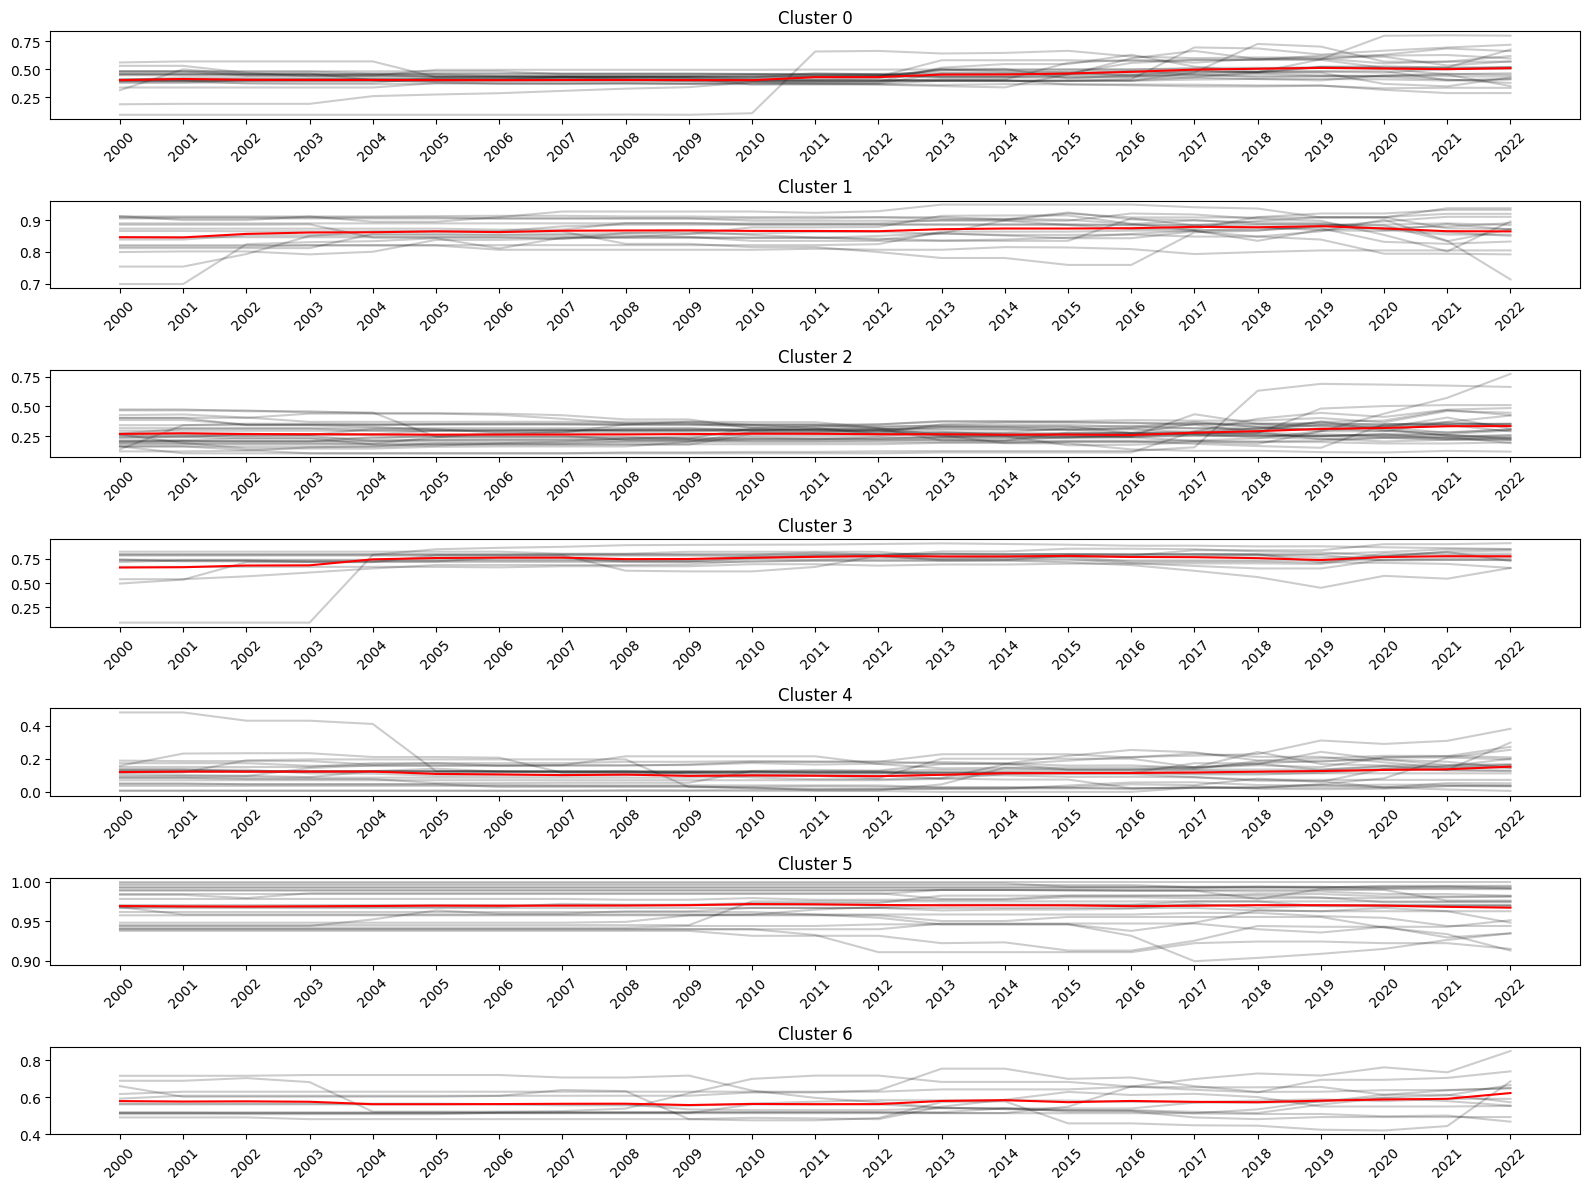

In [494]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_0[labels_0 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_0.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

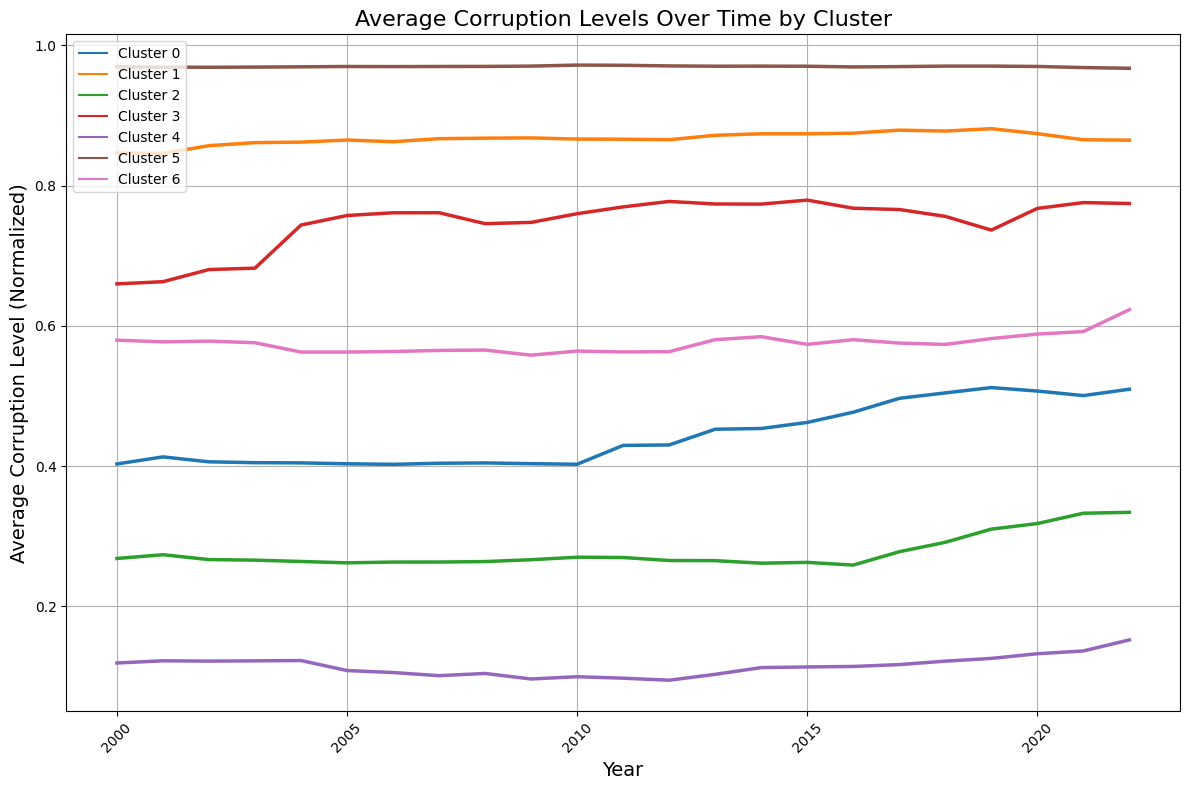

In [495]:
mean_corruption_by_cluster_0 = pivot_df_0.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_0.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_0.columns):
    sns.lineplot(data=mean_corruption_by_cluster_0[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels_0 = [f'Cluster {i}' for i in mean_corruption_by_cluster_0.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels_0[i]) for i in range(len(legend_labels_0))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [496]:
cluster_assignments_0 = pivot_df_0.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_0 = cluster_assignments_0.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_0.rename(columns={'countries': 'countries_list'}, inplace=True)

In [497]:
for index, row in clustered_countries_0.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Argentina, Benin, Brazil, China, Eswatini, Ethiopia, Guyana, India, Kuwait, Lesotho, Malaysia, Montenegro, Mozambique, Panama, Peru, Romania, Rwanda, Solomon Islands, Sri Lanka, The Gambia, Tunisia, Vietnam
Cluster 1: Austria, Barbados, Botswana, Costa Rica, Cyprus, Israel, Jamaica, Japan, Latvia, Lithuania, Poland, Portugal, Slovenia, South Korea, Trinidad and Tobago, United Arab Emirates
Cluster 2: Albania, Algeria, Angola, Armenia, Bolivia, Bosnia and Herzegovina, Dominican Republic, Ecuador, El Salvador, Ghana, Indonesia, Iran, Kenya, Laos, Malawi, Maldives, Mexico, Moldova, Mongolia, Morocco, North Macedonia, Philippines, Russia, Serbia, Thailand, Togo, Türkiye
Cluster 3: Cape Verde, Czechia, Georgia, Greece, Italy, Malta, Namibia, Oman, Seychelles, Slovakia, Suriname, Zambia
Cluster 4: Azerbaijan, Burundi, Cambodia, Cameroon, Chad, Equatorial Guinea, Gabon, Guatemala, Honduras, Kazakhstan, Kyrgyzstan, Madagascar, Nicaragua, Nigeria, Paraguay, Republic of the Congo, Taj

### K-means dtw

In [498]:
# Set a seed for reproducibility
seed = 92
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data= model_data[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_corr_2']]

# Step 1: Extract the time series data and normalize it
time_series = cluster_data.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df = cluster_data.pivot(index='country', columns='year', values='v2x_corr_2')


# Step 2:
time_series = pivot_df.values

# Step 3: Compute DTW and Cluster
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels = model.fit_predict(time_series)

# Assign clusters back to the original DataFrame
pivot_df['cluster'] = labels

# Display or save your clustered data
print(pivot_df['cluster'].reset_index())



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

0.148 --> 0.083 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.070 --> 0.067 --> 0.065 --> 0.065 --> 
        country  cluster
0       Albania        0
1       Algeria        4
2        Angola        0
3     Argentina        3
4       Armenia        2
..          ...      ...
128  Uzbekistan        0
129     Vanuatu        3
130     Vietnam        3
131      Zambia        5
132    Zimbabwe        0

[133 rows x 2 columns]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


In [499]:
# Count the number of countries in each cluster
countries_per_cluster = pivot_df['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster)

cluster
0    21
1    37
2     5
3    25
4    17
5    17
6    11
Name: count, dtype: int64


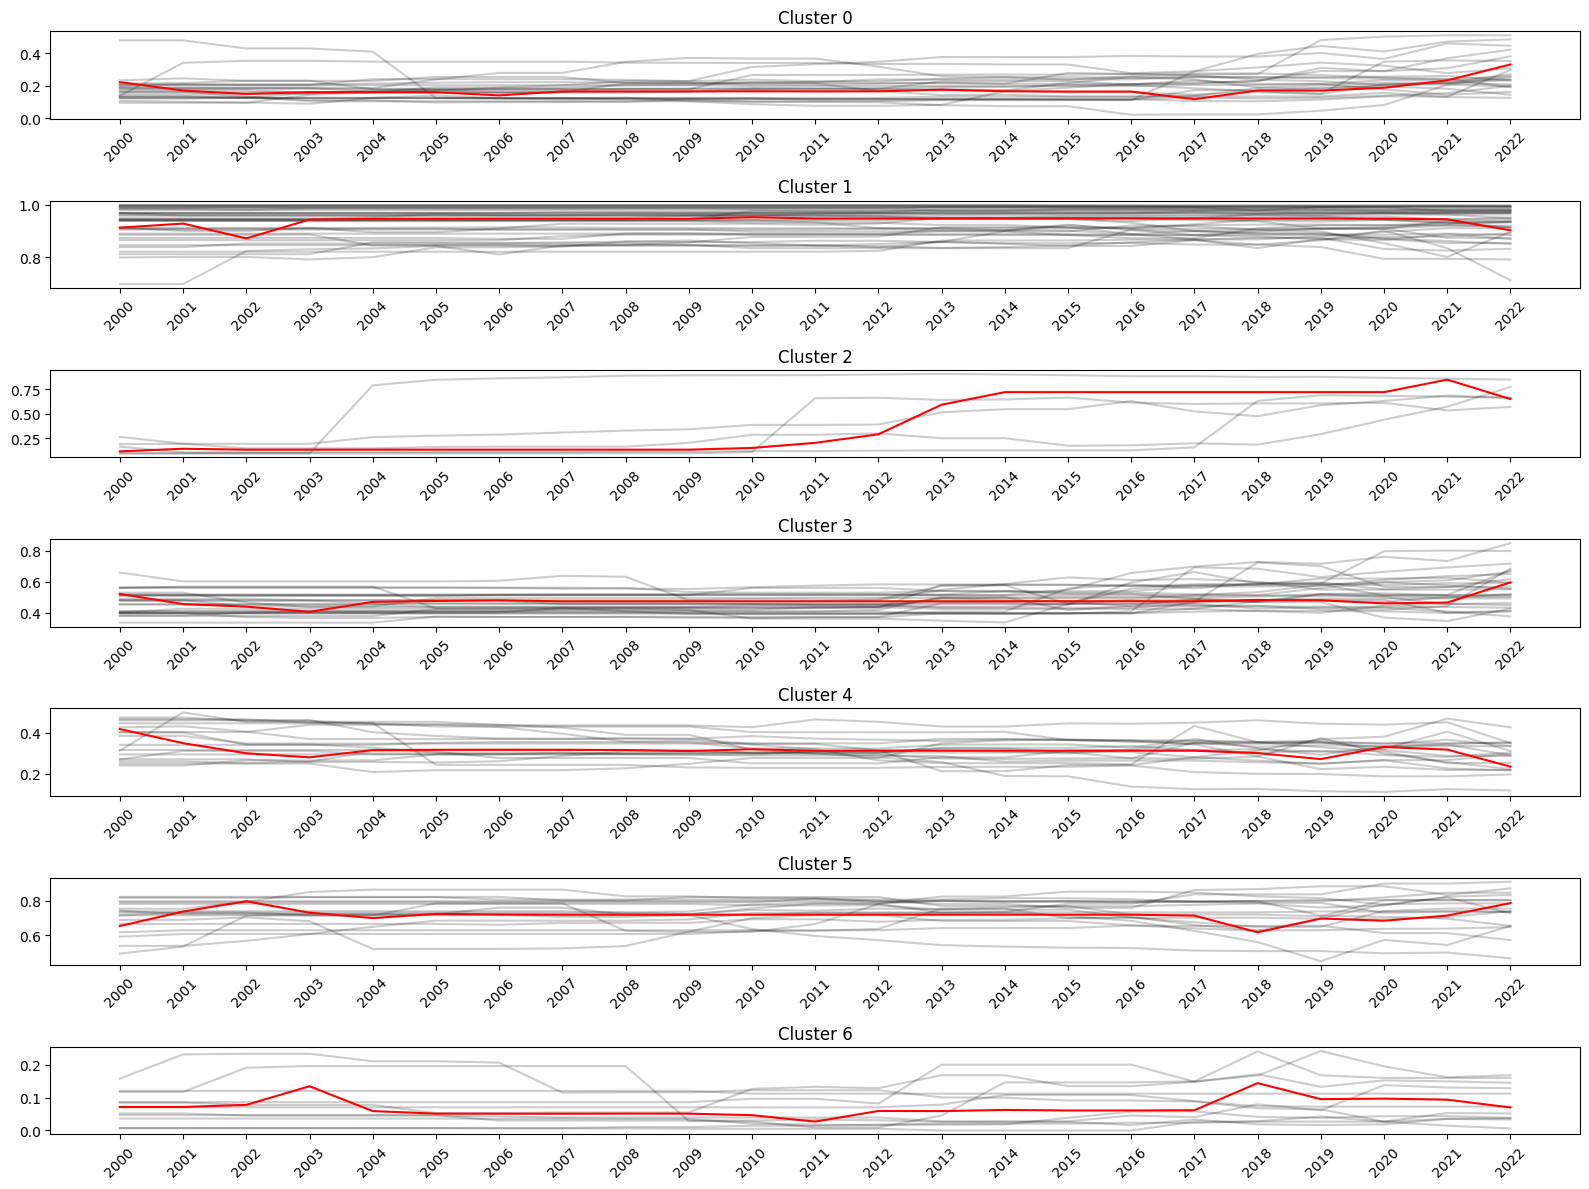

In [500]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series[labels == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45) 

plt.tight_layout()
plt.show()

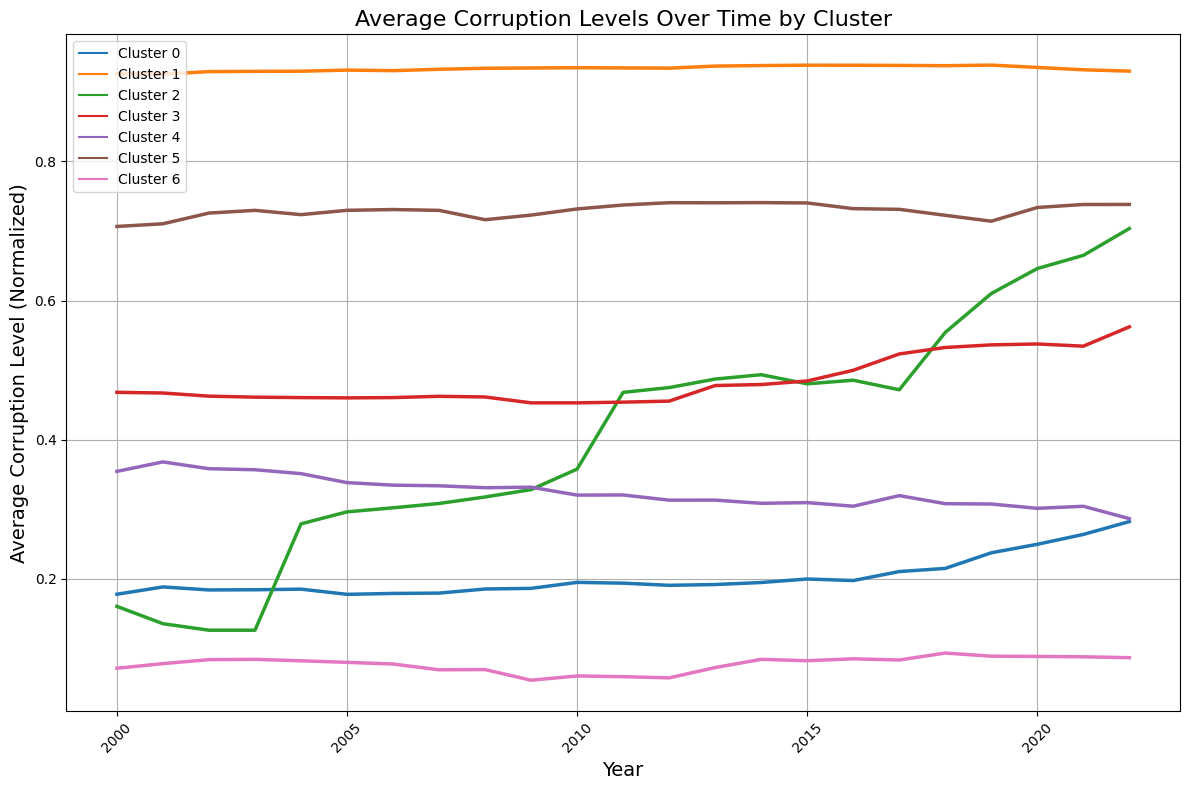

In [501]:
mean_corruption_by_cluster = pivot_df.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster.columns):
    sns.lineplot(data=mean_corruption_by_cluster[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [502]:
cluster_assignments = pivot_df.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries = cluster_assignments.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries.rename(columns={'countries': 'countries_list'}, inplace=True)

In [503]:
for index, row in clustered_countries.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Albania, Angola, Burundi, Dominican Republic, Guatemala, Honduras, Indonesia, Kazakhstan, Kenya, Laos, Maldives, Paraguay, Philippines, Republic of the Congo, Russia, Serbia, Togo, Uganda, Ukraine, Uzbekistan, Zimbabwe
Cluster 1: Australia, Austria, Barbados, Belgium, Botswana, Canada, Chile, Cyprus, Denmark, Estonia, Finland, France, Germany, Hong Kong, Iceland, Ireland, Israel, Jamaica, Japan, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, Slovenia, Spain, Sweden, Switzerland, Trinidad and Tobago, United Arab Emirates, United Kingdom, United States of America, Uruguay
Cluster 2: Armenia, Georgia, Moldova, Romania, Tunisia
Cluster 3: Argentina, Benin, Brazil, Bulgaria, Burkina Faso, China, Colombia, Eswatini, Ethiopia, Guyana, Kuwait, Lesotho, Malaysia, Mauritius, Montenegro, Mozambique, Panama, Rwanda, Saudi Arabia, South Africa, Sri Lanka, Tanzania, The Gambia, Vanuatu, Vietnam
Cluster 4: Algeria, Bolivia, Bosnia and Herzegov

### Kmeans softdtw

In [504]:
# Set a seed for reproducibility
seed = 92
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data= model_data[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_corr_2']]

# Step 1: Extract the time series data and normalize it
time_series_2 = cluster_data.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_2 = cluster_data.pivot(index='country', columns='year', values='v2x_corr_2')


# Step 2:
time_series_2 = pivot_df_2.values

# Step 3: Compute DTW and Cluster
model_2 = TimeSeriesKMeans(n_clusters=n_clusters, metric='softdtw', verbose=True)
labels_2= model_2.fit_predict(time_series_2)

# Assign clusters back to the original DataFrame
pivot_df_2['cluster'] = labels_2

# Display or save your clustered data
print(pivot_df_2['cluster'].reset_index())



1313.658 --> 1323.070 --> 1324.216 --> 1325.187 --> 1326.064 --> 1326.320 --> 1326.907 --> 1327.853 --> 1328.562 --> 1328.931 --> 1328.951 --> 1328.951 --> 
        country  cluster
0       Albania        0
1       Algeria        2
2        Angola        3
3     Argentina        4
4       Armenia        3
..          ...      ...
128  Uzbekistan        6
129     Vanuatu        4
130     Vietnam        4
131      Zambia        5
132    Zimbabwe        0

[133 rows x 2 columns]


In [505]:
# Count the number of countries in each cluster
countries_per_cluster_2 = pivot_df_2['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_2)

cluster
0    13
1    37
2    17
3     6
4    27
5    18
6    15
Name: count, dtype: int64


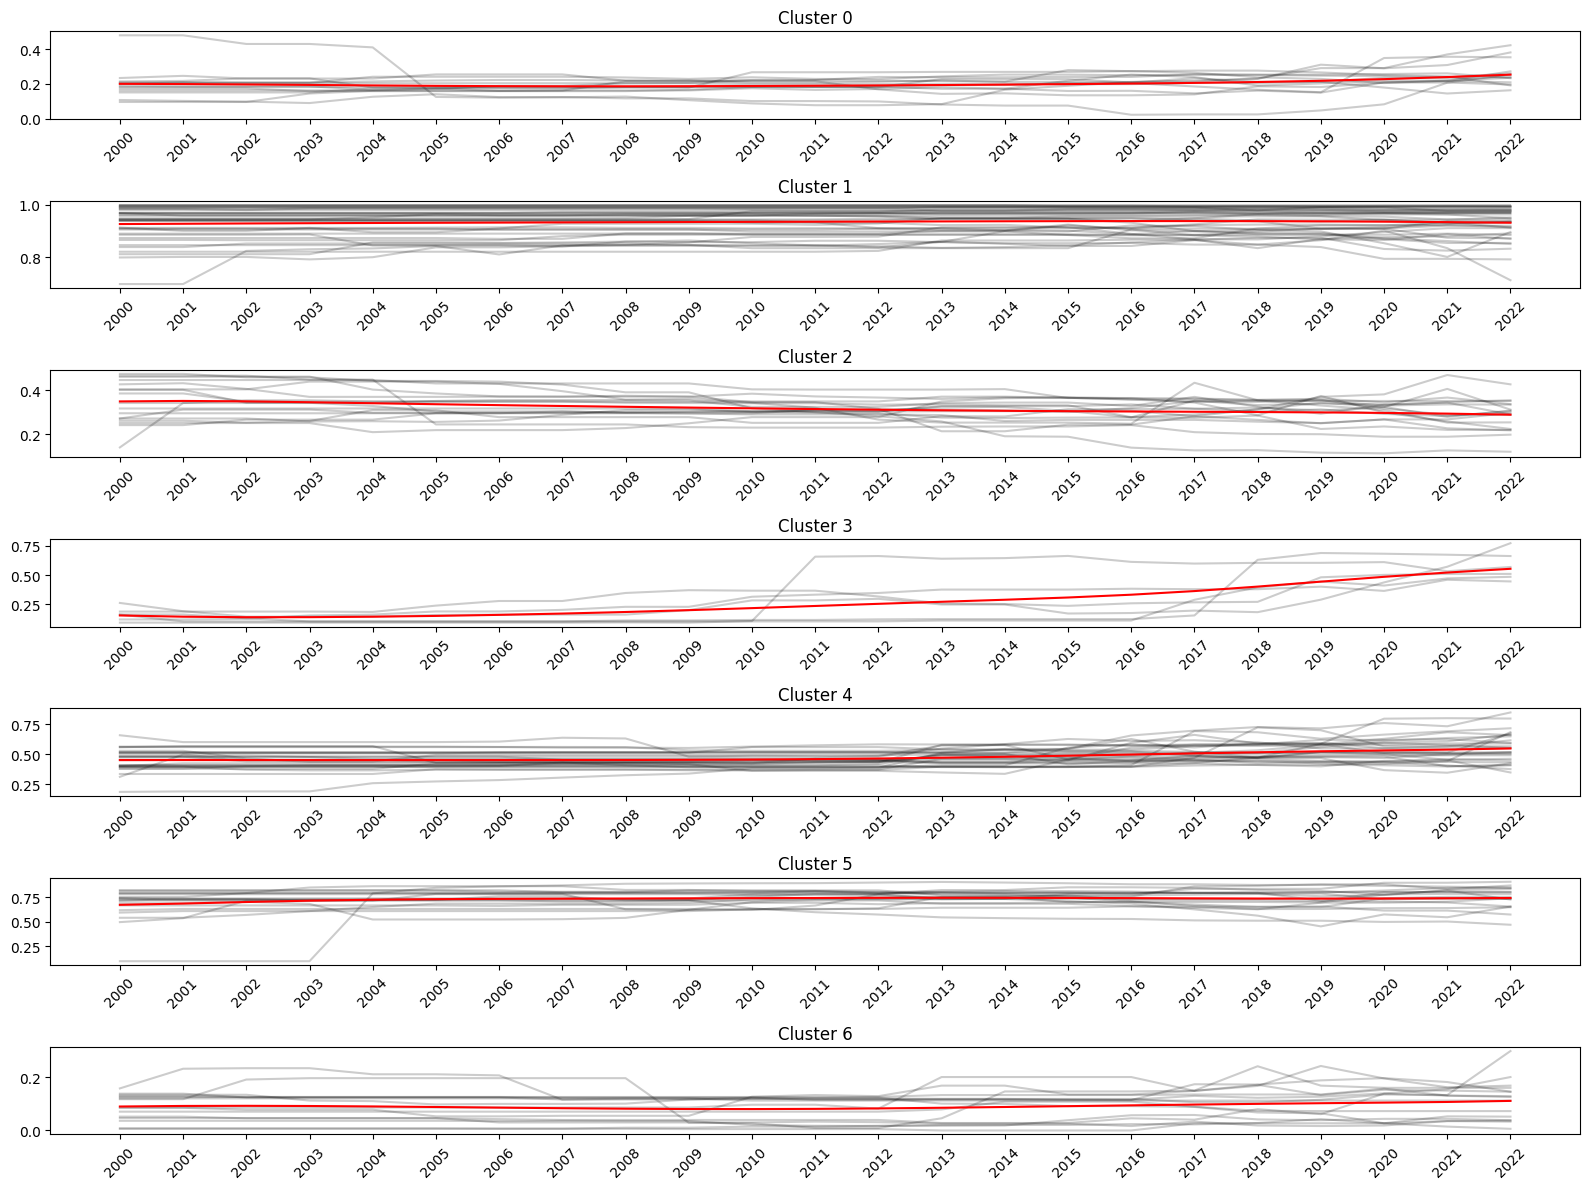

In [506]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_2[labels_2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_2.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  

plt.tight_layout()
plt.show()

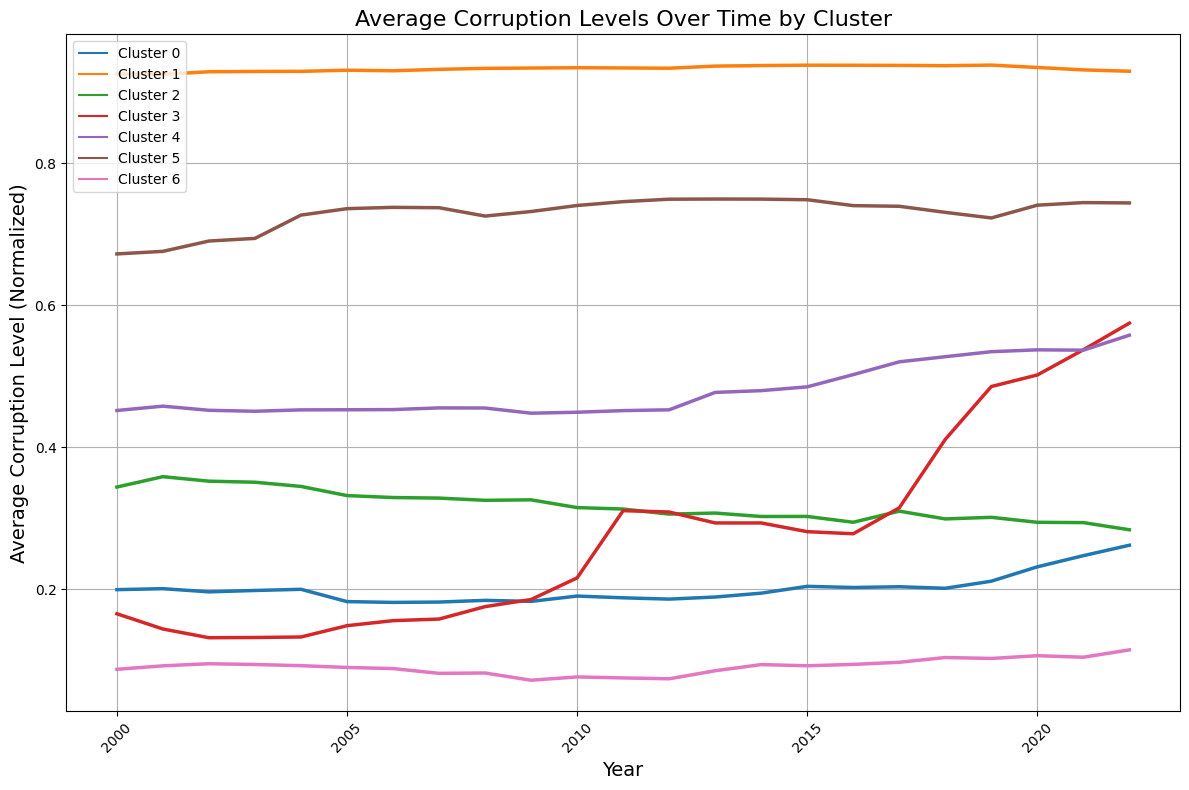

In [507]:
mean_corruption_by_cluster_2 = pivot_df_2.groupby('cluster').mean().T
cluster_colors_2 = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_2.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_2.columns):
    sns.lineplot(data=mean_corruption_by_cluster_2[col], color=cluster_colors_2[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_2.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors_2[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [508]:
cluster_assignments_2 = pivot_df_2.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_2 = cluster_assignments_2.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_2.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_2.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Albania, Burundi, Dominican Republic, Guatemala, Indonesia, Laos, Paraguay, Philippines, Russia, Togo, Uganda, Ukraine, Zimbabwe
Cluster 1: Australia, Austria, Barbados, Belgium, Botswana, Canada, Chile, Cyprus, Denmark, Estonia, Finland, France, Germany, Hong Kong, Iceland, Ireland, Israel, Jamaica, Japan, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, Slovenia, Spain, Sweden, Switzerland, Trinidad and Tobago, United Arab Emirates, United Kingdom, United States of America, Uruguay
Cluster 2: Algeria, Bolivia, Bosnia and Herzegovina, Ecuador, El Salvador, Ghana, India, Iran, Malawi, Mexico, Mongolia, Morocco, North Macedonia, Serbia, Solomon Islands, Thailand, Türkiye
Cluster 3: Angola, Armenia, Kenya, Maldives, Moldova, Tunisia
Cluster 4: Argentina, Benin, Brazil, Bulgaria, Burkina Faso, China, Colombia, Eswatini, Ethiopia, Guyana, Kuwait, Lesotho, Malaysia, Mauritius, Montenegro, Mozambique, Panama, Peru, Romania, Rwanda, Saud

### Kernel Kmeans 

In [509]:
# Set a seed for reproducibility
#82
#32
#77
#92
seed = 92
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data= model_data[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_corr_2','gdp_percapita']]

# Step 1: Extract the time series data and normalize it
time_series_3 = cluster_data.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_3 = cluster_data.pivot(index='country', columns='year', values='v2x_corr_2')


# Step 2:
time_series_3 = pivot_df_3.values

# Step 3: Compute DTW and Cluster
model_3 = KernelKMeans(n_clusters=n_clusters, kernel="gak") #max_iter=5, n_init=2)
labels_3 = model_3.fit_predict(time_series_3)

# Assign clusters back to the original DataFrame
pivot_df_3['cluster'] = labels_3

# Display or save your clustered data
print(pivot_df_3['cluster'].reset_index())



c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


        country  cluster
0       Albania        0
1       Algeria        0
2        Angola        1
3     Argentina        5
4       Armenia        1
..          ...      ...
128  Uzbekistan        1
129     Vanuatu        5
130     Vietnam        5
131      Zambia        4
132    Zimbabwe        1

[133 rows x 2 columns]


In [510]:
# Count the number of countries in each cluster
countries_per_cluster_3 = pivot_df_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_3)

cluster
0    24
1    26
2     1
3    20
4    10
5    24
6    28
Name: count, dtype: int64


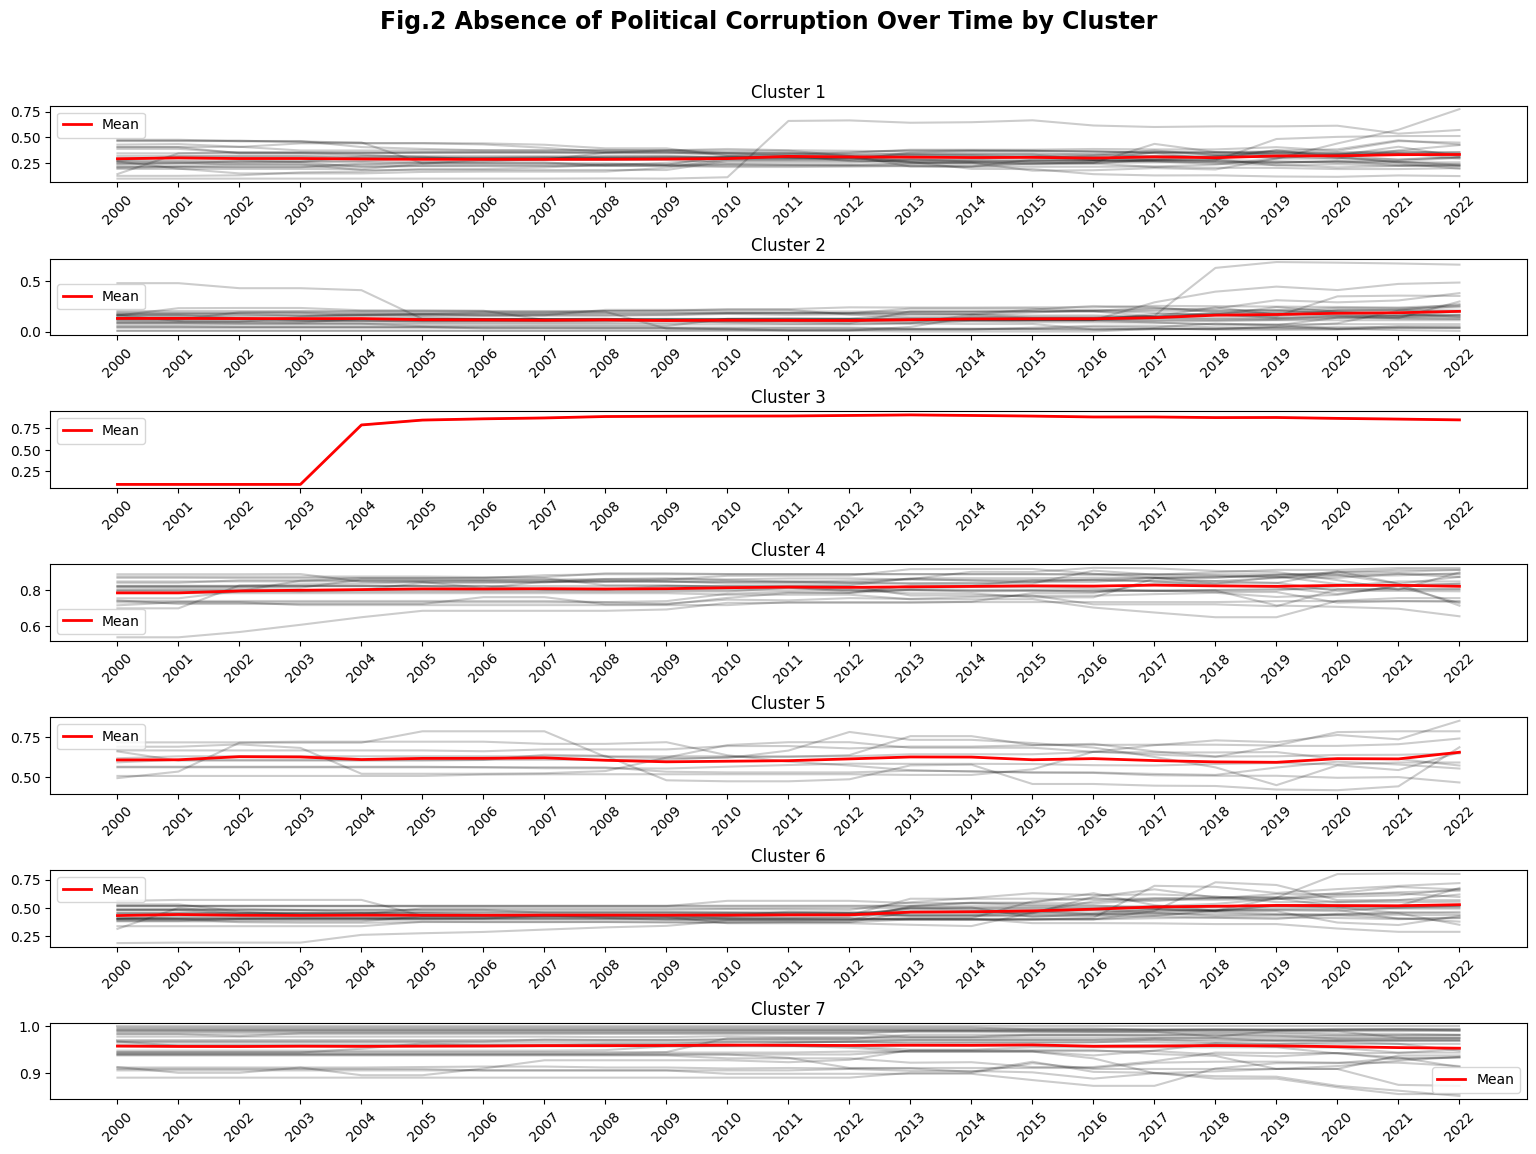

In [511]:

# Assuming years, time_series_3, and labels_3 are defined as in your initial example
years = [str(year) for year in range(2000, 2022 + 1)]
plt.figure(figsize=(16, 12))



for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    # Filter the time series for the current cluster
    cluster_time_series = time_series_3[labels_3 == yi]
    
    # Plot each time series in the cluster
    for xx in cluster_time_series:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    
    # Calculate and plot the mean of the cluster
    mean_time_series = np.mean(cluster_time_series, axis=0)
    plt.plot(mean_time_series, "r-", linewidth=2, label='Mean')
    
    # Set title and adjust x-ticks to show years, add legend
    plt.title(f"Cluster {yi + 1}")
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)
    plt.legend() 

# Adjust the layout to prevent the subplots from squeezing too tight
plt.tight_layout(pad=3.0, h_pad=1.0)  # Added padding between subplots

# Increase the space for the main title
plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Fig.2 Absence of Political Corruption Over Time by Cluster', fontsize=17, fontweight='bold')
plt.savefig("figures/clusters_1.png")
plt.show()


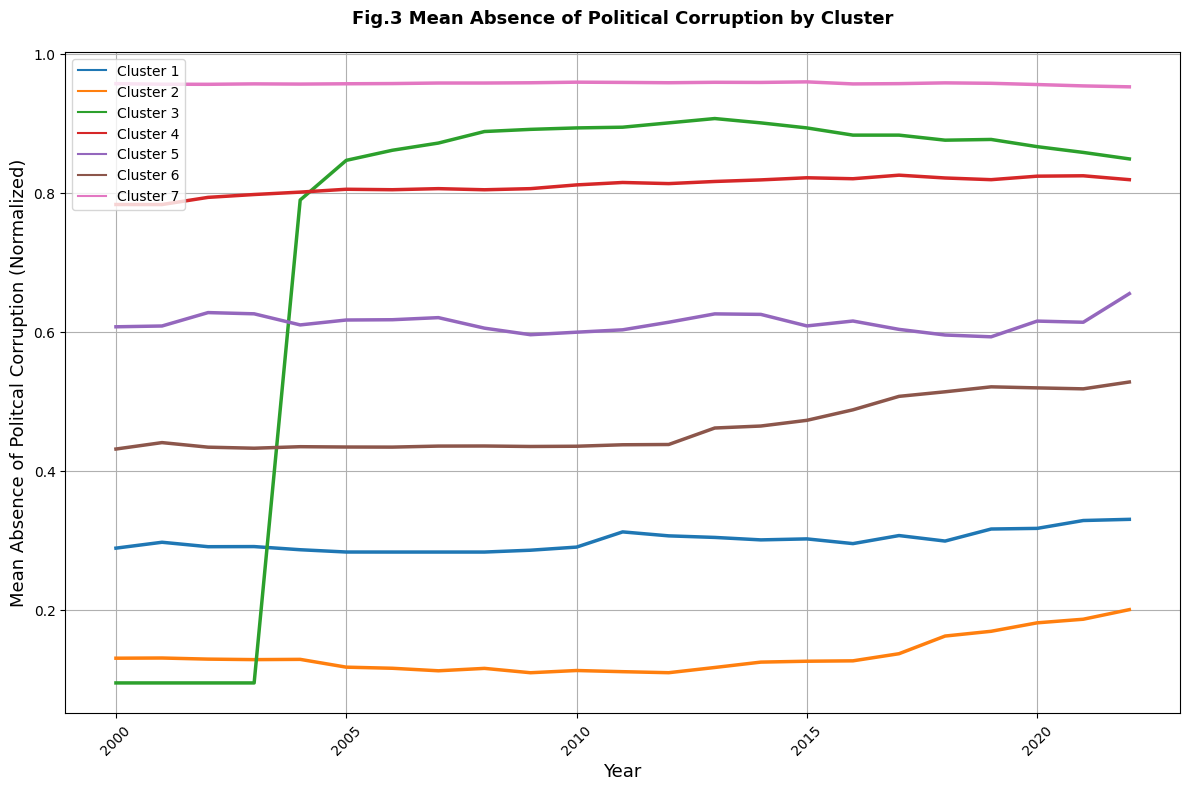

In [512]:
# Assuming pivot_df_3 already exists and contains the 'cluster' column
pivot_df_3['cluster'] += 1  # Increment cluster numbers by 1
mean_corruption_by_cluster_3 = pivot_df_3.groupby('cluster').mean().T
cluster_colors_3 = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_3.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_3.columns):
    sns.lineplot(data=mean_corruption_by_cluster_3[col], color=cluster_colors_3[i], linewidth=2.5)

plt.title('Fig.3 Mean Absence of Political Corruption by Cluster', fontsize=13, fontweight='bold', y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Absence of Politcal Corruption (Normalized)', fontsize=13)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_3.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors_3[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/clusters_average_1.png")
plt.show()

In [513]:
cluster_assignments_3 = pivot_df_3.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_3 = cluster_assignments_3.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_3.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_3.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 1: Albania, Algeria, Bolivia, Bosnia and Herzegovina, Ecuador, El Salvador, Ghana, Indonesia, Iran, Kenya, Malawi, Maldives, Mexico, Moldova, Mongolia, Morocco, North Macedonia, Philippines, Russia, Serbia, Solomon Islands, Thailand, Tunisia, Türkiye
Cluster 2: Angola, Armenia, Azerbaijan, Burundi, Cambodia, Cameroon, Chad, Dominican Republic, Equatorial Guinea, Gabon, Guatemala, Honduras, Kazakhstan, Kyrgyzstan, Laos, Madagascar, Nicaragua, Nigeria, Paraguay, Republic of the Congo, Tajikistan, Togo, Uganda, Ukraine, Uzbekistan, Zimbabwe
Cluster 3: Georgia
Cluster 4: Botswana, Cape Verde, Costa Rica, Cyprus, Czechia, Greece, Israel, Italy, Jamaica, Latvia, Lithuania, Malta, Namibia, Oman, Seychelles, Slovenia, South Korea, Suriname, Trinidad and Tobago, United Arab Emirates
Cluster 5: Belarus, Bulgaria, Colombia, Croatia, Hungary, Senegal, Slovakia, South Africa, Tanzania, Zambia
Cluster 6: Argentina, Benin, Brazil, Burkina Faso, China, Eswatini, Ethiopia, Guyana, India, Kuwait

### Evaluation metrics


In [517]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Set a seed for reproducibility
#82
#32
seed = 92
#np.random.seed(seed)

# Define the range of clusters
cluster_range = range(6, 10)

# Define clustering algorithms with a placeholder for n_clusters
def get_clustering_algorithms(n_clusters):
    return {
        "Kmeans euclidean": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=seed),
        "Kmeans dtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=seed),
        "Kmeans softdtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", random_state=seed),
        "KernalKmeans gak": KernelKMeans(n_clusters=n_clusters, kernel="gak", random_state=seed),
    }



# Prepare to collect results
results = []

# Evaluate each algorithm across the cluster range and metrics
for n_clusters in cluster_range:
    algorithms = get_clustering_algorithms(n_clusters)
    for algo_name, algorithm in algorithms.items():
        y_pred = algorithm.fit_predict(time_series_3)
        silhouette = silhouette_score(time_series_3, y_pred)
        davis = davies_bouldin_score(time_series_3, y_pred)
        
        results.append({
            "Algorithm": algo_name,
            "Clusters": n_clusters,
            "Silhouette": silhouette,
            "Davies-Bouldin": davis
        })

# Convert results to a DataFrame for better visualization

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


           Algorithm  Clusters  Silhouette  Davies-Bouldin
0   Kmeans euclidean         6    0.421657        0.835247
1         Kmeans dtw         6    0.448546        1.150915
2     Kmeans softdtw         6    0.456752        0.908295
3   KernalKmeans gak         6    0.441168        1.417215
4   Kmeans euclidean         7    0.388606        0.911948
5         Kmeans dtw         7    0.380090        1.156588
6     Kmeans softdtw         7    0.422469        0.929422
7   KernalKmeans gak         7    0.426434        0.746234
8   Kmeans euclidean         8    0.411168        0.806984
9         Kmeans dtw         8    0.356126        1.018355
10    Kmeans softdtw         8    0.382425        0.998569
11  KernalKmeans gak         8    0.397021        1.111056
12  Kmeans euclidean         9    0.417779        0.821493
13        Kmeans dtw         9    0.333538        1.060820
14    Kmeans softdtw         9    0.365303        1.081476
15  KernalKmeans gak         9    0.377144        1.4672

### Setting optimanl number of clusters

0.254 --> 0.081 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 
0.179 --> 0.048 --> 0.048 --> 0.047 --> 0.048 --> 0.049 --> 0.052 --> 0.055 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 0.056 --> 
0.099 --> 0.063 --> 0.055 --> 0.054 --> 0.053 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 0.054 --> 
0.076 --> 0.070 --> 0.069 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 0.070 --> 
0.062 --> 0.062 --> 0.063 --> 0.064 --> 0.064 --> 0.063 --> 0.063 --> 0.062 --> 0.062 --> 0.063 --> 0.064 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 --> 0.063 

c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data pas

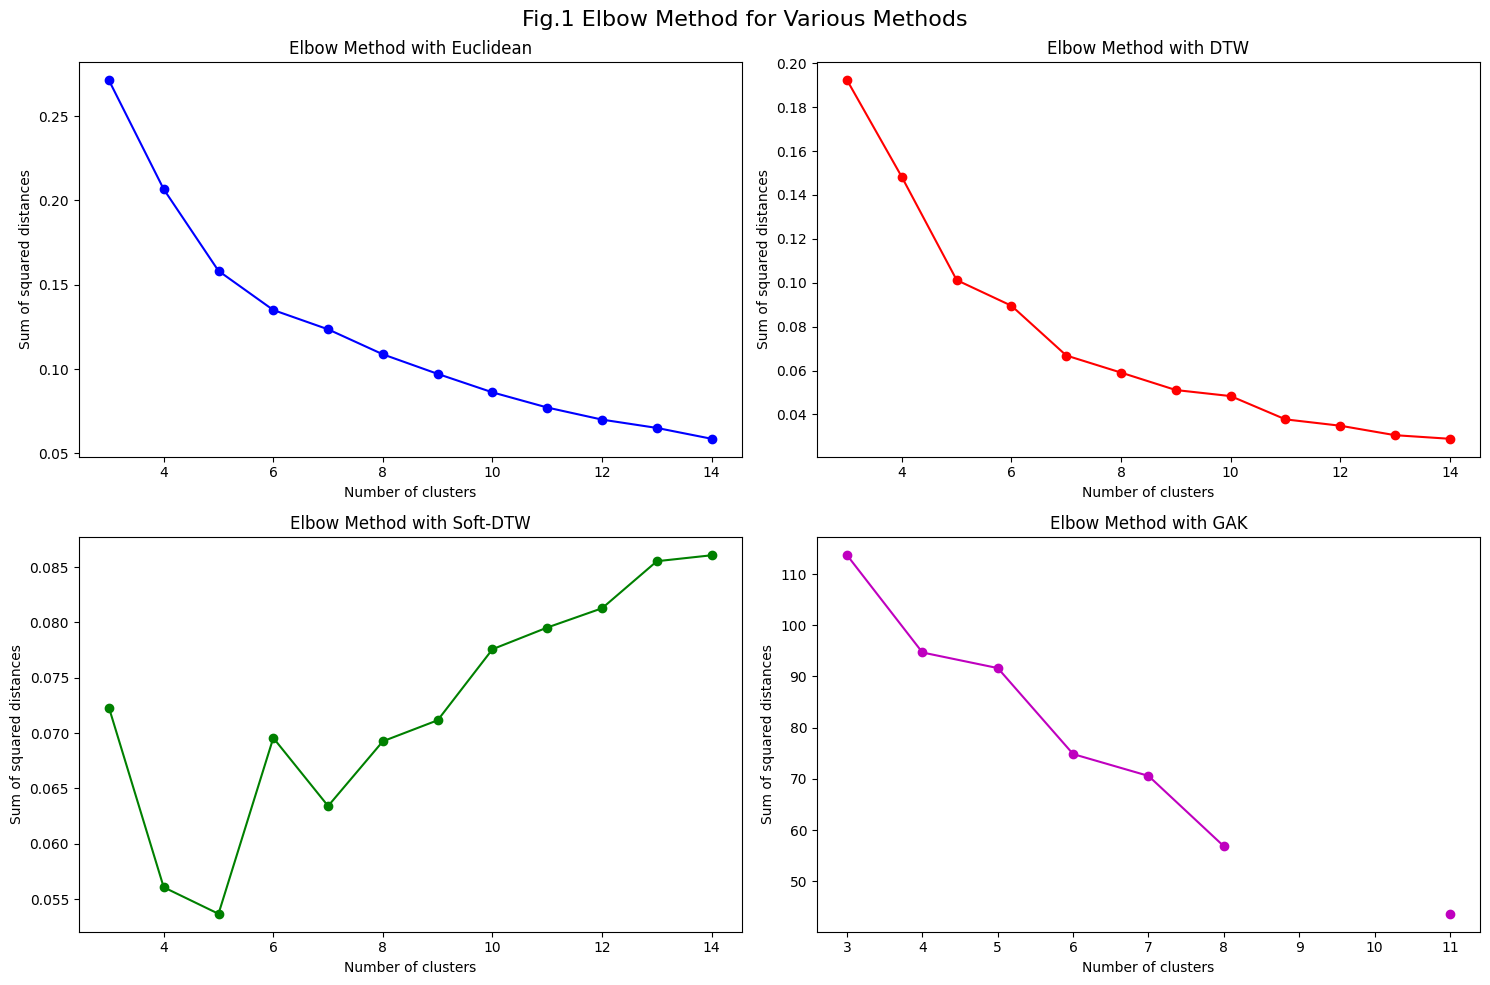

In [376]:

# Range of number of clusters
K = range(3, 15)
##77,82
#32
seeds = 77

# Prepare to collect the sum of squared distances for each model
ssd_euclidean = []
ssd_dtw = []
ssd_softdtw = []
ssd_gak = []

# Model and fitting for Euclidean
for k in K:
    km_euclidean = TimeSeriesKMeans(n_clusters=k, metric='euclidean', random_state=seeds)
    km_euclidean.fit(time_series_3)
    ssd_euclidean.append(km_euclidean.inertia_)

# Model and fitting for DTW
for k in K:
    km_dtw = TimeSeriesKMeans(n_clusters=k, metric='dtw', random_state=seeds)
    km_dtw.fit(time_series_3)
    ssd_dtw.append(km_dtw.inertia_)

# Model and fitting for Soft-DTW
for k in K:
    km_softdtw = TimeSeriesKMeans(n_clusters=k, metric='softdtw', metric_params={'gamma': .01},
 verbose=True, random_state=seeds)
    km_softdtw.fit(time_series_3)
    ssd_softdtw.append(km_softdtw.inertia_)

# Model and fitting for GAK
for k in K:
    km_gak = KernelKMeans(n_clusters=k, kernel='gak', random_state=seeds)
    km_gak.fit(time_series_3)
    ssd_gak.append(km_gak.inertia_)

# Plotting all four models in subplots
plt.figure(figsize=(15, 10))

plt.suptitle('Fig.1 Elbow Method for Various Methods', fontsize=16)

plt.subplot(2, 2, 1)
plt.plot(K, ssd_euclidean, 'bo-')
plt.title('Elbow Method with Euclidean')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

plt.subplot(2, 2, 2)
plt.plot(K, ssd_dtw, 'ro-')
plt.title('Elbow Method with DTW')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

plt.subplot(2, 2, 3)
plt.plot(K, ssd_softdtw, 'go-')
plt.title('Elbow Method with Soft-DTW')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')

plt.subplot(2, 2, 4)
plt.plot(K, ssd_gak, 'mo-')
plt.title('Elbow Method with GAK')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')


plt.tight_layout()
plt.savefig("figures/number_clusters.png")
plt.show()


## Sociopolitical and economic variables correlations with respect to Political Corruption

In [518]:
#prepare data
model_data_2 = model_data.set_index('country')
model_data_2['cluster'] = pivot_df_3['cluster']

# Reset index to make 'country' a column again 
model_data_2.reset_index(inplace=True)

In [519]:
model_data_2

country  ISO  year  v2x_freexp_altinf  v2cltrnslw  v2clacjust  \
0       Angola  AGO  2000           0.251806    0.242203    0.229872   
1       Angola  AGO  2001           0.254902    0.242203    0.229872   
2       Angola  AGO  2002           0.312693    0.242203    0.229872   
3       Angola  AGO  2003           0.406605    0.294434    0.000000   
4       Angola  AGO  2004           0.399381    0.294434    0.000000   
...        ...  ...   ...                ...         ...         ...   
3054  Zimbabwe  ZWE  2018           0.461300    0.243098    0.585792   
3055  Zimbabwe  ZWE  2019           0.431373    0.243098    0.569399   
3056  Zimbabwe  ZWE  2020           0.448916    0.259961    0.665027   
3057  Zimbabwe  ZWE  2021           0.461300    0.244441    0.606740   
3058  Zimbabwe  ZWE  2022           0.430341    0.244441    0.606740   

      v2clacjstm  v2clacjstw  v2cldiscm  v2cldiscw  ...  v2pehealth  \
0        0.31632    0.273060   0.254983   0.312174  ...    0.059355   
1        0.31632    0.273060   0.254983   0.356946  ...    0.059355   
2        0.50224    0.452764   0.246615   0.413370  ...    0.059355   
3        0.34912    0.404493   0.321010   0.434683  ...    0.176893   
4        0.34912    0.404493   0.321010   0.434683  ...    0.176893   
...          ...         ...        ...        ...  ...         ...   
3054     0.55504    0.558706   0.316750   0.335173  ...    0.208828   
3055     0.55504    0.558706   0.308687   0.329807  ...    0.208828   
3056     0.55328    0.556795   0.286475   0.317847  ...    0.241598   
3057     0.52640    0.536403   0.295755   0.329193  ...    0.226384   
3058     0.52640    0.536403   0.273543   0.305274  ...    0.197626   

      v2smgovfilcap  v2smregcap  v2csreprss  gdp_growth  v2x_corr_2  \
0          0.525290    0.339251    0.498998    0.373496    0.164071   
1          0.525290    0.339251    0.498998    0.385454    0.164071   
2          0.525290    0.339251    0.398150    0.483697    0.131880   
3          0.525290    0.339251    0.398150    0.372825    0.104881   
4          0.525290    0.339251    0.398150    0.455493    0.104881   
...             ...         ...         ...         ...         ...   
3054       0.584729    0.608296    0.387201    0.393802    0.211838   
3055       0.584729    0.608296    0.326754    0.276007    0.211838   
3056       0.584729    0.631536    0.326754    0.260590    0.178609   
3057       0.629671    0.617172    0.303315    0.429717    0.144341   
3058       0.578769    0.519529    0.303315    0.409510    0.163032   

      v2cacamps_2  v2caviol_2  gdp_percapita  cluster  
0        0.306202    0.132207    3285.953416        2  
1        0.306202    0.132207    3388.148688        2  
2        0.306202    0.334815    3782.892225        2  
3        0.539664    0.546465    3839.572827        2  
4        0.539664    0.546465    4223.637787        2  
...           ...         ...            ...      ...  
3054     0.164212    0.208092    2457.309859        2  
3055     0.119767    0.282792    2296.845429        2  
3056     0.119767    0.399585    2101.804597        2  
3057     0.173643    0.377501    2333.973632        2  
3058     0.248966    0.432044    2607.927678        2  

[3059 rows x 25 columns]

In [520]:
# Calculate the mean of socioeconomic variables by cluster
cluster_profiles = model_data_2.groupby('cluster')[['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']].mean()

print(cluster_profiles)


         v2x_freexp_altinf  v2cltrnslw  v2clacjstm  v2clacjstw  v2pehealth  \
cluster                                                                      
1                 0.686488    0.469764    0.491892    0.483329    0.434230   
2                 0.519118    0.347688    0.365497    0.379687    0.293729   
3                 0.790595    0.526210    0.483694    0.492218    0.639322   
4                 0.810988    0.661478    0.709371    0.693174    0.714414   
5                 0.769081    0.547852    0.583104    0.575742    0.511151   
6                 0.605996    0.489694    0.500147    0.493242    0.469048   
7                 0.934757    0.809809    0.819826    0.788432    0.800736   

         gdp_percapita  
cluster                 
1         10017.104589  
2          6648.862992  
3          9545.487980  
4         27128.403520  
5         13482.260472  
6         13044.982616  
7         42966.334446  


### Mean trajectories

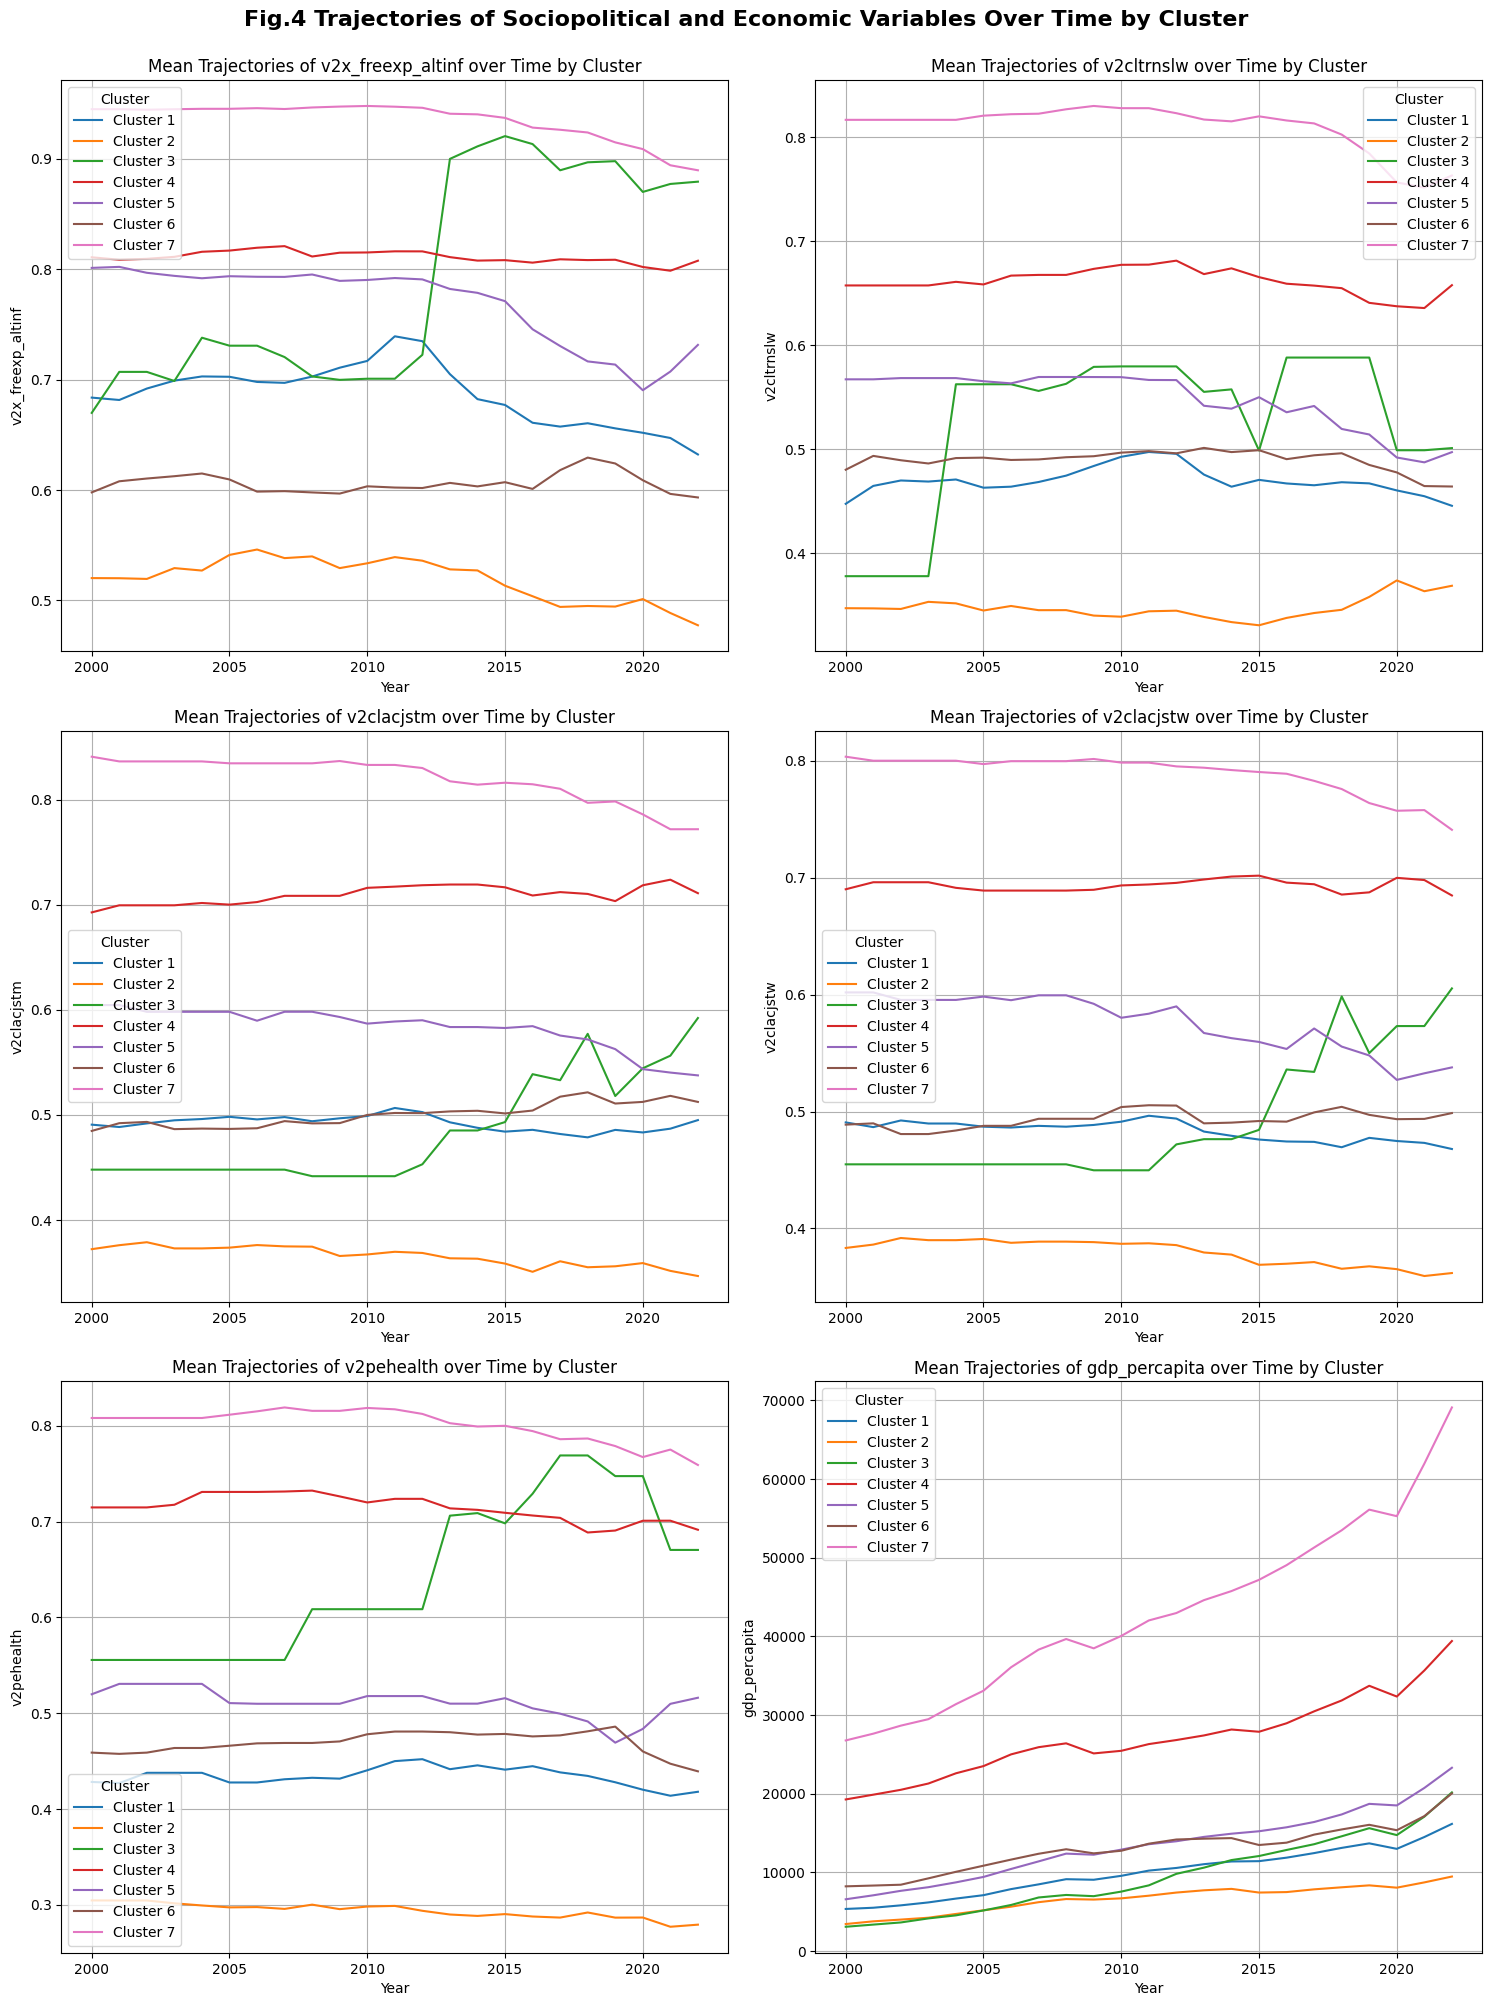

In [521]:
import matplotlib.pyplot as plt

# Merge the cluster labels back to the original data
#cluster_data = cluster_data.merge(pivot_df_3[['cluster']], left_on='country', right_index=True, how='left')

# List of socioeconomic variables you want to analyze
socioeconomic_vars = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for idx, var in enumerate(socioeconomic_vars):
    # Pivot the data for each variable to create a time series indexed by country and cluster
    pivot_df = model_data_2.pivot_table(index=['cluster', 'country'], columns='year', values=var)

    # Calculate the mean trajectory per cluster
    mean_trajectories = pivot_df.groupby(level=0).mean()

    # Plotting on the respective subplot
    ax = axes[idx]
    for cluster_id in mean_trajectories.index:
        ax.plot(mean_trajectories.columns, mean_trajectories.loc[cluster_id], label=f'Cluster {cluster_id}')
    
    ax.set_title(f'Mean Trajectories of {var} over Time by Cluster')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)
    ax.legend(title='Cluster')
    ax.grid(True)

# Adjust layout to prevent overlap

plt.suptitle('Fig.4 Trajectories of Sociopolitical and Economic Variables Over Time by Cluster', fontsize=16, y=1,fontweight='bold')
#plt.tight_layout()
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/socio_eco_1 .png")
plt.show()


### Correlation 

In [522]:
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']


# Initialize a dictionary to hold the correlation coefficients for each cluster
correlation_by_cluster = {}

# Get unique clusters
clusters = model_data_2['cluster'].unique()

# Calculate the correlation for each cluster
for cluster in clusters:
    cluster_data = model_data_2[model_data_2['cluster'] == cluster]
    correlation_by_cluster[cluster] = {}
    for var in variables:
        correlation_by_cluster[cluster][var] = cluster_data['v2x_corr_2'].corr(cluster_data[var])

correlation_by_cluster

{2: {'v2x_freexp_altinf': 0.20209478023112198,
  'v2cltrnslw': 0.38920428869106255,
  'v2clacjstm': 0.22353930674067105,
  'v2clacjstw': 0.2217627575257499,
  'v2pehealth': 0.15672650474411023,
  'gdp_percapita': 0.12743211026142043},
 1: {'v2x_freexp_altinf': 0.414177085072992,
  'v2cltrnslw': 0.3461702940700455,
  'v2clacjstm': 0.2727941776302641,
  'v2clacjstw': 0.22828743054960204,
  'v2pehealth': -0.026519639999009303,
  'gdp_percapita': -0.09065597301461265},
 4: {'v2x_freexp_altinf': 0.15603431593721848,
  'v2cltrnslw': 0.37549157764089386,
  'v2clacjstm': 0.1012414942911005,
  'v2clacjstw': 0.13997129230534897,
  'v2pehealth': 0.09423673968821733,
  'gdp_percapita': 0.22052817219966256},
 6: {'v2x_freexp_altinf': 0.06730951281165959,
  'v2cltrnslw': 0.13023877431396383,
  'v2clacjstm': 0.08029673032127545,
  'v2clacjstw': 0.07871990862247288,
  'v2pehealth': 0.1012811703111499,
  'gdp_percapita': 0.16873538628857432},
 7: {'v2x_freexp_altinf': 0.03170206016282286,
  'v2cltrnslw

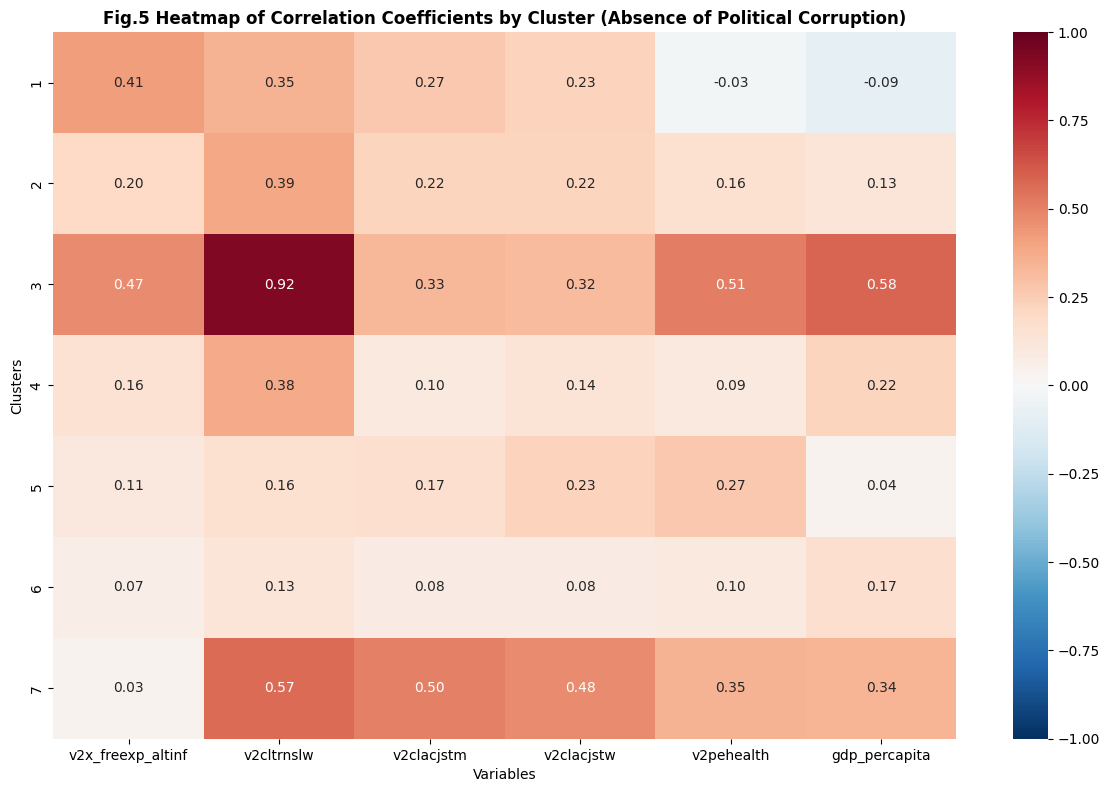

In [523]:

# Convert the dictionary to a DataFrame for easier plotting
cluster_labels = list(correlation_by_cluster.keys())
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']

# Create an empty DataFrame
correlation_matrix = pd.DataFrame(index=cluster_labels, columns=variables)

# Fill the DataFrame with correlation values
for cluster in correlation_by_cluster:
    for var in variables:
        correlation_matrix.loc[cluster, var] = correlation_by_cluster[cluster][var]

# Convert all entries to numeric type 
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Sort the index (clusters) numerically 
correlation_matrix.sort_index(inplace=True, key=lambda x: x.astype(int))

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Fig.5 Heatmap of Correlation Coefficients by Cluster (Absence of Political Corruption)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/coefficients_1.png")
plt.show()


# Executive vs Legistative vs Juditial 

## Executive

### Kmeans euclidean

In [524]:
# Set a seed for reproducibility
seed = 62
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ex= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2']]

# Step 1: Extract the time series data and normalize it
time_series_ex = cluster_data_ex.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ex = cluster_data_ex.pivot(index='country', columns='year', values='v2x_execorr_2')


# Step 2:
time_series_ex = pivot_df_ex.values

# Step 3: Compute DTW and Cluster
model_ex = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
labels_ex = model_ex.fit_predict(time_series_ex)

# Assign clusters back to the original DataFrame
pivot_df_ex['cluster'] = labels_ex

# Display or save your clustered data
print(pivot_df_ex['cluster'].reset_index())



0.244 --> 0.183 --> 0.179 --> 0.179 --> 
        country  cluster
0       Albania        4
1       Algeria        5
2        Angola        0
3     Argentina        5
4       Armenia        0
..          ...      ...
128  Uzbekistan        4
129     Vanuatu        2
130     Vietnam        3
131      Zambia        3
132    Zimbabwe        4

[133 rows x 2 columns]


In [525]:
# Count the number of countries in each cluster
countries_per_cluster_ex = pivot_df_ex['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ex)

cluster
0    11
1    27
2    14
3    15
4    20
5    29
6    17
Name: count, dtype: int64


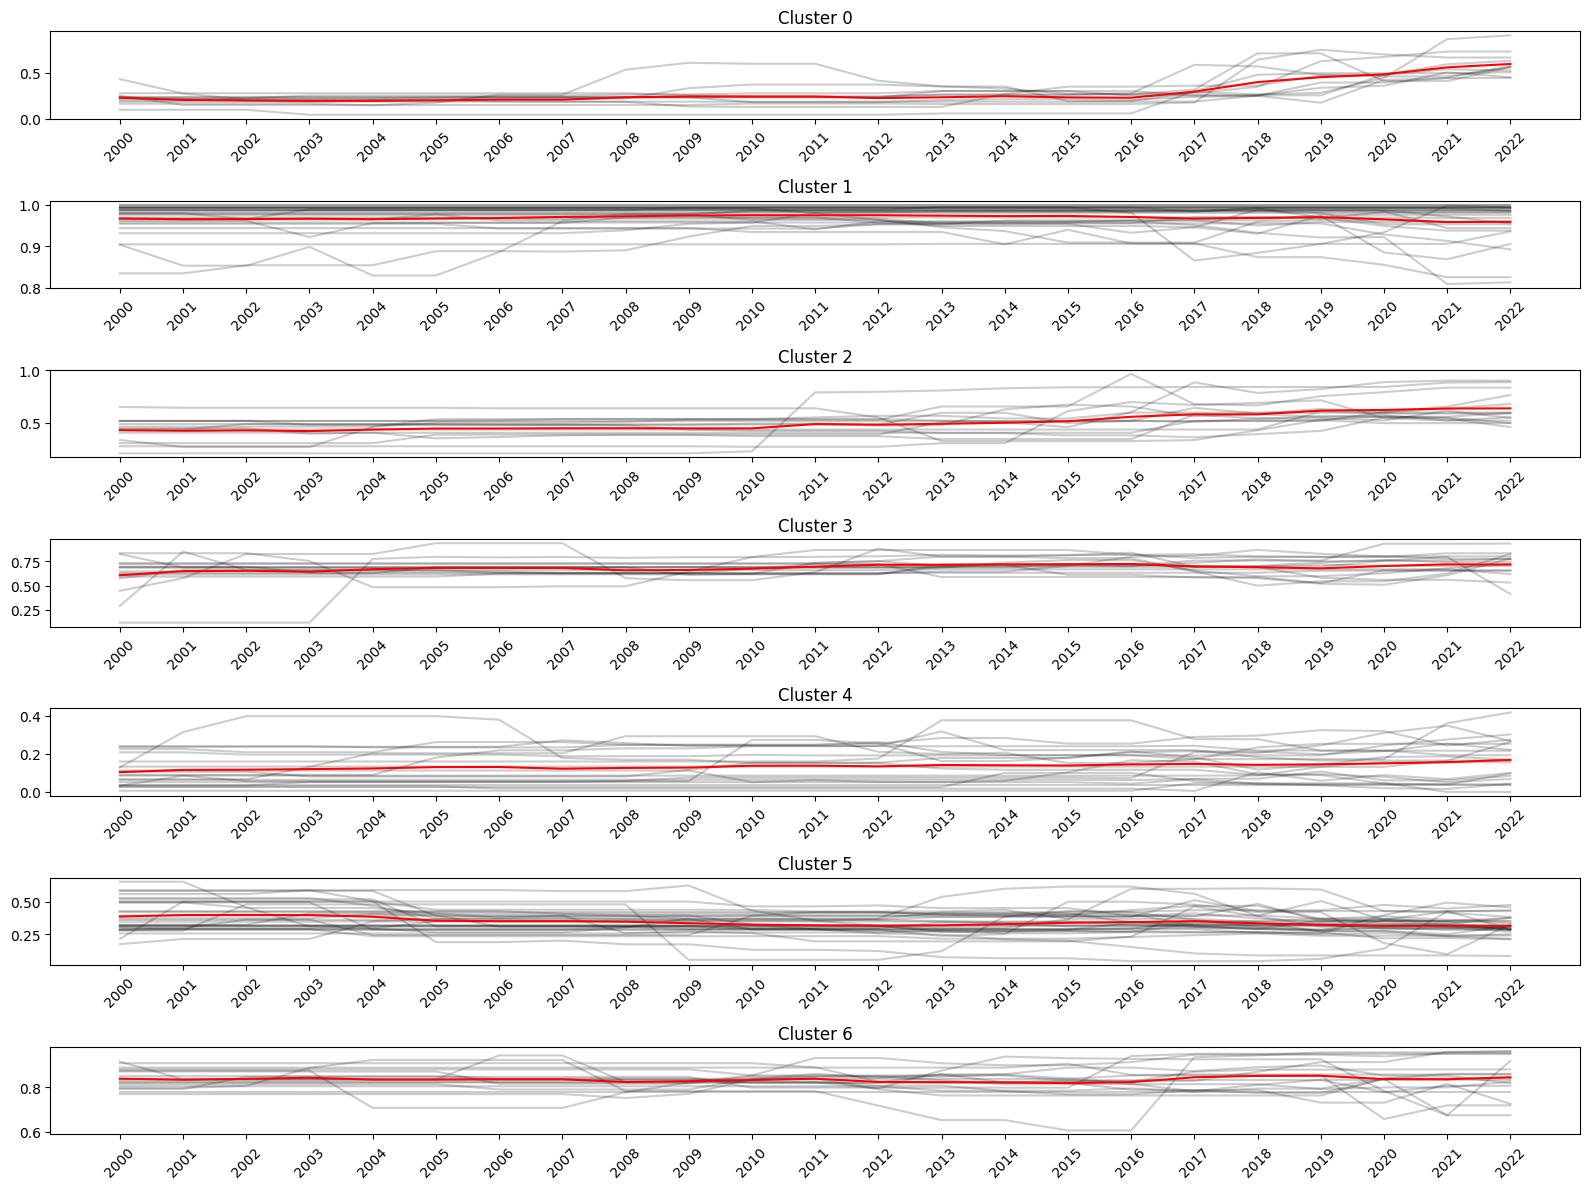

In [526]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ex[labels_ex == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ex.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  

plt.tight_layout()
plt.show()

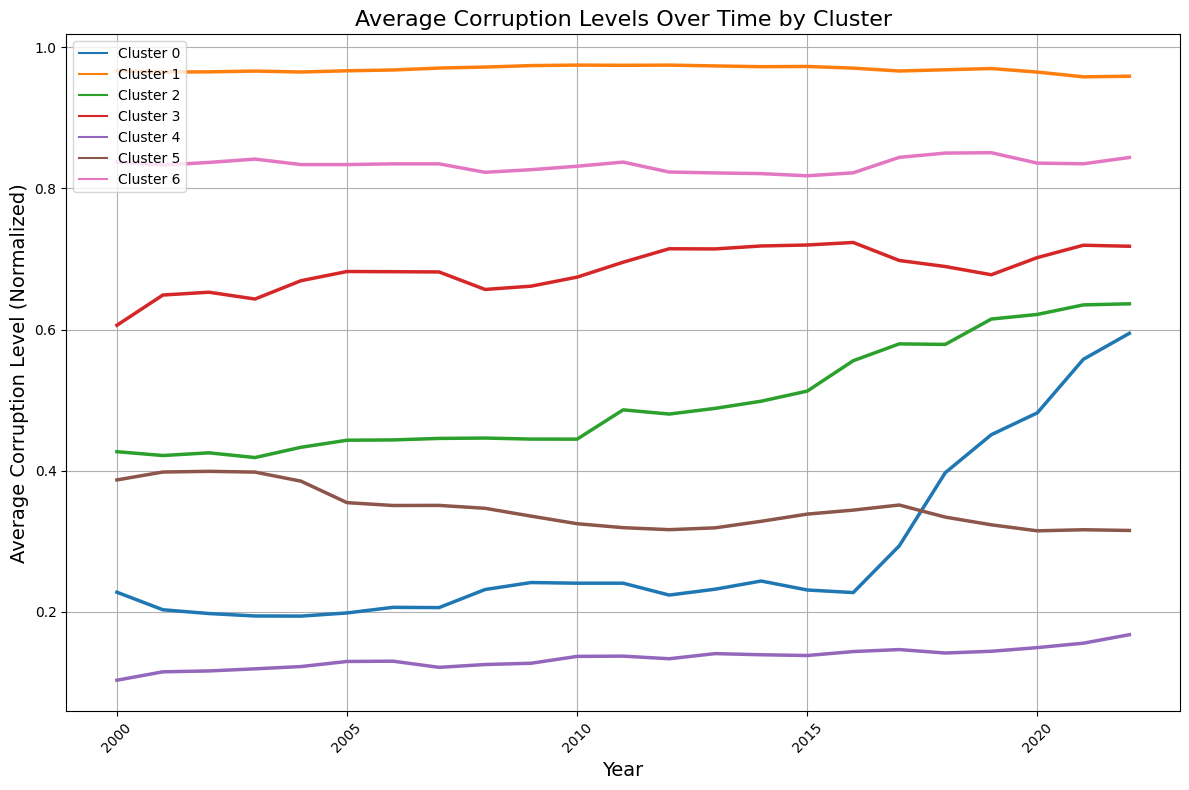

In [527]:
mean_corruption_by_cluster_ex = pivot_df_ex.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ex.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ex.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ex[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels_ex = [f'Cluster {i}' for i in mean_corruption_by_cluster_ex.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels_ex[i]) for i in range(len(legend_labels_ex))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [528]:
cluster_assignments_ex = pivot_df_ex.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ex = cluster_assignments_ex.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ex.rename(columns={'countries': 'countries_list'}, inplace=True)

In [529]:
for index, row in clustered_countries_ex.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Angola, Armenia, Dominican Republic, Kenya, Malawi, Malaysia, Maldives, Moldova, Saudi Arabia, The Gambia, Ukraine
Cluster 1: Australia, Austria, Belgium, Canada, Chile, Denmark, Estonia, Finland, France, Germany, Iceland, Ireland, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, Spain, Sweden, Switzerland, United Kingdom, United States of America, Uruguay
Cluster 2: Benin, Burkina Faso, Ecuador, Ethiopia, Guyana, Kuwait, Lesotho, Mexico, Morocco, Panama, Romania, South Africa, Tunisia, Vanuatu
Cluster 3: Bulgaria, Colombia, Croatia, Czechia, Georgia, Malta, Namibia, Oman, Peru, Rwanda, Senegal, Seychelles, Tanzania, Vietnam, Zambia
Cluster 4: Albania, Azerbaijan, Cambodia, Cameroon, Chad, Equatorial Guinea, Gabon, Guatemala, Honduras, Kazakhstan, Kyrgyzstan, Nicaragua, Nigeria, Paraguay, Republic of the Congo, Tajikistan, Thailand, Togo, Uzbekistan, Zimbabwe
Cluster 5: Algeria, Argentina, Belarus, Bolivia, Bosnia and Herzegovina,

### K-means dtw

In [534]:
# Set a seed for reproducibility
seed = 62
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ex_2= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2']]

# Step 1: Extract the time series data and normalize it
time_series_ex_2 = cluster_data_ex_2.drop(['country', 'ISO'], axis=1).values  # Assuming 'country' and 'ISO' columns are present

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ex_2 = cluster_data_ex_2.pivot(index='country', columns='year', values='v2x_execorr_2')


# Step 2:
time_series_ex_2 = pivot_df_ex_2.values

# Step 3: Compute DTW and Cluster
model_ex_2 = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels_ex_2 = model_ex_2.fit_predict(time_series_ex_2)

# Assign clusters back to the original DataFrame
pivot_df_ex_2['cluster'] = labels_ex_2

# Display or save your clustered data
print(pivot_df_ex_2['cluster'].reset_index())



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

0.207 --> 0.105 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s


0.100 --> 0.099 --> 0.099 --> 0.099 --> 
        country  cluster
0       Albania        3
1       Algeria        3
2        Angola        3
3     Argentina        4
4       Armenia        3
..          ...      ...
128  Uzbekistan        5
129     Vanuatu        2
130     Vietnam        2
131      Zambia        2
132    Zimbabwe        5

[133 rows x 2 columns]


[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


In [535]:
# Count the number of countries in each cluster
countries_per_cluster_ex_2 = pivot_df_ex_2['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ex_2)

cluster
0    10
1    19
2    20
3    29
4    15
5    14
6    26
Name: count, dtype: int64


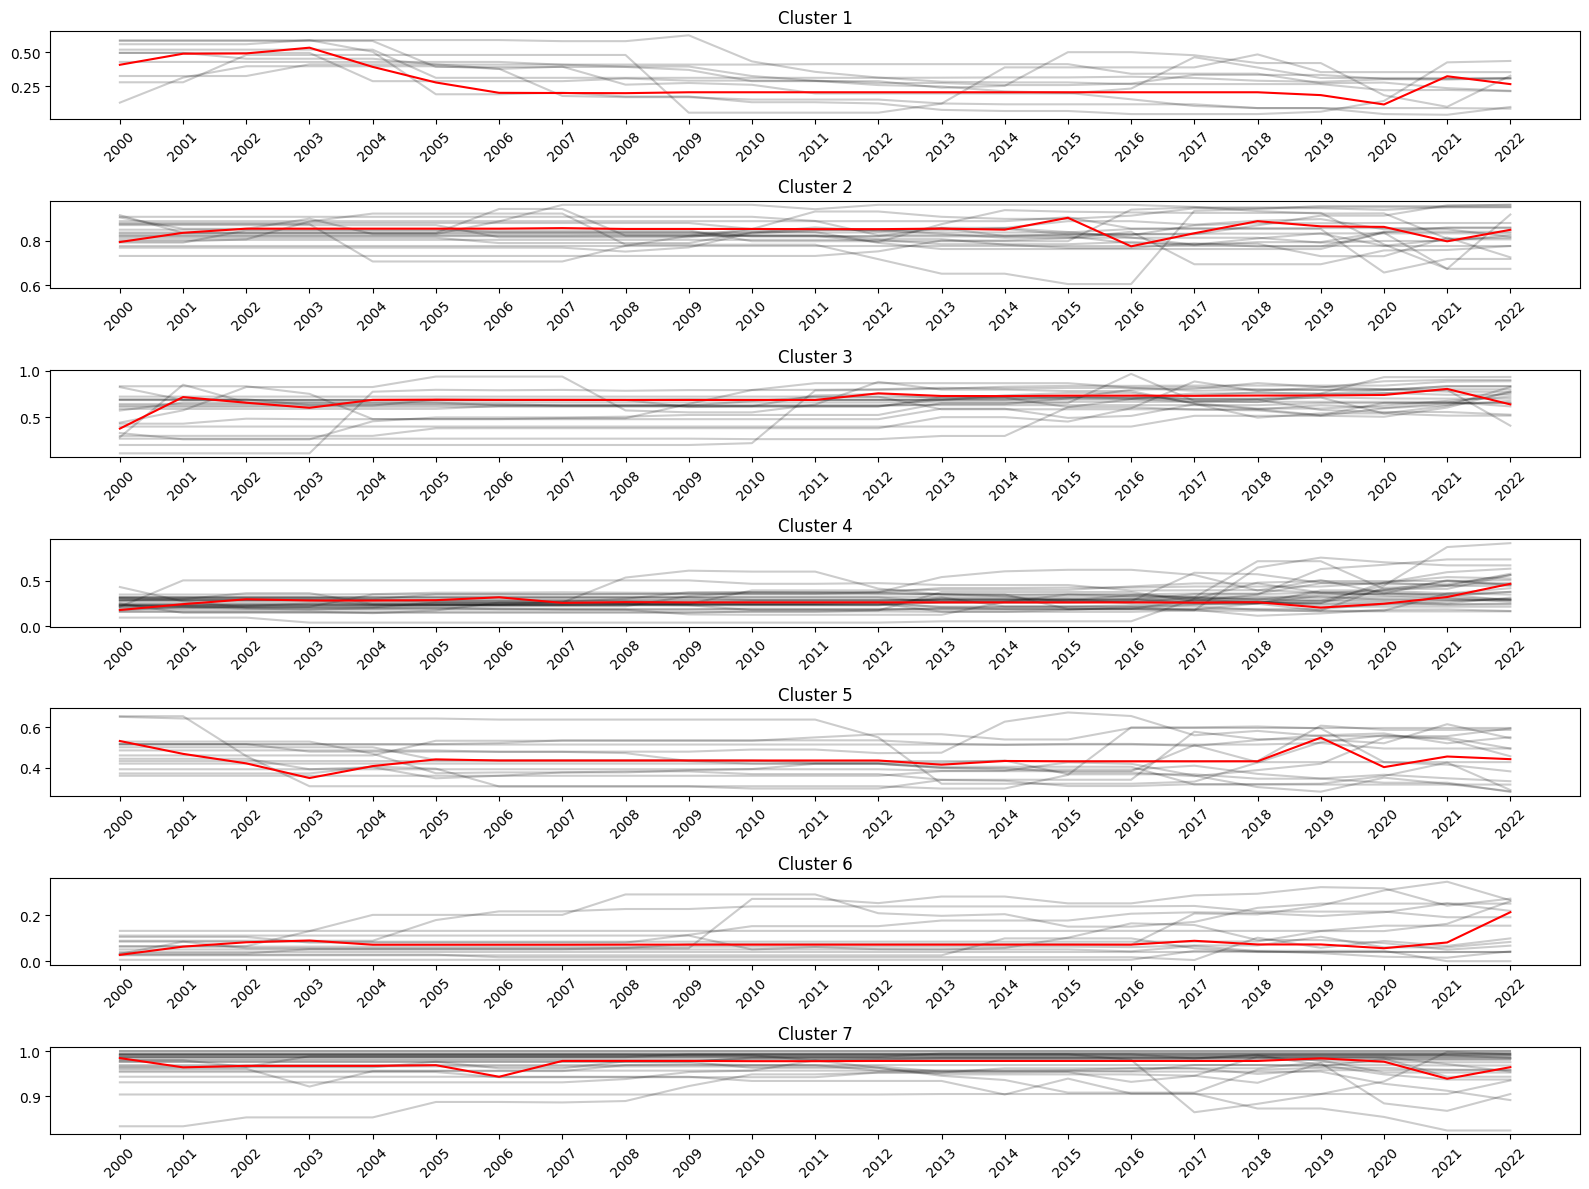

In [536]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ex_2[labels_ex_2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ex_2.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

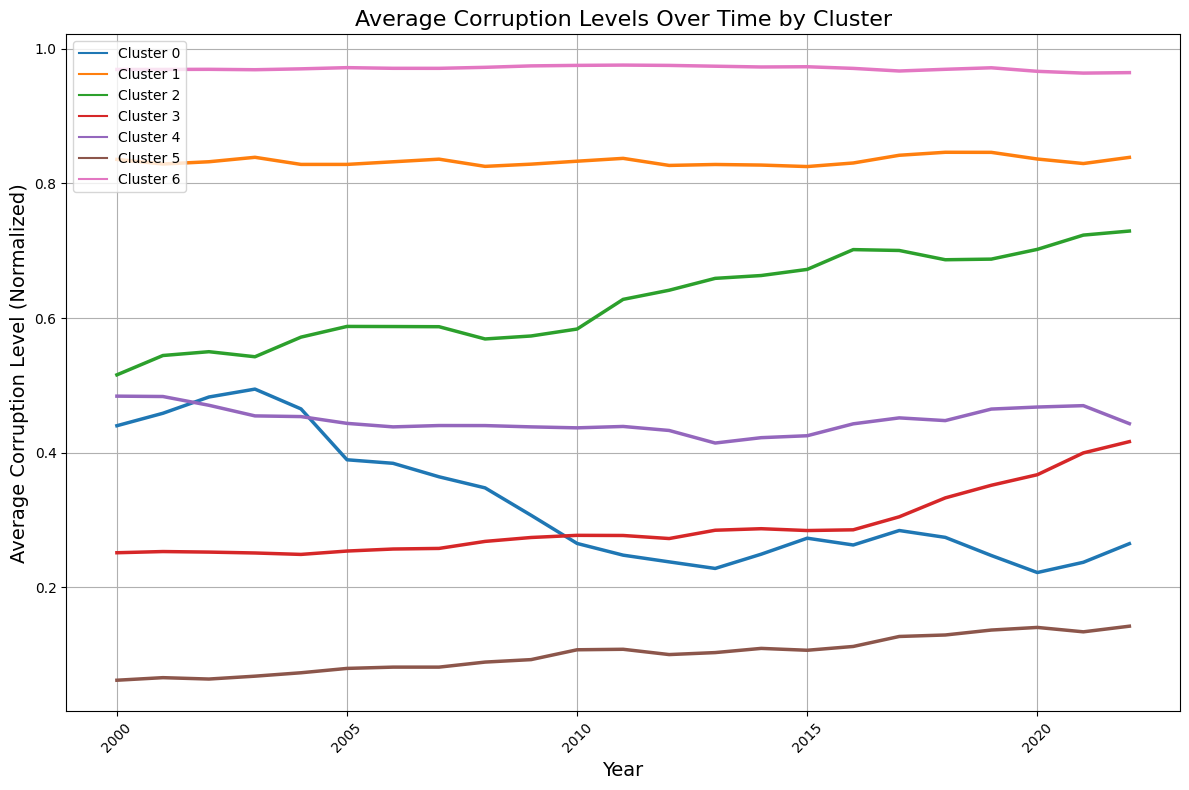

In [537]:
mean_corruption_by_cluster_ex_2 = pivot_df_ex_2.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ex_2.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ex_2.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ex_2[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ex_2.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [538]:
cluster_assignments_ex_2 = pivot_df_ex_2.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ex_2 = cluster_assignments_ex_2.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ex_2.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ex_2.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Brazil, Burundi, Hungary, Iran, Madagascar, Nicaragua, North Macedonia, Solomon Islands, Sri Lanka, Türkiye
Cluster 1: Austria, Barbados, Botswana, Cape Verde, Costa Rica, Cyprus, Greece, Hong Kong, Israel, Italy, Jamaica, Japan, Senegal, Slovakia, Slovenia, South Korea, Suriname, Trinidad and Tobago, United Arab Emirates
Cluster 2: Benin, Bulgaria, Colombia, Croatia, Czechia, Georgia, Guyana, Lesotho, Malta, Namibia, Oman, Peru, Romania, Rwanda, Seychelles, Tanzania, Tunisia, Vanuatu, Vietnam, Zambia
Cluster 3: Albania, Algeria, Angola, Armenia, Belarus, Bosnia and Herzegovina, China, Dominican Republic, El Salvador, Gabon, Ghana, Guatemala, Honduras, Indonesia, Kenya, Laos, Malawi, Malaysia, Maldives, Moldova, Montenegro, Philippines, Russia, Saudi Arabia, Serbia, Thailand, The Gambia, Uganda, Ukraine
Cluster 4: Argentina, Bolivia, Burkina Faso, Ecuador, Eswatini, Ethiopia, India, Kuwait, Mauritius, Mexico, Mongolia, Morocco, Mozambique, Panama, South Africa
Cluster 5: Aze

### K-means softdw

In [539]:
# Set a seed for reproducibility
seed = 0
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ex_3= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2']]

# Step 1: Extract the time series data and normalize it
time_series_ex_3= cluster_data_ex_3.drop(['country', 'ISO'], axis=1).values  # Assuming 'country' and 'ISO' columns are present

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ex_3 = cluster_data_ex_3.pivot(index='country', columns='year', values='v2x_execorr_2')


# Step 2:
time_series_ex_3 = pivot_df_ex_3.values

# Step 3: Compute DTW and Cluster
model_ex_3 = TimeSeriesKMeans(n_clusters=n_clusters, metric='softdtw', verbose=True)
labels_ex_3= model_ex_3.fit_predict(time_series_ex_3)

# Assign clusters back to the original DataFrame
pivot_df_ex_3['cluster'] = labels_ex_3

# Display or save your clustered data
print(pivot_df_ex_3['cluster'].reset_index())



1301.910 --> 1316.386 --> 1319.304 --> 1320.851 --> 1321.599 --> 1322.224 --> 1322.377 --> 1322.413 --> 1322.443 --> 1322.460 --> 1322.460 --> 
        country  cluster
0       Albania        3
1       Algeria        3
2        Angola        5
3     Argentina        6
4       Armenia        3
..          ...      ...
128  Uzbekistan        5
129     Vanuatu        6
130     Vietnam        4
131      Zambia        4
132    Zimbabwe        5

[133 rows x 2 columns]


In [540]:
# Count the number of countries in each cluster
countries_per_cluster_ex_3 = pivot_df_ex_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ex_3)

cluster
0     4
1    27
2    17
3    32
4    15
5    16
6    22
Name: count, dtype: int64


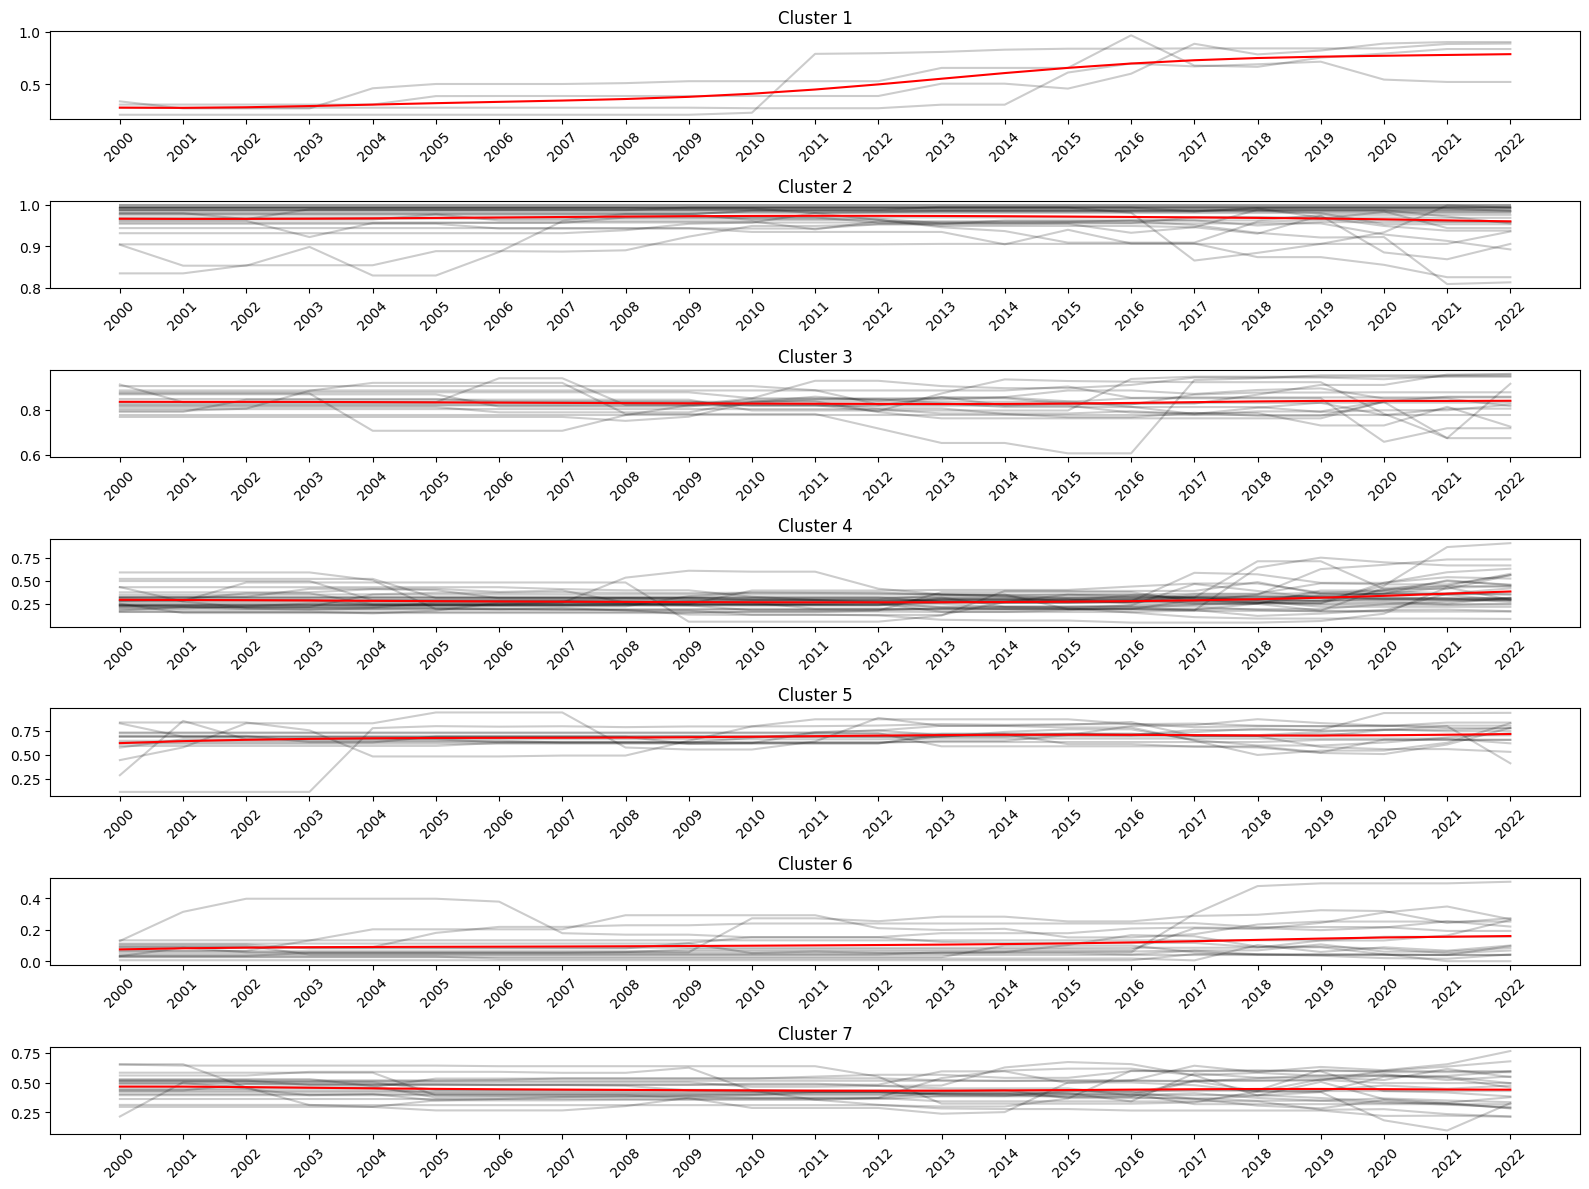

In [541]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ex_3[labels_ex_3 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ex_3.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

In [542]:
# Count the number of countries in each cluster
countries_per_cluster_ex_3 = pivot_df_ex_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ex_3)

cluster
0     4
1    27
2    17
3    32
4    15
5    16
6    22
Name: count, dtype: int64


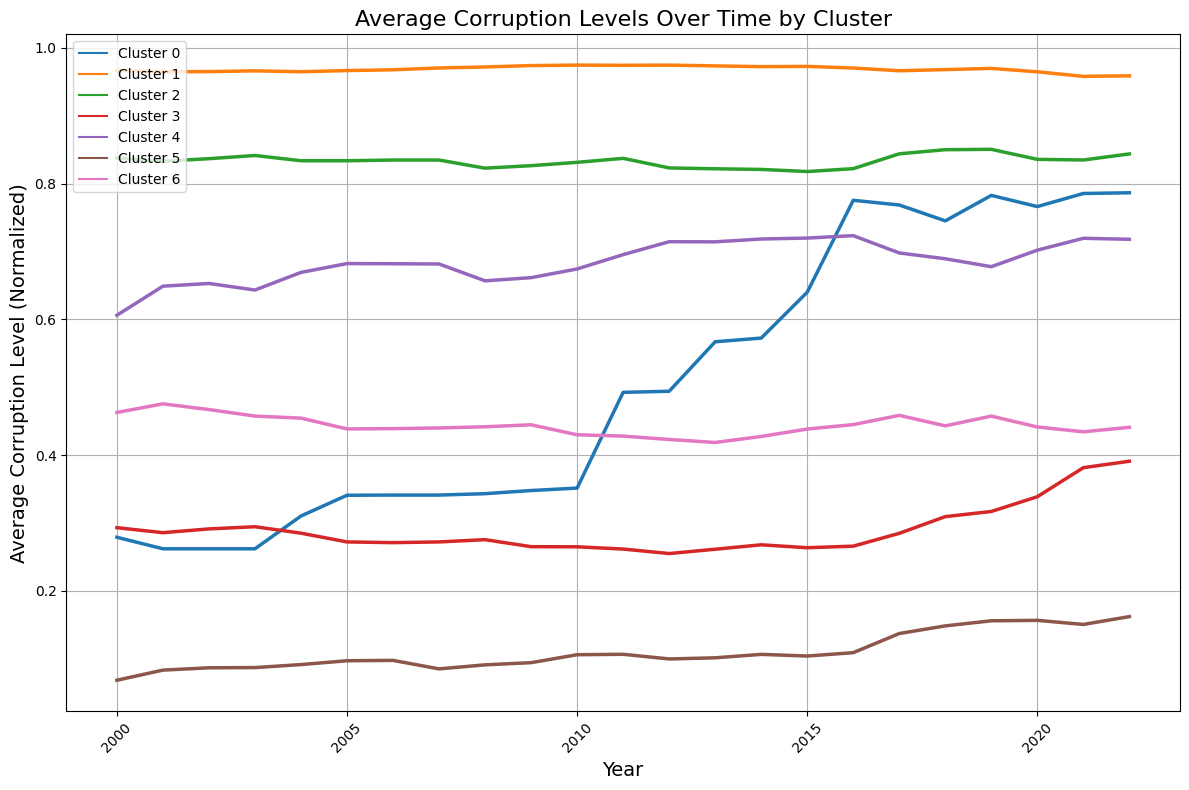

In [543]:
mean_corruption_by_cluster_ex_3 = pivot_df_ex_3.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ex_3.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ex_3.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ex_3[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ex_3.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [544]:
cluster_assignments_ex_3 = pivot_df_ex_3.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ex_3 = cluster_assignments_ex_3.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ex_3.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ex_3.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Benin, Guyana, Romania, Tunisia
Cluster 1: Australia, Austria, Belgium, Canada, Chile, Denmark, Estonia, Finland, France, Germany, Iceland, Ireland, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, Spain, Sweden, Switzerland, United Kingdom, United States of America, Uruguay
Cluster 2: Barbados, Botswana, Cape Verde, Costa Rica, Cyprus, Greece, Hong Kong, Israel, Italy, Jamaica, Japan, Slovakia, Slovenia, South Korea, Suriname, Trinidad and Tobago, United Arab Emirates
Cluster 3: Albania, Algeria, Armenia, Belarus, Bolivia, Bosnia and Herzegovina, Burundi, Dominican Republic, Gabon, Ghana, Guatemala, Honduras, Indonesia, Iran, Kenya, Laos, Madagascar, Malawi, Malaysia, Maldives, Moldova, Montenegro, North Macedonia, Philippines, Russia, Saudi Arabia, Solomon Islands, Thailand, The Gambia, Türkiye, Uganda, Ukraine
Cluster 4: Bulgaria, Colombia, Croatia, Czechia, Georgia, Malta, Namibia, Oman, Peru, Rwanda, Senegal, Seychelles, Tanz

### Kernel Kmeans

In [545]:
# Set a seed for reproducibility
seed = 62
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ex_4= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2']]


# Step 1: Extract the time series data and normalize it
time_series_ex_4 = cluster_data_ex_4.drop(['country', 'ISO'], axis=1).values  # Assuming 'country' and 'ISO' columns are present

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ex_4 = cluster_data_ex_4.pivot(index='country', columns='year', values='v2x_execorr_2')


# Step 2:
time_series_ex_4 = pivot_df_ex_4.values

# Step 3: Compute DTW and Cluster
model_ex_4 = KernelKMeans(n_clusters=n_clusters, kernel="gak") #max_iter=5, n_init=2)
labels_ex_4 = model_ex_4.fit_predict(time_series_ex_4)

# Assign clusters back to the original DataFrame
pivot_df_ex_4['cluster'] = labels_ex_4

# Display or save your clustered data
print(pivot_df_ex_4['cluster'].reset_index())



c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


        country  cluster
0       Albania        3
1       Algeria        3
2        Angola        6
3     Argentina        1
4       Armenia        3
..          ...      ...
128  Uzbekistan        6
129     Vanuatu        1
130     Vietnam        0
131      Zambia        0
132    Zimbabwe        6

[133 rows x 2 columns]


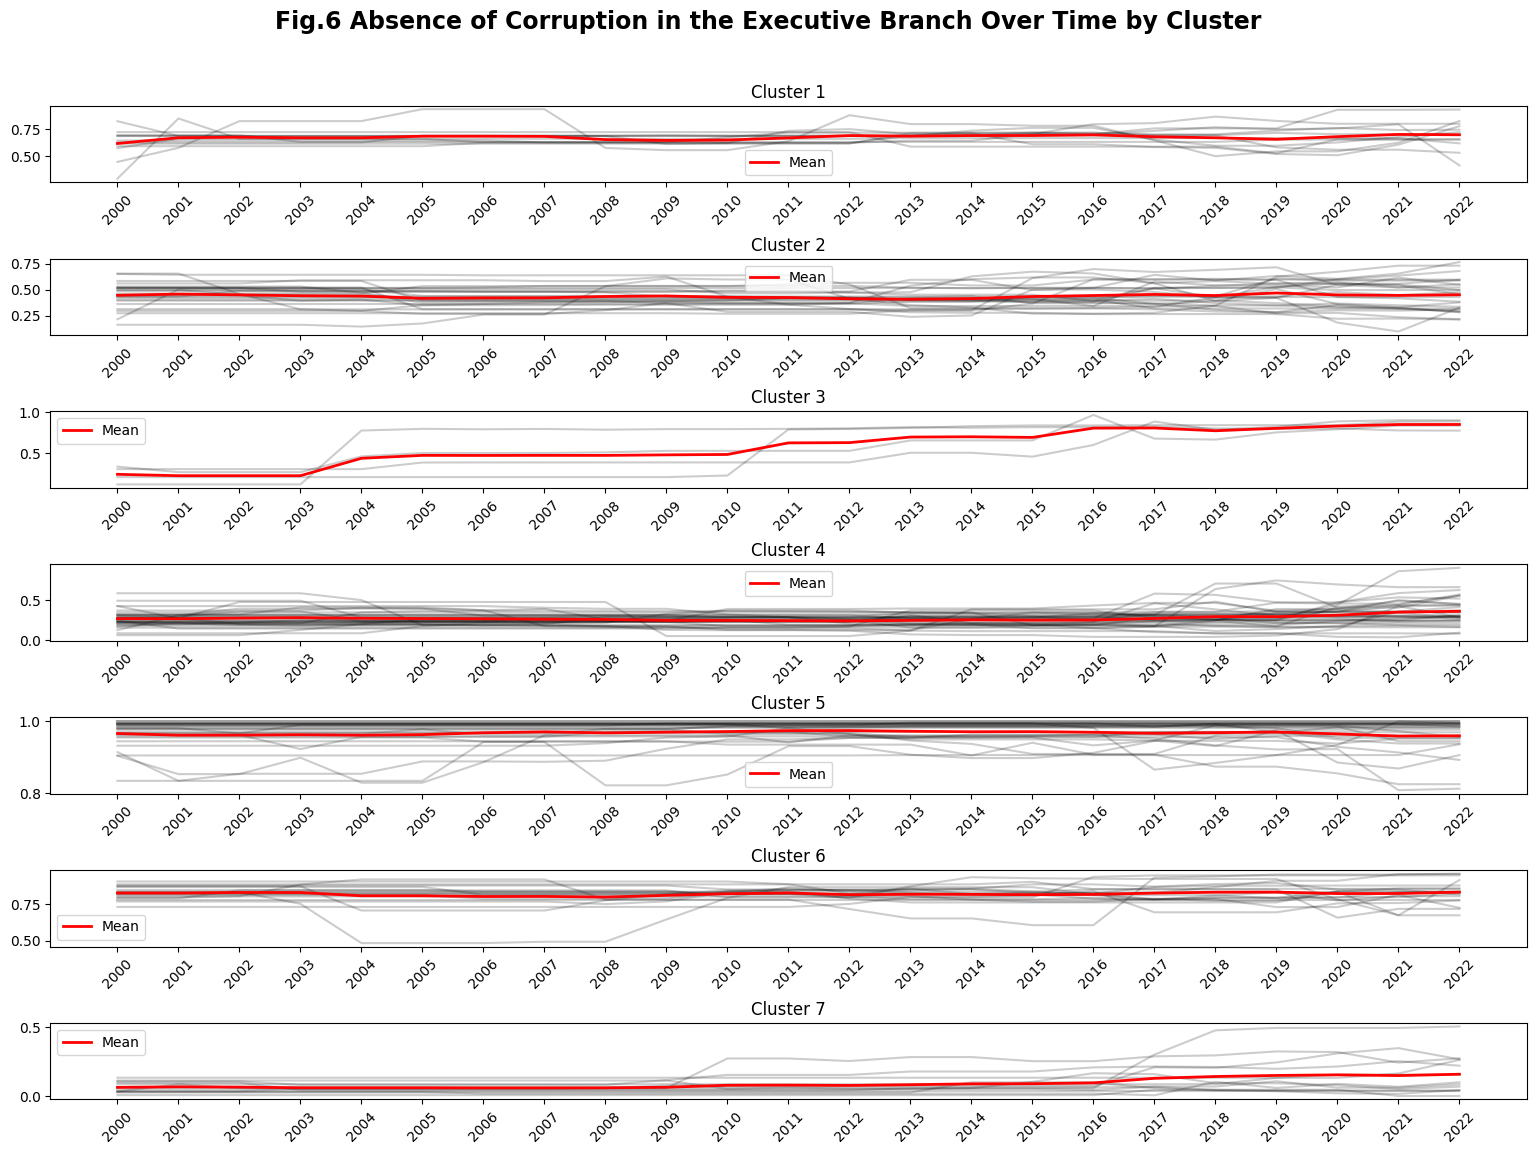

In [546]:

# Assuming years, time_series_3, and labels_3 are defined as in your initial example
years = [str(year) for year in range(2000, 2022 + 1)]
plt.figure(figsize=(16, 12))



for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    # Filter the time series for the current cluster
    cluster_time_series = time_series_ex_4[labels_ex_4 == yi]
    
    # Plot each time series in the cluster
    for xx in cluster_time_series:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    
    # Calculate and plot the mean of the cluster
    mean_time_series = np.mean(cluster_time_series, axis=0)
    plt.plot(mean_time_series, "r-", linewidth=2, label='Mean')
    
    # Set title and adjust x-ticks to show years, add legend
    plt.title(f"Cluster {yi + 1}")
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)
    plt.legend() 

# Adjust the layout to prevent the subplots from squeezing too tight
plt.tight_layout(pad=3.0, h_pad=1.0)  # Added padding between subplots

# Increase the space for the main title
plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Fig.6 Absence of Corruption in the Executive Branch Over Time by Cluster', fontsize=17, fontweight='bold')
plt.savefig("figures/clusters_2.png")
plt.show()


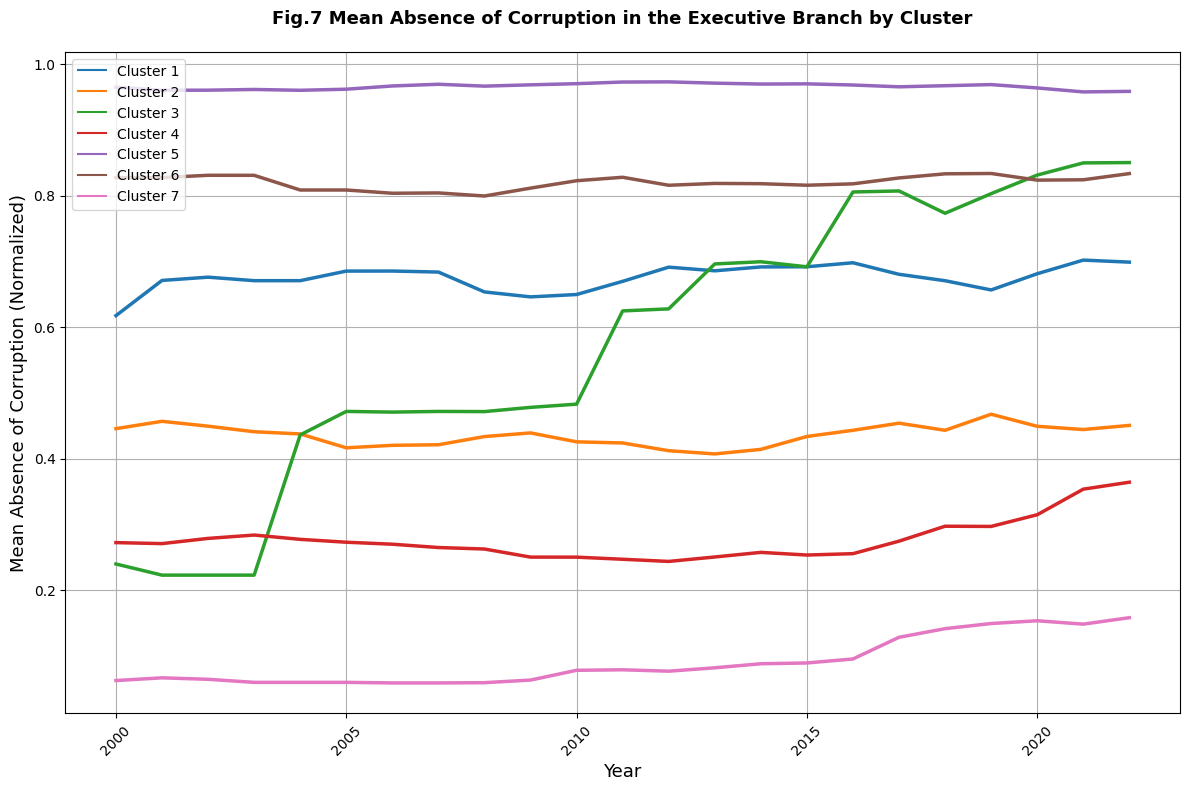

In [547]:
pivot_df_ex_4['cluster'] += 1 
mean_corruption_by_cluster_ex_4 = pivot_df_ex_4.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ex_4.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ex_4.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ex_4[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Fig.7 Mean Absence of Corruption in the Executive Branch by Cluster', fontsize=13, fontweight='bold', y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Absence of Corruption (Normalized)', fontsize=13)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ex_4.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/clusters_average_2.png")
plt.show()

In [548]:
cluster_assignments_ex_4 = pivot_df_ex_4.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ex_4 = cluster_assignments_ex_4.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ex_4.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ex_4.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 1: Bulgaria, Colombia, Czechia, Malta, Namibia, Oman, Peru, Rwanda, Seychelles, Tanzania, Vietnam, Zambia
Cluster 2: Argentina, Brazil, Burkina Faso, China, Ecuador, El Salvador, Eswatini, Ethiopia, Guyana, Hungary, India, Iran, Kuwait, Lesotho, Maldives, Mauritius, Mexico, Mongolia, Morocco, Mozambique, Panama, Serbia, South Africa, Sri Lanka, Vanuatu
Cluster 3: Benin, Georgia, Romania, Tunisia
Cluster 4: Albania, Algeria, Armenia, Belarus, Bolivia, Bosnia and Herzegovina, Burundi, Dominican Republic, Gabon, Ghana, Guatemala, Honduras, Indonesia, Kenya, Laos, Madagascar, Malawi, Malaysia, Moldova, Montenegro, Nicaragua, North Macedonia, Paraguay, Philippines, Russia, Saudi Arabia, Solomon Islands, Thailand, The Gambia, Togo, Türkiye, Uganda, Ukraine
Cluster 5: Australia, Austria, Belgium, Canada, Chile, Denmark, Estonia, Finland, France, Germany, Iceland, Ireland, Italy, Latvia, Lithuania, Luxembourg, Netherlands, New Zealand, Norway, Poland, Portugal, Singapore, Spain, Sweden

### Evaluatio Metrics

In [549]:

# Set a seed for reproducibility
#82, 7, 32
#96,62
seed = 62
#np.random.seed(seed)

# Define the range of clusters
cluster_range = range(6, 10)

# Define clustering algorithms with a placeholder for n_clusters
def get_clustering_algorithms(n_clusters):
    return {
        "Kmeans euclidean": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=seed),
        "Kmeans dtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=seed),
        "Kmeans softdtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", random_state=seed),
        "KernalKmeans gak": KernelKMeans(n_clusters=n_clusters, kernel="gak", random_state=seed),
    }



# Prepare to collect results
results = []

# Evaluate each algorithm across the cluster range and metrics
for n_clusters in cluster_range:
    algorithms = get_clustering_algorithms(n_clusters)
    for algo_name, algorithm in algorithms.items():
        y_pred = algorithm.fit_predict(time_series_ex_4)
        silhouette = silhouette_score(time_series_ex_4, y_pred)
        davis = davies_bouldin_score(time_series_ex_4, y_pred)
        
        results.append({
            "Algorithm": algo_name,
            "Clusters": n_clusters,
            "Silhouette": silhouette,
            "Davies-Bouldin": davis
        })

# Convert results to a DataFrame for better visualization

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


           Algorithm  Clusters  Silhouette  Davies-Bouldin
0   Kmeans euclidean         6    0.387677        1.019757
1         Kmeans dtw         6    0.354580        1.168293
2     Kmeans softdtw         6    0.395986        1.049555
3   KernalKmeans gak         6    0.317424        2.783482
4   Kmeans euclidean         7    0.379637        1.025827
5         Kmeans dtw         7    0.309925        1.155532
6     Kmeans softdtw         7    0.384886        1.042122
7   KernalKmeans gak         7    0.375478        0.963984
8   Kmeans euclidean         8    0.372650        1.046366
9         Kmeans dtw         8    0.310010        1.227996
10    Kmeans softdtw         8    0.358705        1.140538
11  KernalKmeans gak         8    0.368892        1.045154
12  Kmeans euclidean         9    0.373753        0.940649
13        Kmeans dtw         9    0.311077        1.394456
14    Kmeans softdtw         9    0.369853        1.028891
15  KernalKmeans gak         9    0.365957        1.0641

In [389]:
# Ensure 'country' in model_data is set as the index if not already
model_data_ex = data_4_subset.set_index('country')
model_data_ex['cluster'] = pivot_df_ex_4['cluster']

# Reset index to make 'country' a column again if needed later
model_data_ex.reset_index(inplace=True)

In [390]:
# Calculate the mean of socioeconomic variables by cluster
cluster_profiles_ex= model_data_ex.groupby('cluster')[['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']].mean()


print(cluster_profiles_ex)




         v2x_freexp_altinf  v2cltrnslw  v2clacjstm  v2clacjstw  v2pehealth  \
cluster                                                                      
1                 0.638612    0.555667    0.549888    0.552858    0.551973   
2                 0.678986    0.506986    0.514994    0.490044    0.432086   
3                 0.758301    0.475664    0.590238    0.581561    0.508044   
4                 0.629202    0.431925    0.448209    0.453219    0.413063   
5                 0.945184    0.803349    0.821782    0.793605    0.797702   
6                 0.850369    0.678382    0.701695    0.686789    0.703847   
7                 0.398798    0.290181    0.346414    0.365212    0.283185   

         gdp_percapita  
cluster                 
1         15649.846740  
2         12658.150726  
3         10344.256014  
4          9739.826766  
5         42328.240097  
6         26323.393717  
7          6946.077870  


In [77]:
# Set the figure size
#plt.figure(figsize=(10, 6))

# Generate a heatmap
#sns.heatmap(cluster_profiles_ex.T, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Value'})

# Adjust labels and title
#plt.title('Heatmap of Average Socioeconomic Variables by Cluster')
#plt.ylabel('Socioeconomic Variable')
#plt.xlabel('Cluster')

# Display the plot
#plt.show()


## Sociopolitical and economic variables correlations with respect to Executive Corruption

### Mean trajectories

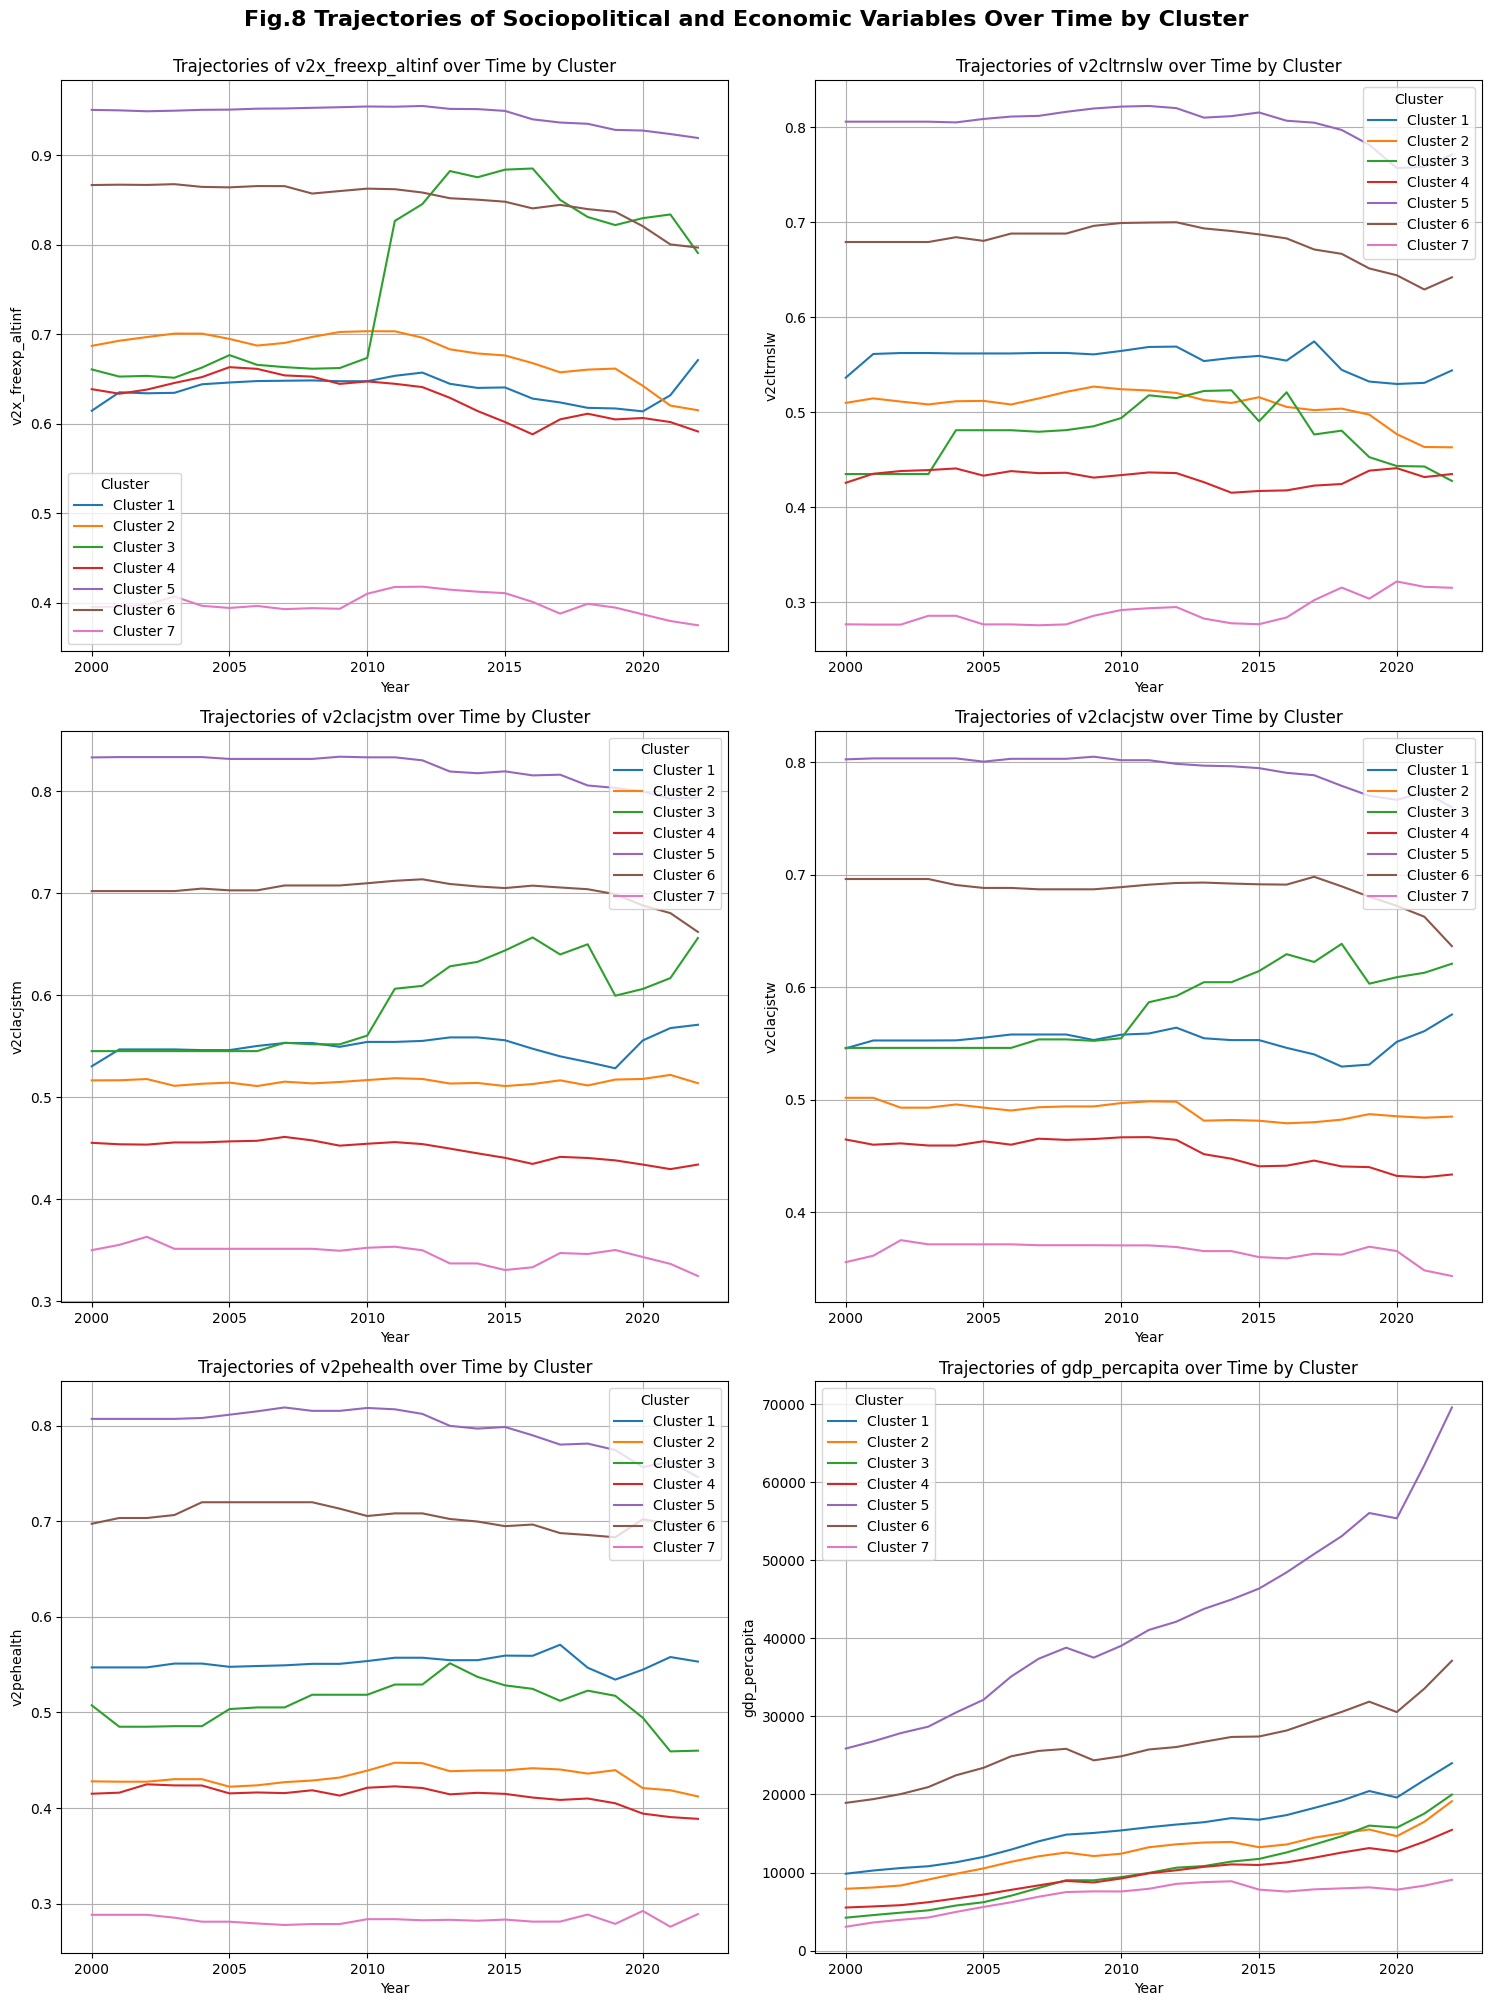

In [550]:


# Merge the cluster labels back to the original data
#cluster_data = cluster_data.merge(pivot_df_3[['cluster']], left_on='country', right_index=True, how='left')

# List of socioeconomic variables you want to analyze
socioeconomic_vars = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for idx, var in enumerate(socioeconomic_vars):
    # Pivot the data for each variable to create a time series indexed by country and cluster
    pivot_df = model_data_ex.pivot_table(index=['cluster', 'country'], columns='year', values=var)

    # Calculate the mean trajectory per cluster
    mean_trajectories = pivot_df.groupby(level=0).mean()

    # Plotting on the respective subplot
    ax = axes[idx]
    for cluster_id in mean_trajectories.index:
        ax.plot(mean_trajectories.columns, mean_trajectories.loc[cluster_id], label=f'Cluster {cluster_id}')
    
    ax.set_title(f'Trajectories of {var} over Time by Cluster')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)
    ax.legend(title='Cluster')
    ax.grid(True)

# Adjust layout to prevent overlap

plt.suptitle('Fig.8 Trajectories of Sociopolitical and Economic Variables Over Time by Cluster', fontsize=16, y=1,fontweight='bold')
#plt.tight_layout()
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/socio_eco_2.png")
plt.show()

    


### Correlations

In [551]:
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']


# Initialize a dictionary to hold the correlation coefficients for each cluster
correlation_by_cluster = {}

# Get unique clusters
clusters = model_data_ex['cluster'].unique()

# Calculate the correlation for each cluster
for cluster in clusters:
    cluster_data = model_data_ex[model_data_ex['cluster'] == cluster]
    correlation_by_cluster[cluster] = {}
    for var in variables:
        correlation_by_cluster[cluster][var] = cluster_data['v2x_execorr_2'].corr(cluster_data[var])

correlation_by_cluster

{7: {'v2x_freexp_altinf': 0.20679232669601585,
  'v2cltrnslw': 0.4393236194512991,
  'v2clacjstm': 0.31161589271088097,
  'v2clacjstw': 0.38549905876145185,
  'v2pehealth': 0.2029694673887263,
  'gdp_percapita': -0.0032287565309165847},
 4: {'v2x_freexp_altinf': 0.19743449942861385,
  'v2cltrnslw': 0.23793364495195038,
  'v2clacjstm': 0.24680906254441687,
  'v2clacjstw': 0.24012079588445512,
  'v2pehealth': 0.0837882084095914,
  'gdp_percapita': 0.042412967028621094},
 6: {'v2x_freexp_altinf': 0.1593327793864208,
  'v2cltrnslw': 0.18061336584723442,
  'v2clacjstm': 0.31407160475485696,
  'v2clacjstw': 0.26752506571311674,
  'v2pehealth': 0.2604833353112112,
  'gdp_percapita': 0.05153686520639235},
 2: {'v2x_freexp_altinf': 0.28690924434444665,
  'v2cltrnslw': 0.3476540212664207,
  'v2clacjstm': 0.2329809788767873,
  'v2clacjstw': 0.24287356985121797,
  'v2pehealth': -0.0438310206928246,
  'gdp_percapita': -0.05079328180347151},
 5: {'v2x_freexp_altinf': -0.0009048116842314703,
  'v2clt

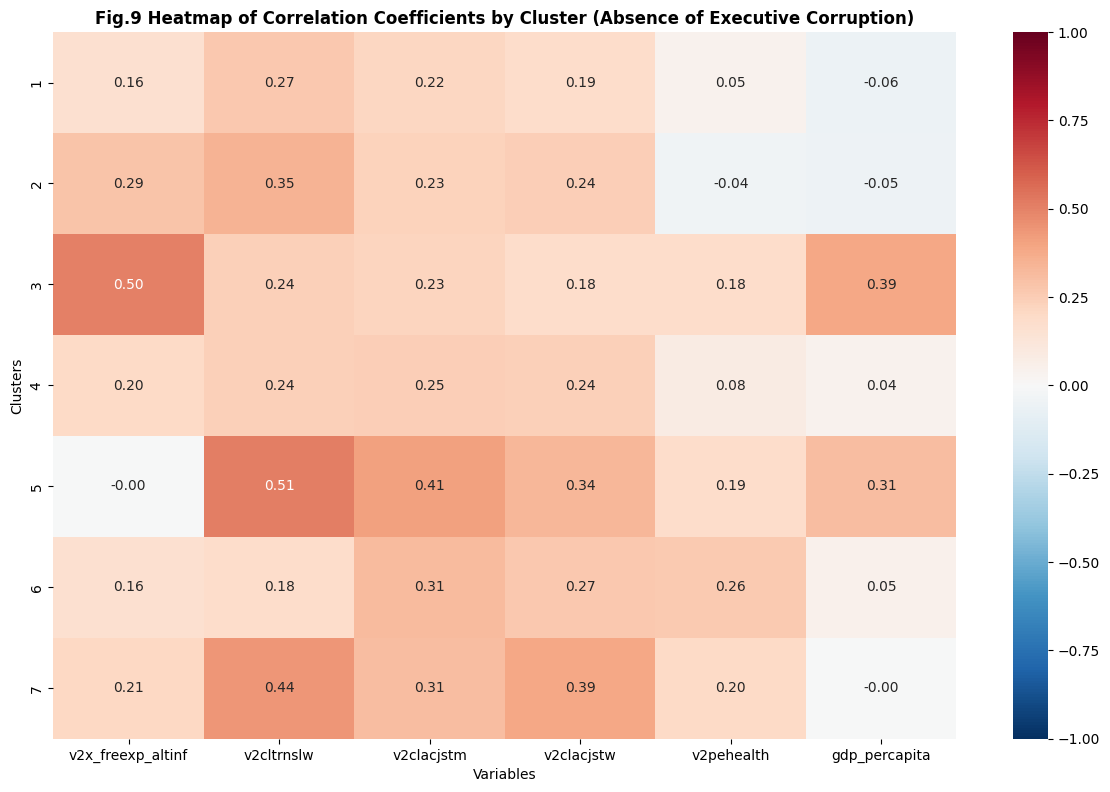

In [553]:
# Convert the dictionary to a DataFrame for easier plotting
cluster_labels = list(correlation_by_cluster.keys())
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']

# Create an empty DataFrame
correlation_matrix = pd.DataFrame(index=cluster_labels, columns=variables)

# Fill the DataFrame with correlation values
for cluster in correlation_by_cluster:
    for var in variables:
        correlation_matrix.loc[cluster, var] = correlation_by_cluster[cluster][var]

# Convert all entries to numeric type (if necessary)
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Sort the index (clusters) numerically if they are labeled by numbers
correlation_matrix.sort_index(inplace=True, key=lambda x: x.astype(int))

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Fig.9 Heatmap of Correlation Coefficients by Cluster (Absence of Executive Corruption)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/coefficients_2.png")
plt.show()

## Legislative

### K means euclidean

In [554]:
# Set a seed for reproducibility
seed = 38
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_le= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]

# Step 1: Extract the time series data and normalize it
time_series_le = cluster_data_le.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_le = cluster_data_le.pivot(index='country', columns='year', values='v2lgcrrpt')


# Step 2:
time_series_le = pivot_df_le.values

# Step 3: Compute DTW and Cluster
model_le = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
labels_le = model_le.fit_predict(time_series_le)

# Assign clusters back to the original DataFrame
pivot_df_le['cluster'] = labels_le

# Display or save your clustered data
print(pivot_df_le['cluster'].reset_index())



0.085 --> 0.065 --> 0.063 --> 0.062 --> 0.062 --> 0.062 --> 0.062 --> 
        country  cluster
0       Albania        1
1       Algeria        6
2        Angola        6
3     Argentina        2
4       Armenia        1
..          ...      ...
128  Uzbekistan        6
129     Vanuatu        6
130     Vietnam        2
131      Zambia        5
132    Zimbabwe        3

[133 rows x 2 columns]


In [555]:
# Count the number of countries in each cluster
countries_per_cluster_le = pivot_df_le['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_le)

cluster
0     8
1    28
2    20
3    10
4    14
5    27
6    26
Name: count, dtype: int64


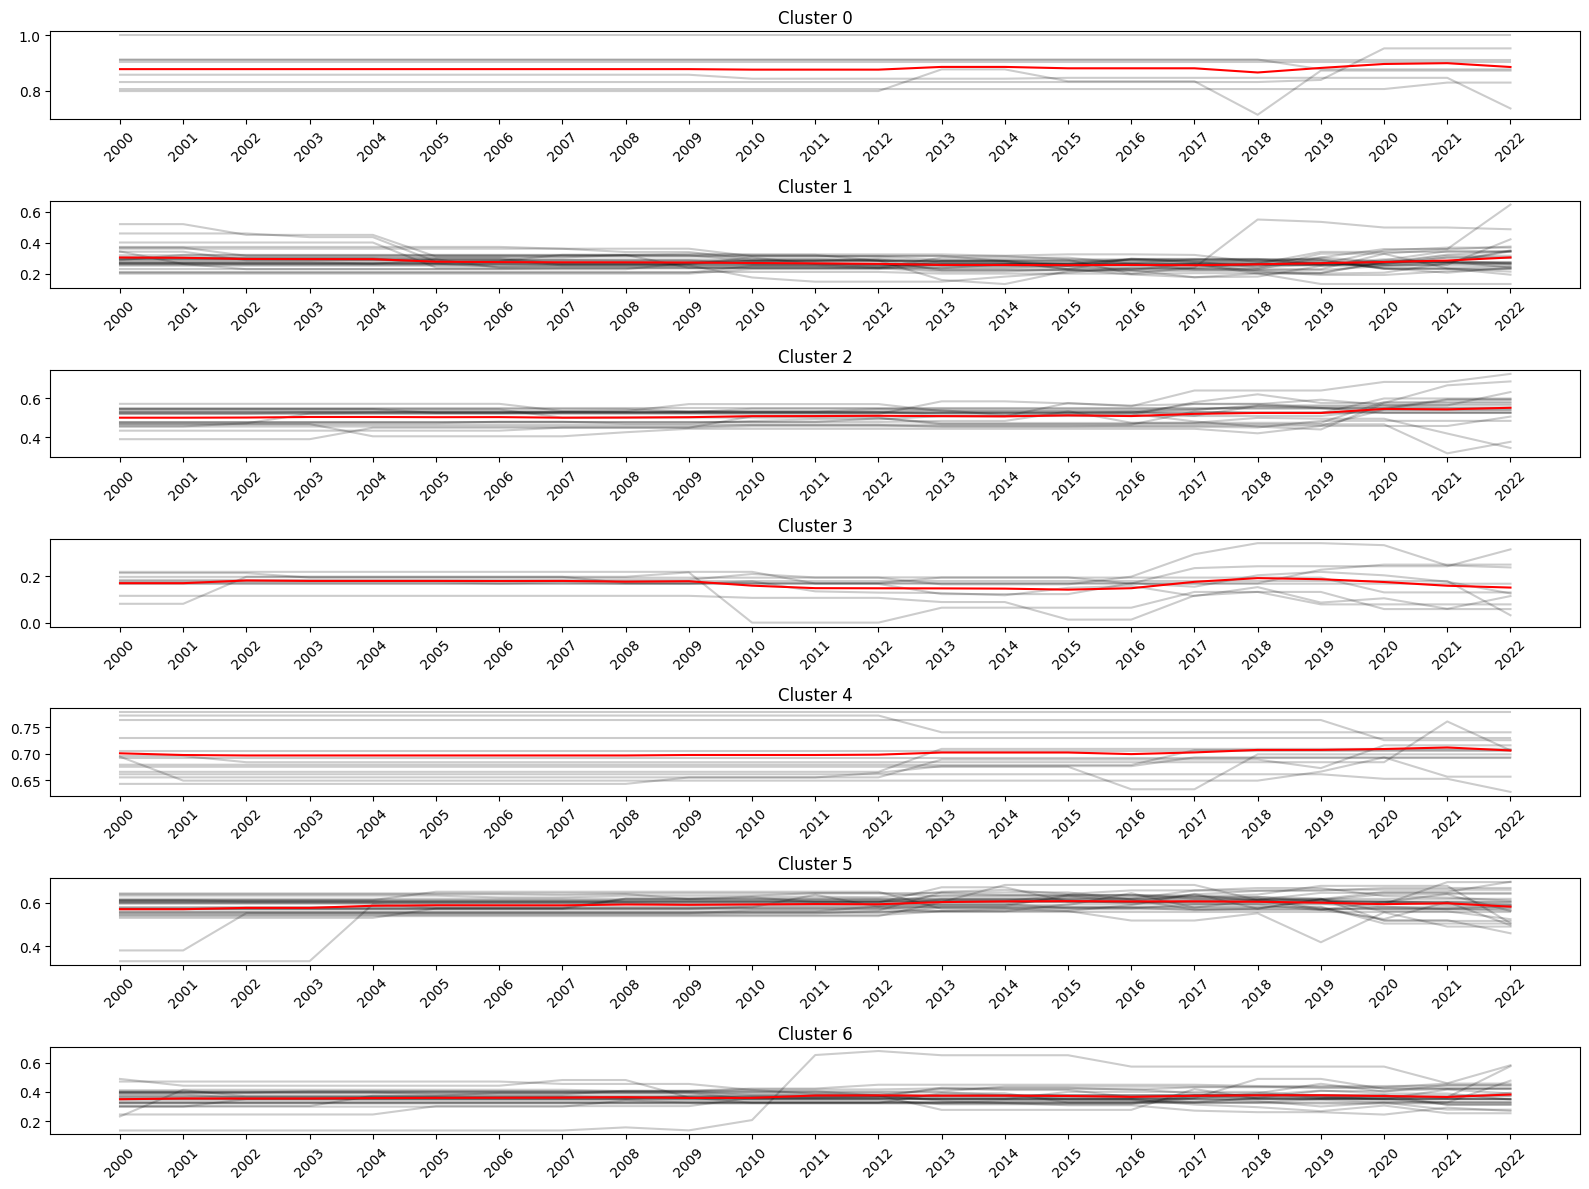

In [556]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_le[labels_le == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_le.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

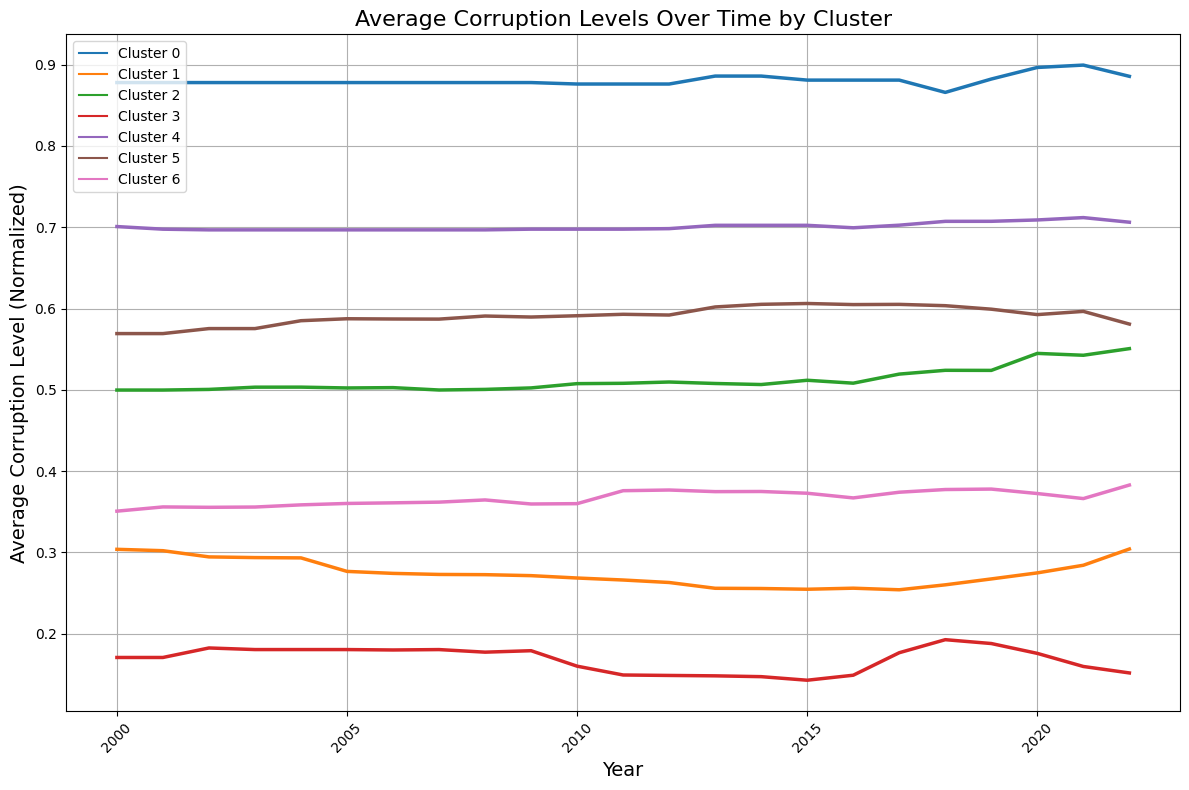

In [557]:
mean_corruption_by_cluster_le = pivot_df_le.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_le.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_le.columns):
    sns.lineplot(data=mean_corruption_by_cluster_le[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels_le = [f'Cluster {i}' for i in mean_corruption_by_cluster_le.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels_le[i]) for i in range(len(legend_labels_le))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [558]:
cluster_assignments_le= pivot_df_le.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_le = cluster_assignments_le.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_le.rename(columns={'countries': 'countries_list'}, inplace=True)

In [559]:
for index, row in clustered_countries_le.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Denmark, Finland, Luxembourg, New Zealand, Norway, Singapore, Sweden, Uruguay
Cluster 1: Albania, Armenia, Brazil, Burundi, Cameroon, Ecuador, Gabon, India, Iran, Kazakhstan, Kenya, Laos, Maldives, Mexico, Moldova, Nicaragua, Paraguay, Peru, Philippines, Republic of the Congo, Russia, Solomon Islands, Sri Lanka, Tajikistan, Thailand, Türkiye, Uganda, Ukraine
Cluster 2: Argentina, Benin, Costa Rica, Croatia, Czechia, Eswatini, Ethiopia, Ghana, Guyana, Italy, Lesotho, Malta, Oman, Seychelles, Slovakia, South Africa, South Korea, Tanzania, The Gambia, Vietnam
Cluster 3: Azerbaijan, Chad, Dominican Republic, Guatemala, Honduras, Indonesia, Kyrgyzstan, Madagascar, Nigeria, Zimbabwe
Cluster 4: Australia, Barbados, Belgium, Canada, Estonia, France, Germany, Hong Kong, Iceland, Ireland, Netherlands, Switzerland, United Arab Emirates, United Kingdom
Cluster 5: Austria, Belarus, Botswana, Burkina Faso, Cape Verde, Chile, China, Cyprus, Georgia, Greece, Israel, Jamaica, Japan, Latvia, 

### K-means dtw

In [560]:
# Set a seed for reproducibility
seed = 38
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_le_2= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]


# Step 1: Extract the time series data and normalize it
time_series_le_2 = cluster_data_le_2.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_le_2 = cluster_data_le_2.pivot(index='country', columns='year', values='v2lgcrrpt')


# Step 2:
time_series_le_2 = pivot_df_le_2.values

# Step 3: Compute DTW and Cluster
model_le_2 = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels_le_2 = model_le_2.fit_predict(time_series_le_2)

# Assign clusters back to the original DataFrame
pivot_df_le_2['cluster'] = labels_le_2

# Display or save your clustered data
print(pivot_df_le_2['cluster'].reset_index())



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

0.079 --> 0.049 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.048 --> 0.048 --> 0.047 --> 0.046 --> 0.046 --> 
        country  cluster
0       Albania        0
1       Algeria        5
2        Angola        5
3     Argentina        6
4       Armenia        0
..          ...      ...
128  Uzbekistan        5
129     Vanuatu        5
130     Vietnam        6
131      Zambia        1
132    Zimbabwe        0

[133 rows x 2 columns]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


In [561]:
# Count the number of countries in each cluster
countries_per_cluster_le_2 = pivot_df_le_2['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_le_2)

cluster
0    32
1    23
2    11
3     8
4     7
5    21
6    31
Name: count, dtype: int64


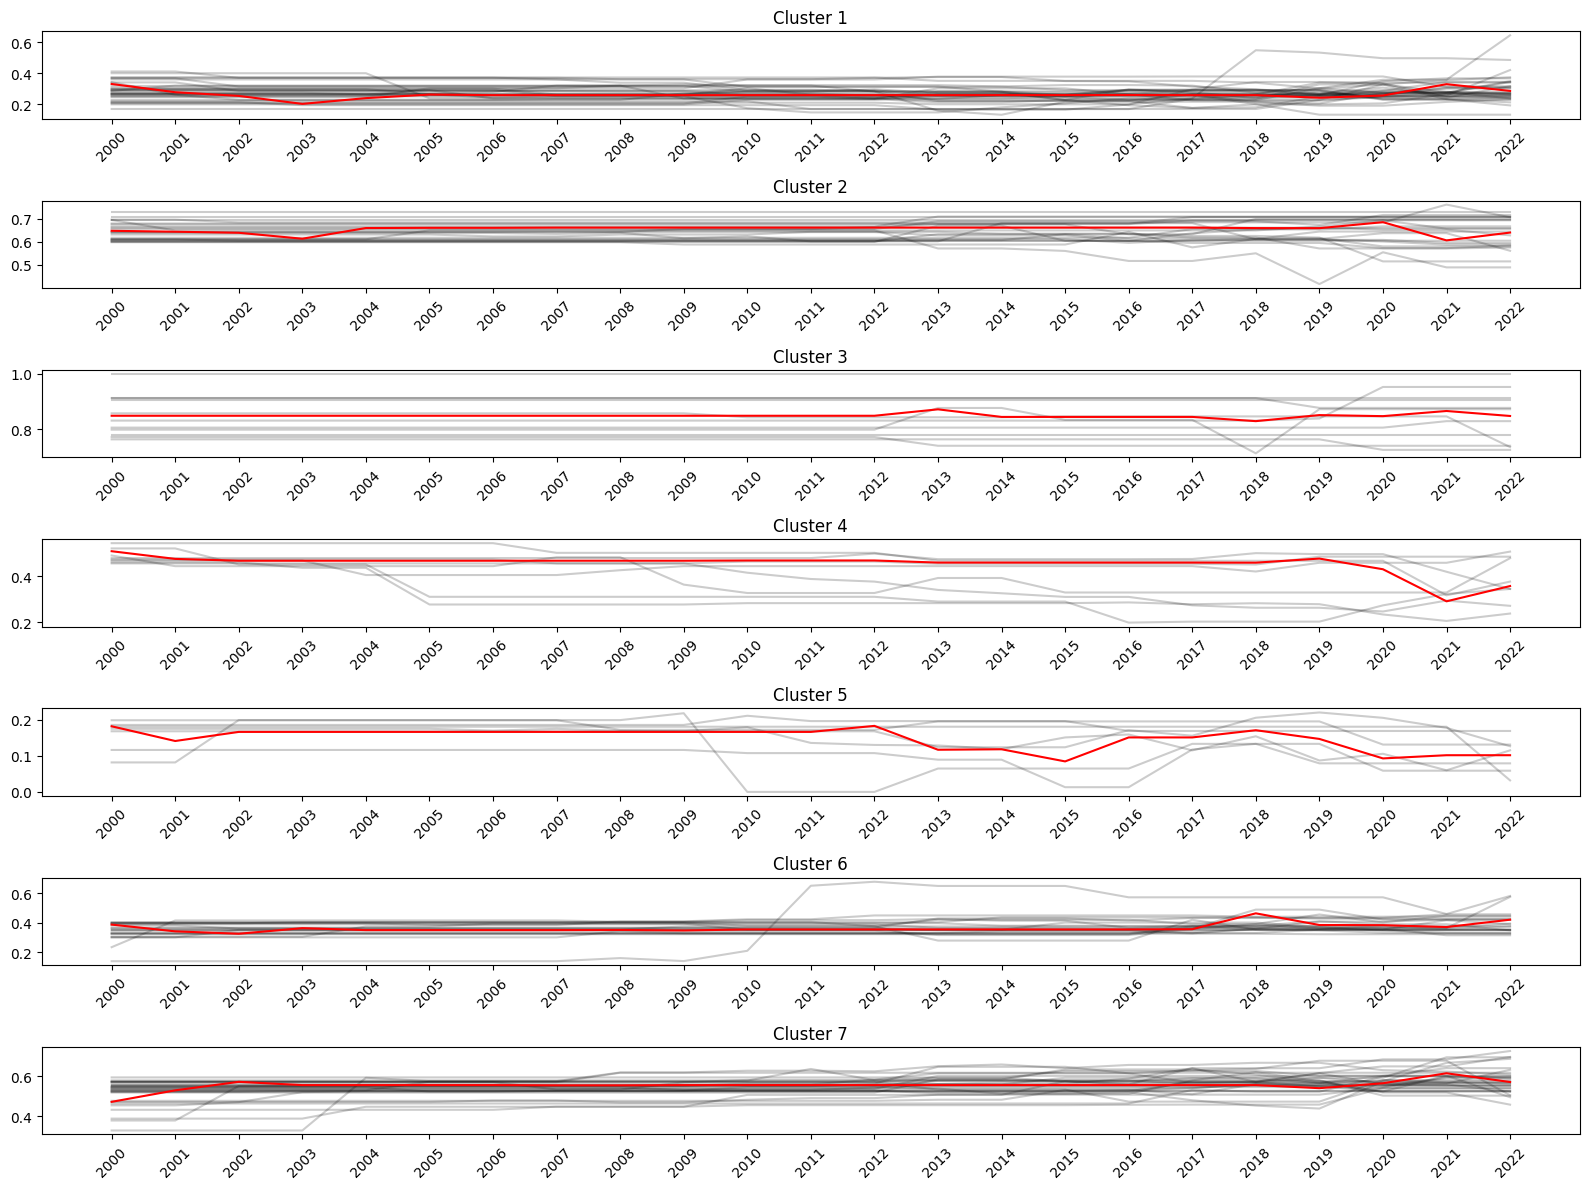

In [562]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_le_2[labels_le_2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_le_2.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

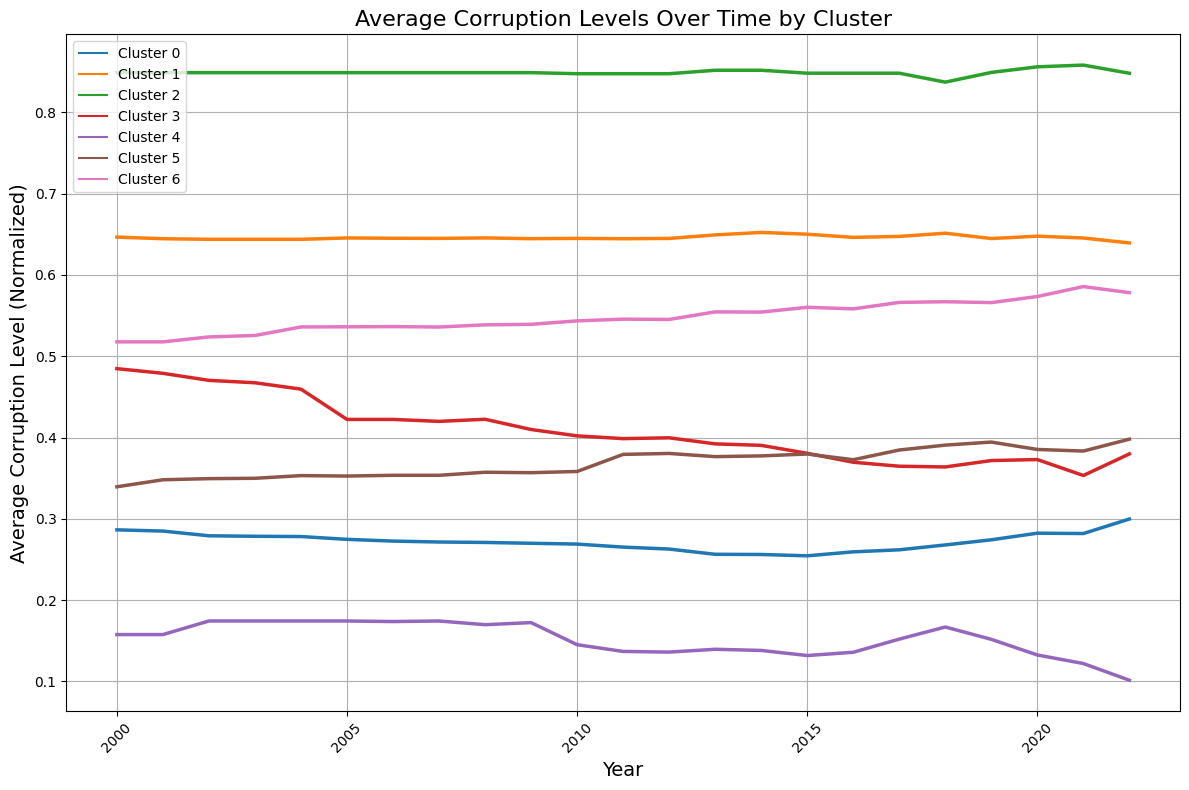

In [563]:
mean_corruption_by_cluster_le_2 = pivot_df_le_2.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_le_2.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_le_2.columns):
    sns.lineplot(data=mean_corruption_by_cluster_le_2[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_le_2.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [564]:
cluster_assignments_le_2 = pivot_df_le_2.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_le_2 = cluster_assignments_le_2.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_le_2.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_le_2.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Albania, Armenia, Brazil, Cameroon, Dominican Republic, Ecuador, El Salvador, Gabon, Honduras, India, Kazakhstan, Kenya, Laos, Maldives, Mexico, Moldova, Mongolia, Montenegro, Nicaragua, Paraguay, Peru, Philippines, Republic of the Congo, Russia, Solomon Islands, Sri Lanka, Tajikistan, Thailand, Türkiye, Uganda, Ukraine, Zimbabwe
Cluster 1: Australia, Austria, Barbados, Belgium, Canada, Chile, Cyprus, Estonia, France, Hong Kong, Ireland, Namibia, Poland, Saudi Arabia, Senegal, Slovenia, Spain, Switzerland, Trinidad and Tobago, United Arab Emirates, United Kingdom, United States of America, Zambia
Cluster 2: Denmark, Finland, Germany, Iceland, Luxembourg, Netherlands, New Zealand, Norway, Singapore, Sweden, Uruguay
Cluster 3: Bulgaria, Burundi, Croatia, Eswatini, Hungary, Iran, Lesotho, South Africa
Cluster 4: Azerbaijan, Chad, Guatemala, Indonesia, Kyrgyzstan, Madagascar, Nigeria
Cluster 5: Algeria, Angola, Bolivia, Bosnia and Herzegovina, Cambodia, Colombia, Equatorial Guin

### K-means softdw

In [565]:
# Set a seed for reproducibility
seed = 32
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_le_3= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]

# Step 1: Extract the time series data and normalize it
time_series_le_3= cluster_data_le_3.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_le_3 = cluster_data_le_3.pivot(index='country', columns='year', values='v2lgcrrpt')


# Step 2:
time_series_le_3 = pivot_df_le_3.values

# Step 3: Compute DTW and Cluster
model_le_3 = TimeSeriesKMeans(n_clusters=n_clusters, metric='softdtw', verbose=True)
labels_le_3= model_le_3.fit_predict(time_series_le_3)

# Assign clusters back to the original DataFrame
pivot_df_le_3['cluster'] = labels_le_3

# Display or save your clustered data
print(pivot_df_le_3['cluster'].reset_index())



1331.143 --> 1334.383 --> 1335.250 --> 1336.014 --> 1336.242 --> 1336.483 --> 1336.632 --> 1336.688 --> 1336.697 --> 1336.707 --> 1336.707 --> 1336.707 --> 
        country  cluster
0       Albania        3
1       Algeria        2
2        Angola        6
3     Argentina        4
4       Armenia        3
..          ...      ...
128  Uzbekistan        6
129     Vanuatu        2
130     Vietnam        4
131      Zambia        4
132    Zimbabwe        3

[133 rows x 2 columns]


In [566]:
# Count the number of countries in each cluster
countries_per_cluster_le_3 = pivot_df_le_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_le_3)

cluster
0    11
1     8
2    12
3    27
4    31
5    23
6    21
Name: count, dtype: int64


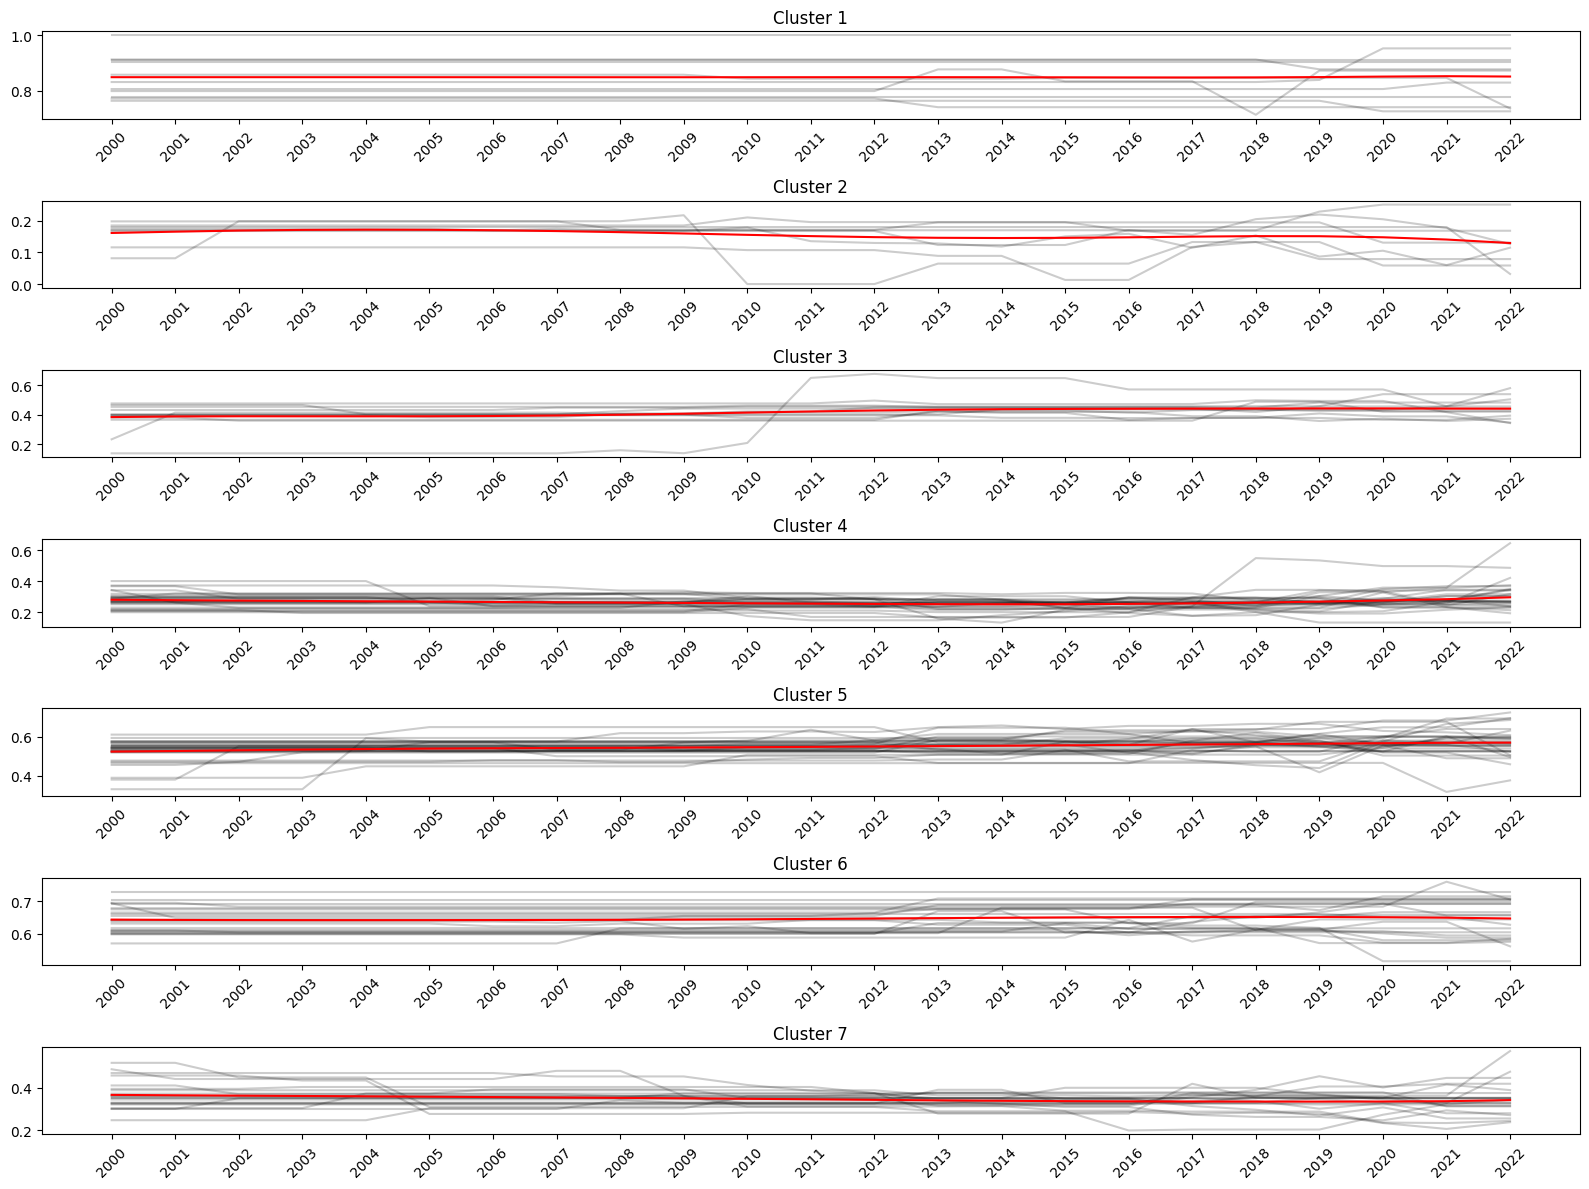

In [567]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_le_3[labels_le_3 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_le_3.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

In [568]:
# Count the number of countries in each cluster
countries_per_cluster_le_3 = pivot_df_le_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_le_3)

cluster
0    11
1     8
2    12
3    27
4    31
5    23
6    21
Name: count, dtype: int64


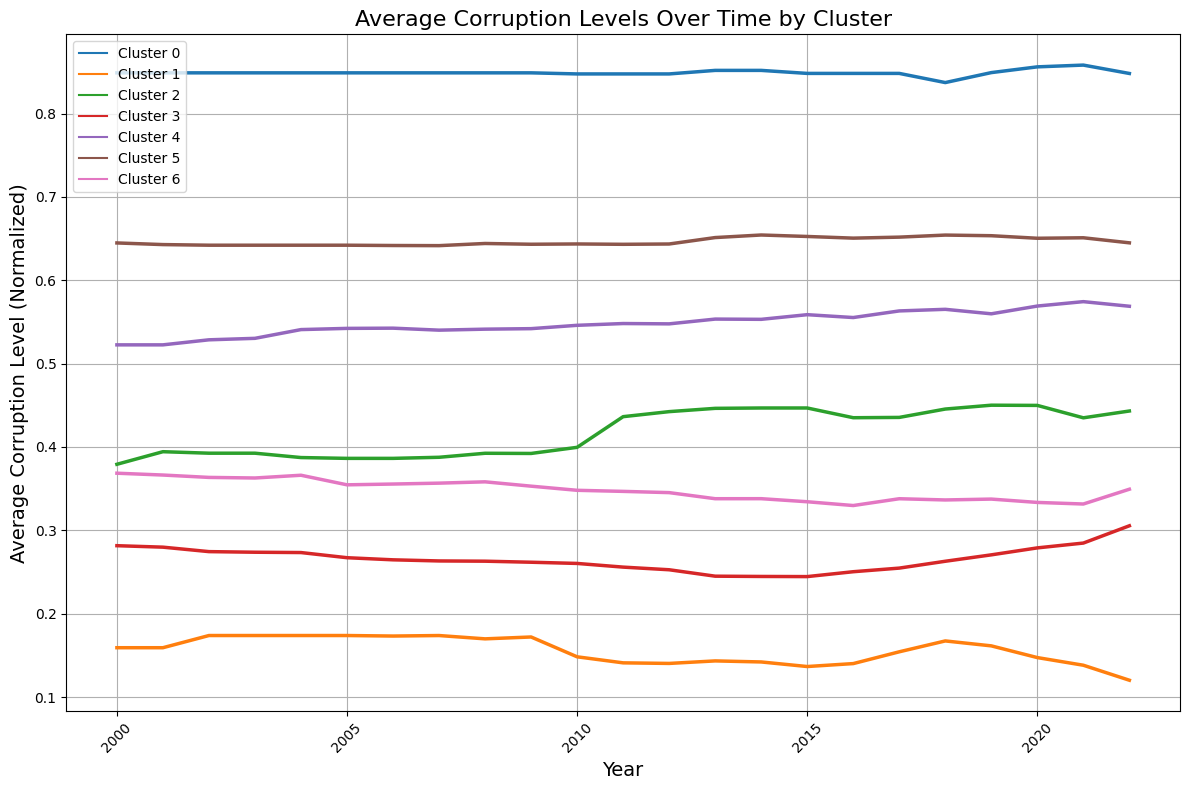

In [569]:
mean_corruption_by_cluster_le_3 = pivot_df_le_3.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_le_3.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_le_3.columns):
    sns.lineplot(data=mean_corruption_by_cluster_le_3[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_le_3.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show ()

In [570]:
cluster_assignments_le_3 = pivot_df_le_3.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_le_3 = cluster_assignments_le_3.groupby('cluster')['country'].apply(list).reset_index()

clustered_countries_le_3.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_le_3.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Denmark, Finland, Germany, Iceland, Luxembourg, Netherlands, New Zealand, Norway, Singapore, Sweden, Uruguay
Cluster 1: Azerbaijan, Chad, Dominican Republic, Guatemala, Indonesia, Kyrgyzstan, Madagascar, Nigeria
Cluster 2: Algeria, Croatia, Lesotho, Malawi, Malaysia, Rwanda, Serbia, Slovakia, South Africa, Togo, Tunisia, Vanuatu
Cluster 3: Albania, Armenia, Brazil, Cameroon, Ecuador, Gabon, Honduras, Kazakhstan, Kenya, Laos, Maldives, Mexico, Moldova, Nicaragua, Paraguay, Peru, Philippines, Republic of the Congo, Russia, Solomon Islands, Sri Lanka, Tajikistan, Thailand, Türkiye, Uganda, Ukraine, Zimbabwe
Cluster 4: Argentina, Belarus, Benin, Botswana, Burkina Faso, Cape Verde, China, Costa Rica, Czechia, Eswatini, Ethiopia, Georgia, Ghana, Greece, Guyana, Italy, Jamaica, Japan, Latvia, Lithuania, Malta, Mozambique, Oman, Portugal, Seychelles, South Korea, Suriname, Tanzania, The Gambia, Vietnam, Zambia
Cluster 5: Australia, Austria, Barbados, Belgium, Canada, Chile, Cyprus, 

### Kernel K-means

In [571]:
# Set a seed for reproducibility
seed = 38
#1234, 7, 32
#38
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_le_4= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]


# Step 1: Extract the time series data and normalize it
time_series_le_4 = cluster_data_le_4.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_le_4 = cluster_data_le_4.pivot(index='country', columns='year', values='v2lgcrrpt')


# Step 2:
time_series_le_4 = pivot_df_le_4.values

# Step 3: Compute DTW and Cluster
model_le_4 = KernelKMeans(n_clusters=n_clusters, kernel="gak") #max_iter=5, n_init=2)
labels_le_4 = model_le_4.fit_predict(time_series_le_4)

# Assign clusters back to the original DataFrame
pivot_df_le_4['cluster'] = labels_le_4

# Display or save your clustered data
print(pivot_df_le_4['cluster'].reset_index())



c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


        country  cluster
0       Albania        0
1       Algeria        5
2        Angola        5
3     Argentina        6
4       Armenia        0
..          ...      ...
128  Uzbekistan        5
129     Vanuatu        5
130     Vietnam        6
131      Zambia        6
132    Zimbabwe        0

[133 rows x 2 columns]


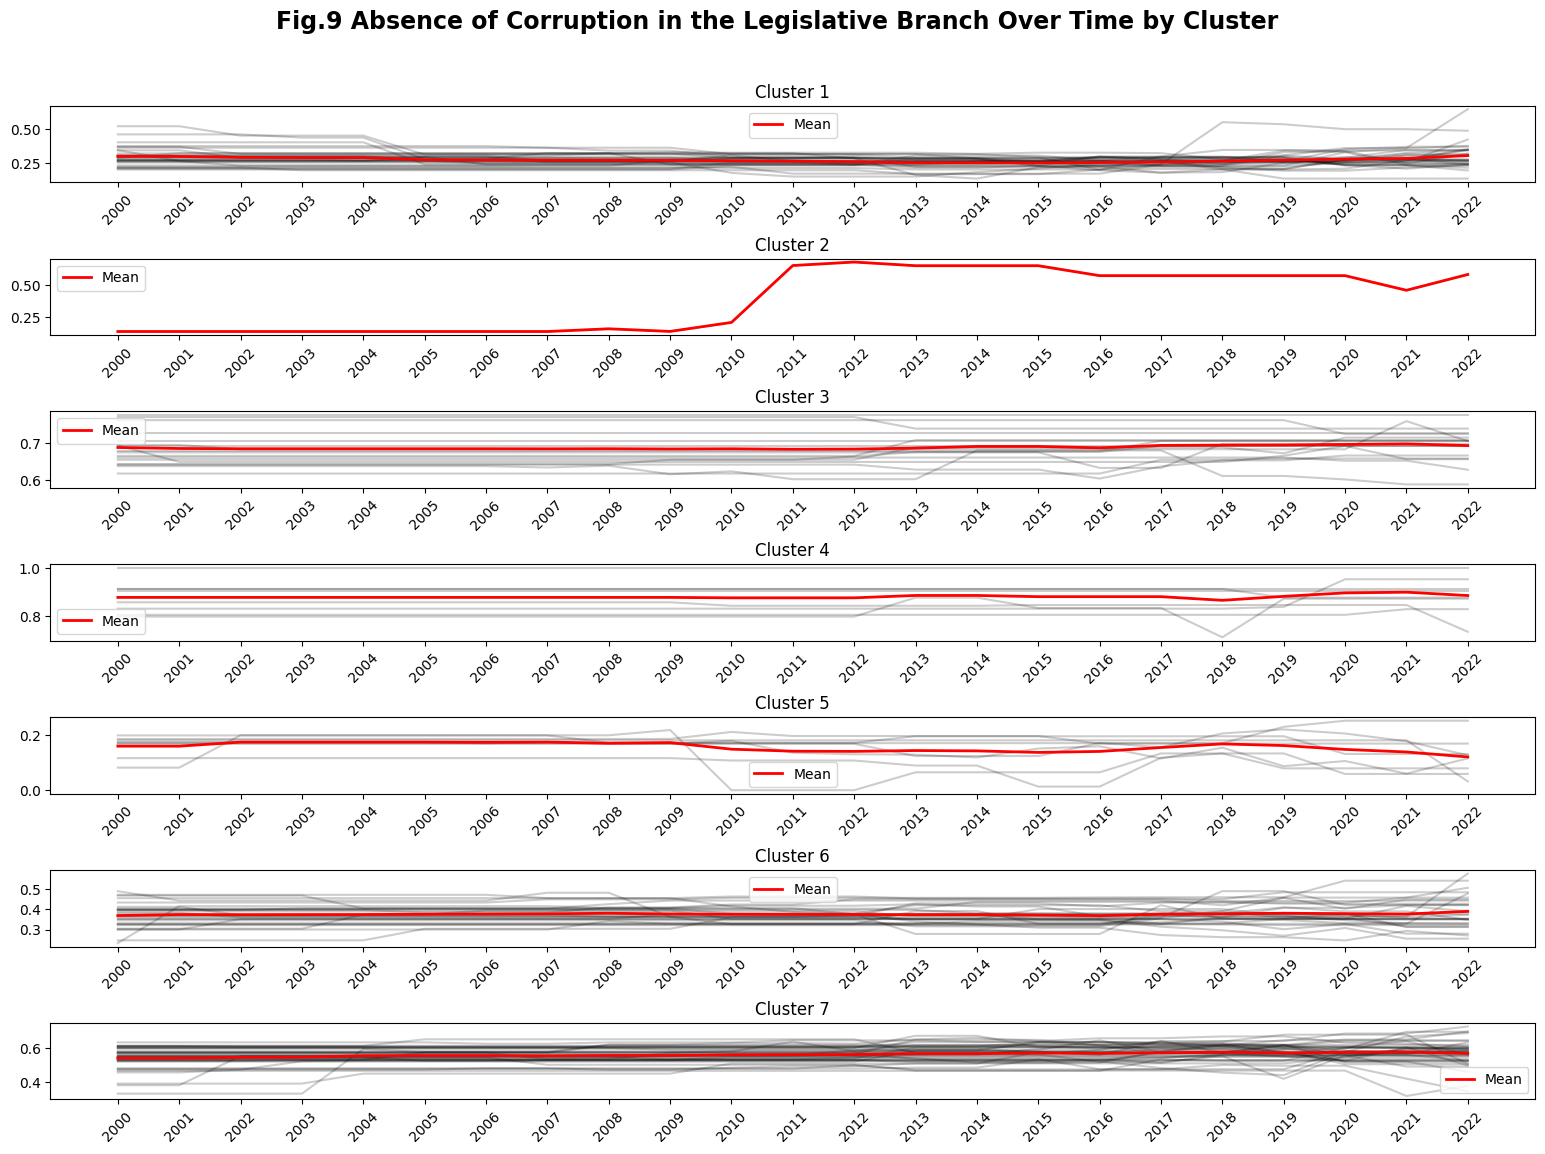

In [572]:

# Assuming years, time_series_3, and labels_3 are defined as in your initial example
years = [str(year) for year in range(2000, 2022 + 1)]
plt.figure(figsize=(16, 12))



for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    # Filter the time series for the current cluster
    cluster_time_series = time_series_le_4[labels_le_4 == yi]
    
    # Plot each time series in the cluster
    for xx in cluster_time_series:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    
    # Calculate and plot the mean of the cluster
    mean_time_series = np.mean(cluster_time_series, axis=0)
    plt.plot(mean_time_series, "r-", linewidth=2, label='Mean')
    
    # Set title and adjust x-ticks to show years, add legend
    plt.title(f"Cluster {yi + 1}")
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)
    plt.legend() 
# Adjust the layout to prevent the subplots from squeezing too tight
plt.tight_layout(pad=3.0, h_pad=1.0)  # Added padding between subplots

# Increase the space for the main title
plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Fig.9 Absence of Corruption in the Legislative Branch Over Time by Cluster', fontsize=17, fontweight='bold')
plt.savefig("figures/clusters_3.png")
plt.show()


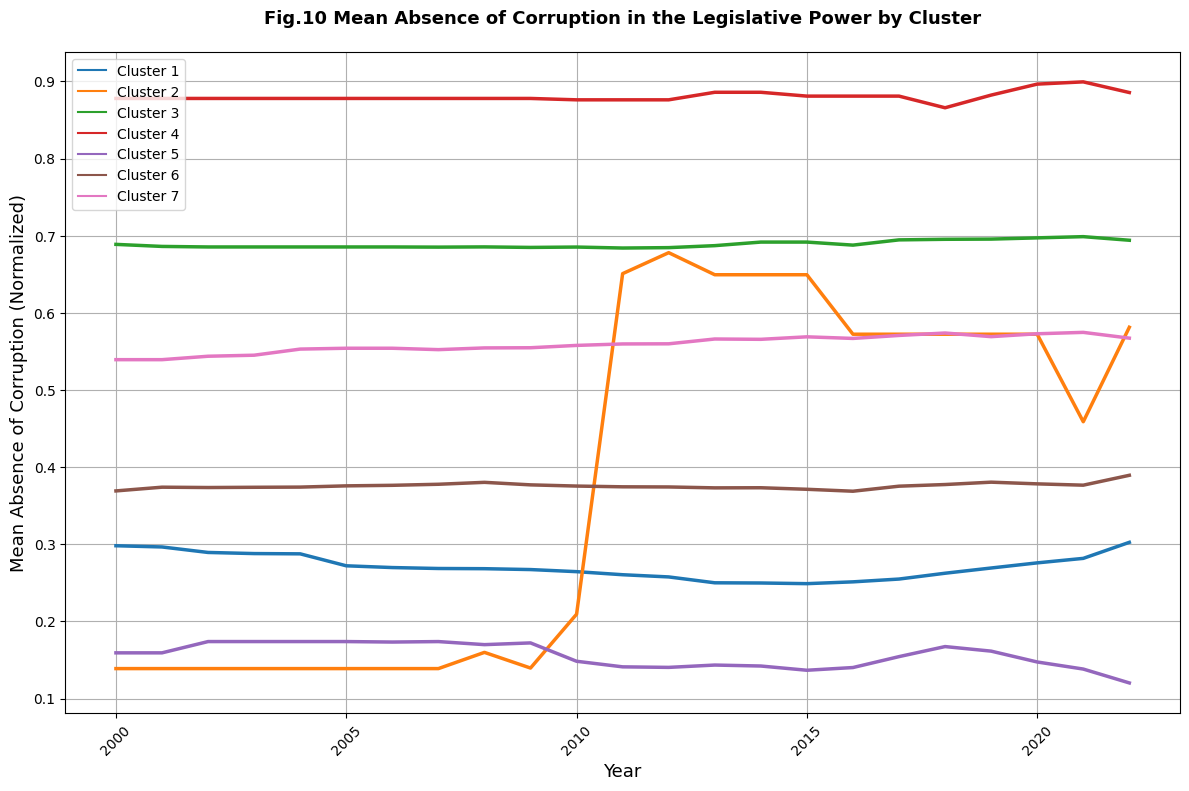

In [573]:
pivot_df_le_4['cluster'] += 1 
mean_corruption_by_cluster_le_4 = pivot_df_le_4.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_le_4.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_le_4.columns):
    sns.lineplot(data=mean_corruption_by_cluster_le_4[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Fig.10 Mean Absence of Corruption in the Legislative Power by Cluster', fontsize=13, fontweight='bold', y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Absence of Corruption (Normalized)', fontsize=13)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_le_4.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/clusters_average_3.png")
plt.show()

In [574]:
cluster_assignments_le_4 = pivot_df_le_4.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_le_4 = cluster_assignments_le_4.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_le_4.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_le_4.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 1: Albania, Armenia, Brazil, Burundi, Cameroon, Ecuador, Gabon, Honduras, India, Iran, Kazakhstan, Kenya, Laos, Maldives, Mexico, Moldova, Nicaragua, Paraguay, Peru, Philippines, Republic of the Congo, Russia, Solomon Islands, Sri Lanka, Tajikistan, Thailand, Türkiye, Uganda, Ukraine, Zimbabwe
Cluster 2: Tunisia
Cluster 3: Australia, Barbados, Belgium, Canada, Chile, Estonia, France, Germany, Hong Kong, Iceland, Ireland, Netherlands, Slovenia, Spain, Switzerland, United Arab Emirates, United Kingdom
Cluster 4: Denmark, Finland, Luxembourg, New Zealand, Norway, Singapore, Sweden, Uruguay
Cluster 5: Azerbaijan, Chad, Dominican Republic, Guatemala, Indonesia, Kyrgyzstan, Madagascar, Nigeria
Cluster 6: Algeria, Angola, Bolivia, Bosnia and Herzegovina, Bulgaria, Cambodia, Colombia, Croatia, El Salvador, Equatorial Guinea, Hungary, Kuwait, Malawi, Malaysia, Mauritius, Mongolia, Montenegro, Morocco, North Macedonia, Panama, Romania, Rwanda, Serbia, Slovakia, South Africa, Togo, Uzbeki

### Evaluation Metrics

In [575]:

# Set a seed for reproducibility
#82, 
#1234
#32
#38
seed = 38
#np.random.seed(seed)

# Define the range of clusters
cluster_range = range(6, 10)

# Define clustering algorithms with a placeholder for n_clusters
def get_clustering_algorithms(n_clusters):
    return {
        "Kmeans euclidean": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=seed),
        "Kmeans dtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=seed),
        "Kmeans softdtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", random_state=seed),
        "KernalKmeans gak": KernelKMeans(n_clusters=n_clusters, kernel="gak", random_state=seed),
    }



# Prepare to collect results
results = []

# Evaluate each algorithm across the cluster range and metrics
for n_clusters in cluster_range:
    algorithms = get_clustering_algorithms(n_clusters)
    for algo_name, algorithm in algorithms.items():
        y_pred = algorithm.fit_predict(time_series_le_4)
        silhouette = silhouette_score(time_series_le_4, y_pred)
        davis = davies_bouldin_score(time_series_le_4, y_pred)
        
        results.append({
            "Algorithm": algo_name,
            "Clusters": n_clusters,
            "Silhouette": silhouette,
            "Davies-Bouldin": davis
        })

# Convert results to a DataFrame for better visualization

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


           Algorithm  Clusters  Silhouette  Davies-Bouldin
0   Kmeans euclidean         6    0.366756        0.835434
1         Kmeans dtw         6    0.355962        0.861127
2     Kmeans softdtw         6    0.380215        0.835474
3   KernalKmeans gak         6    0.381049        0.834859
4   Kmeans euclidean         7    0.357949        0.872966
5         Kmeans dtw         7    0.331559        1.089425
6     Kmeans softdtw         7    0.333697        0.927217
7   KernalKmeans gak         7    0.412364        0.660586
8   Kmeans euclidean         8    0.348780        0.845363
9         Kmeans dtw         8    0.320909        0.892372
10    Kmeans softdtw         8    0.334301        0.925307
11  KernalKmeans gak         8    0.348500        0.802839
12  Kmeans euclidean         9    0.354484        0.757720
13        Kmeans dtw         9    0.300974        0.860121
14    Kmeans softdtw         9    0.302506        0.991433
15  KernalKmeans gak         9    0.275890        0.7207

## Sociopolitical and economic variables correlations with respect to Legislative Corruption

In [576]:
# prepare data
model_data_le = data_4_subset.set_index('country')
model_data_le['cluster'] = pivot_df_le_4['cluster']

# Reset index to make 'country'
model_data_le.reset_index(inplace=True)

In [577]:
# Calculate the mean of socioeconomic variables by cluster
cluster_profiles_le= model_data_le.groupby('cluster')[['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']].mean()

print(cluster_profiles_le)


         v2x_freexp_altinf  v2cltrnslw  v2clacjstm  v2clacjstw  v2pehealth  \
cluster                                                                      
1                 0.601476    0.416066    0.427338    0.427375    0.382604   
2                 0.558666    0.403587    0.592856    0.588442    0.495090   
3                 0.898194    0.797927    0.798788    0.763119    0.780498   
4                 0.902073    0.846537    0.848413    0.824948    0.855205   
5                 0.678254    0.378745    0.384141    0.397504    0.248763   
6                 0.668056    0.487086    0.511288    0.514859    0.484036   
7                 0.735868    0.587435    0.624396    0.607814    0.588998   

         gdp_percapita  
cluster                 
1          8969.227959  
2          9632.695475  
3         42063.345887  
4         52061.546316  
5          6453.333700  
6         13994.674315  
7         18599.944464  


### Mean Trajectories

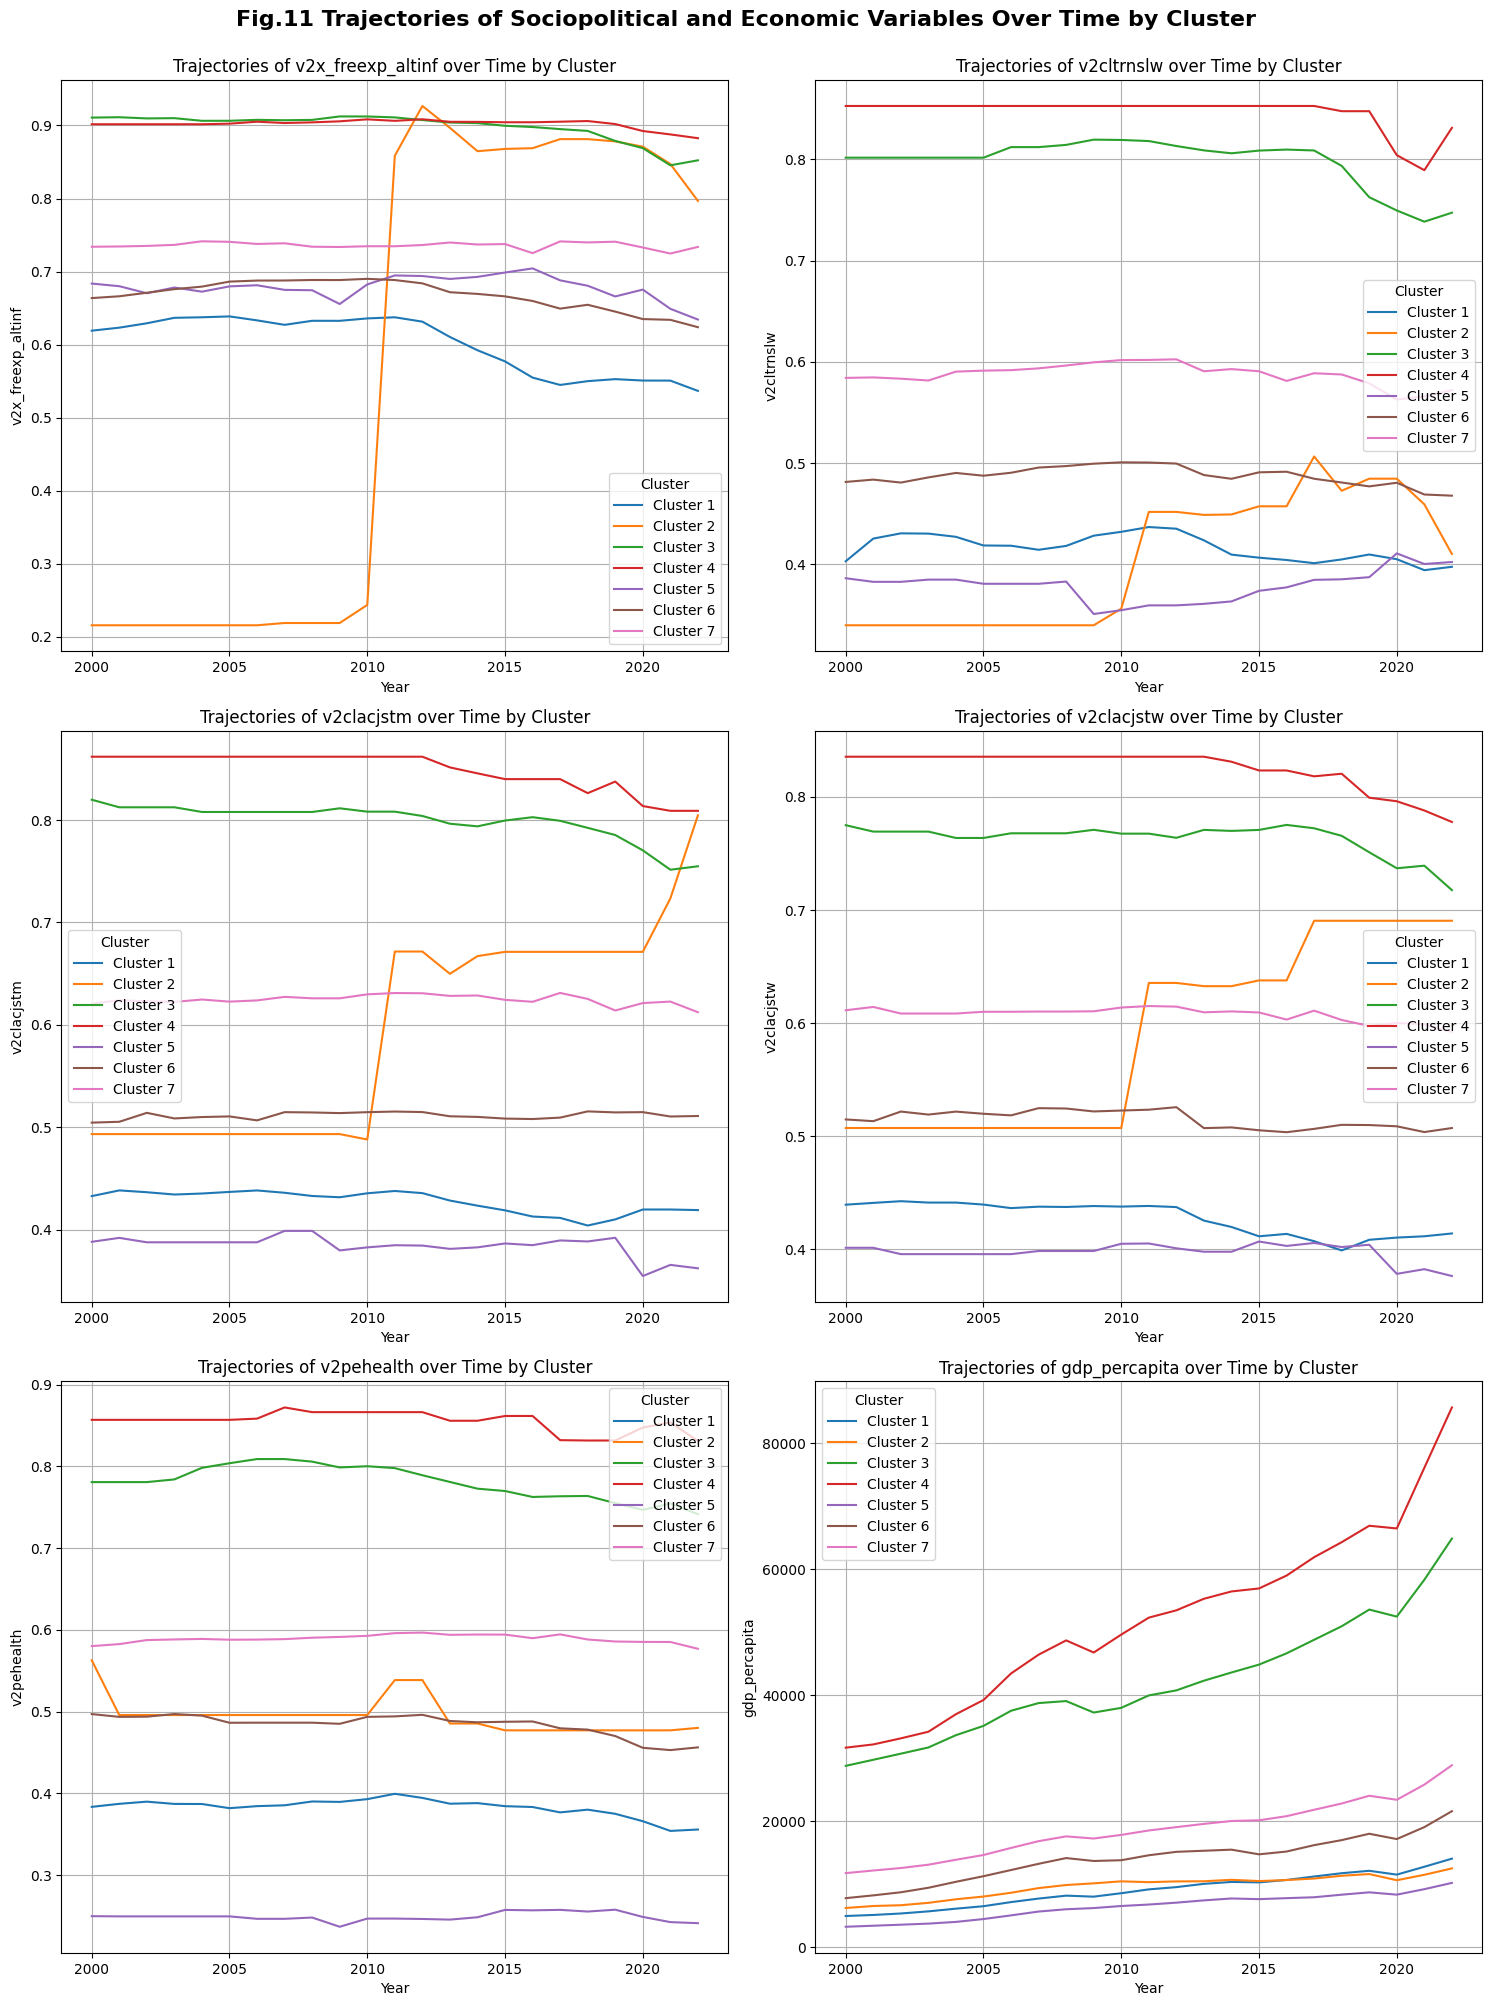

In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


    # List of socioeconomic variables you want to analyze
socioeconomic_vars = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for idx, var in enumerate(socioeconomic_vars):
    # Pivot the data for each variable to create a time series indexed by country and cluster
    pivot_df = model_data_le.pivot_table(index=['cluster', 'country'], columns='year', values=var)

    # Calculate the mean trajectory per cluster
    mean_trajectories = pivot_df.groupby(level=0).mean()

    # Plotting on the respective subplot
    ax = axes[idx]
    for cluster_id in mean_trajectories.index:
        ax.plot(mean_trajectories.columns, mean_trajectories.loc[cluster_id], label=f'Cluster {cluster_id}')
    
    ax.set_title(f'Trajectories of {var} over Time by Cluster')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)
    ax.legend(title='Cluster')
    ax.grid(True)

# Adjust layout to prevent overlap

plt.suptitle('Fig.11 Trajectories of Sociopolitical and Economic Variables Over Time by Cluster', fontsize=16, y=1,fontweight='bold')
#plt.tight_layout()
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/socio_eco_3.png")
plt.show()



### Correlations

In [579]:
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']


# Initialize a dictionary to hold the correlation coefficients for each cluster
correlation_by_cluster = {}

# Get unique clusters
clusters = model_data_le['cluster'].unique()

# Calculate the correlation for each cluster
for cluster in clusters:
    cluster_data = model_data_le[model_data_le['cluster'] == cluster]
    correlation_by_cluster[cluster] = {}
    for var in variables:
        correlation_by_cluster[cluster][var] = cluster_data['v2lgcrrpt'].corr(cluster_data[var])

correlation_by_cluster

{6: {'v2x_freexp_altinf': 0.2822876579346193,
  'v2cltrnslw': 0.35658651058855295,
  'v2clacjstm': 0.3442633828835499,
  'v2clacjstw': 0.4280658354284196,
  'v2pehealth': 0.17596302408564873,
  'gdp_percapita': -0.052296310478981214},
 1: {'v2x_freexp_altinf': 0.17828930173747704,
  'v2cltrnslw': 0.3184468533224407,
  'v2clacjstm': 0.14282990579045243,
  'v2clacjstw': 0.11866749209130151,
  'v2pehealth': 0.17374291051897603,
  'gdp_percapita': 0.05923865948865318},
 3: {'v2x_freexp_altinf': 0.08380129340768994,
  'v2cltrnslw': 0.2872105844186086,
  'v2clacjstm': 0.30311603161116923,
  'v2clacjstw': 0.24546188726523194,
  'v2pehealth': 0.4109039898244752,
  'gdp_percapita': 0.233782121096011},
 7: {'v2x_freexp_altinf': 0.25037666025110494,
  'v2cltrnslw': 0.26958704194333366,
  'v2clacjstm': 0.17172885301554333,
  'v2clacjstw': 0.18993031686961098,
  'v2pehealth': 0.11314358661413924,
  'gdp_percapita': 0.28632151954802365},
 5: {'v2x_freexp_altinf': 0.05948940257183921,
  'v2cltrnslw':

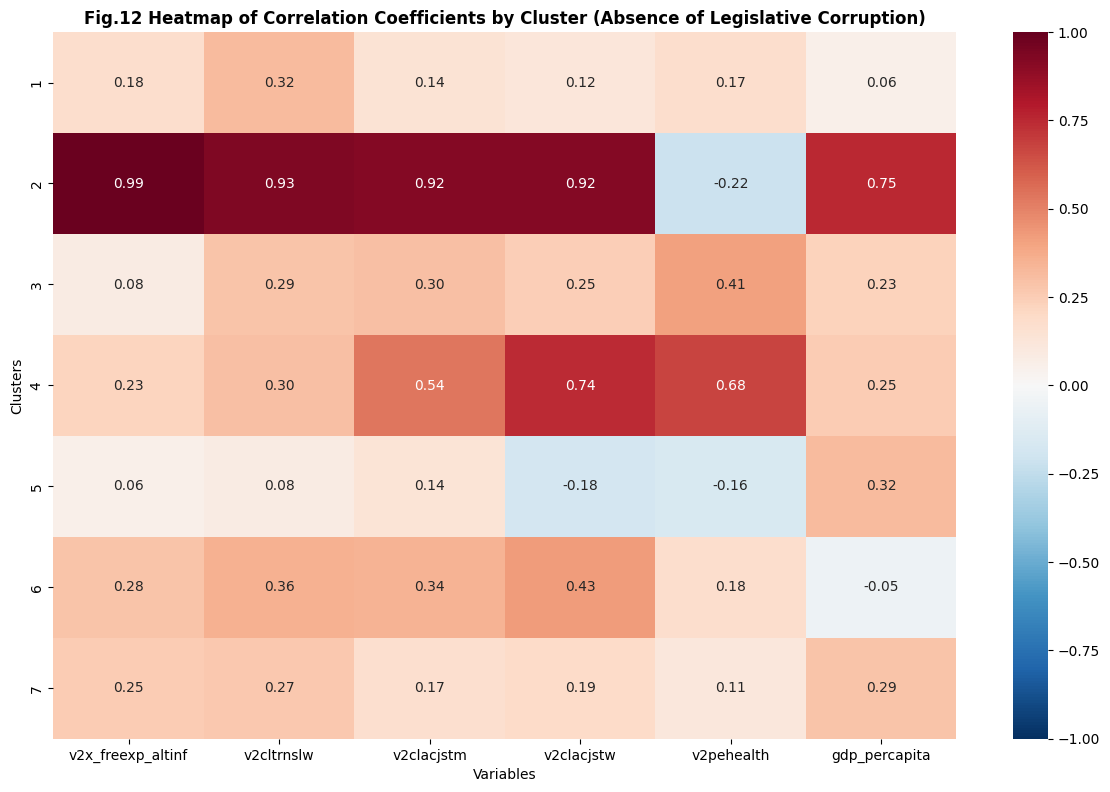

In [580]:
# Convert the dictionary to a DataFrame for easier plotting
cluster_labels = list(correlation_by_cluster.keys())
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']

# Create an empty DataFrame
correlation_matrix = pd.DataFrame(index=cluster_labels, columns=variables)

# Fill the DataFrame with correlation values
for cluster in correlation_by_cluster:
    for var in variables:
        correlation_matrix.loc[cluster, var] = correlation_by_cluster[cluster][var]

# Convert all entries to numeric type (if necessary)
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Sort the index (clusters) numerically if they are labeled by numbers
correlation_matrix.sort_index(inplace=True, key=lambda x: x.astype(int))

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Fig.12 Heatmap of Correlation Coefficients by Cluster (Absence of Legislative Corruption)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/coefficients_3.png")
plt.show()

## Judicial

## K means euclidean

In [582]:
# Set a seed for reproducibility
seed = 82
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ju= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]


# Step 1: Extract the time series data and normalize it
time_series_ju = cluster_data_ju.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ju = cluster_data_ju.pivot(index='country', columns='year', values='v2jucorrdc')


# Step 2:
time_series_ju = pivot_df_ju.values

# Step 3: Compute DTW and Cluster
model_ju = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
labels_ju = model_ju.fit_predict(time_series_ju)

# Assign clusters back to the original DataFrame
pivot_df_ju['cluster'] = labels_ju

# Display or save your clustered data
print(pivot_df_ju['cluster'].reset_index())



0.103 --> 0.073 --> 0.072 --> 0.072 --> 0.072 --> 0.072 --> 
        country  cluster
0       Albania        5
1       Algeria        5
2        Angola        5
3     Argentina        1
4       Armenia        5
..          ...      ...
128  Uzbekistan        2
129     Vanuatu        3
130     Vietnam        2
131      Zambia        1
132    Zimbabwe        1

[133 rows x 2 columns]


In [583]:
# Count the number of countries in each cluster
countries_per_cluster_ju = pivot_df_ju['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ju)

cluster
0    21
1    20
2    18
3    35
4     8
5    28
6     3
Name: count, dtype: int64


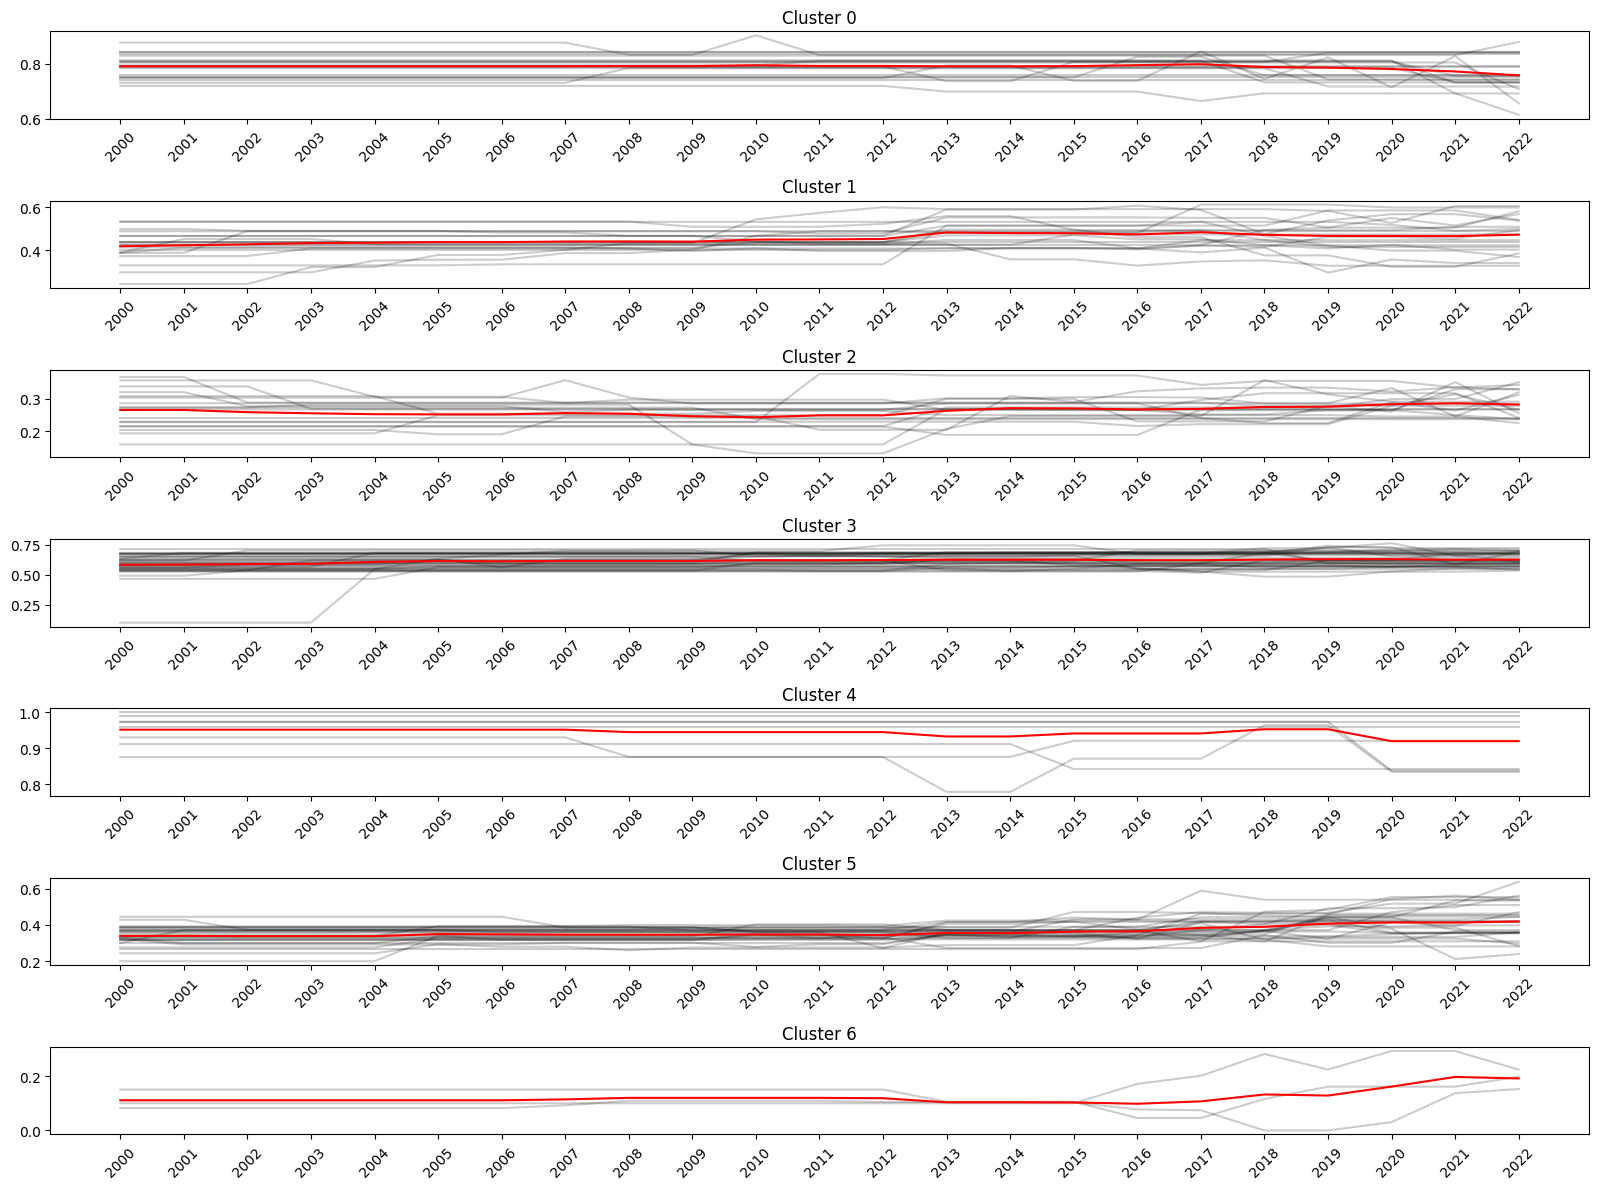

In [584]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ju[labels_ju == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ju.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

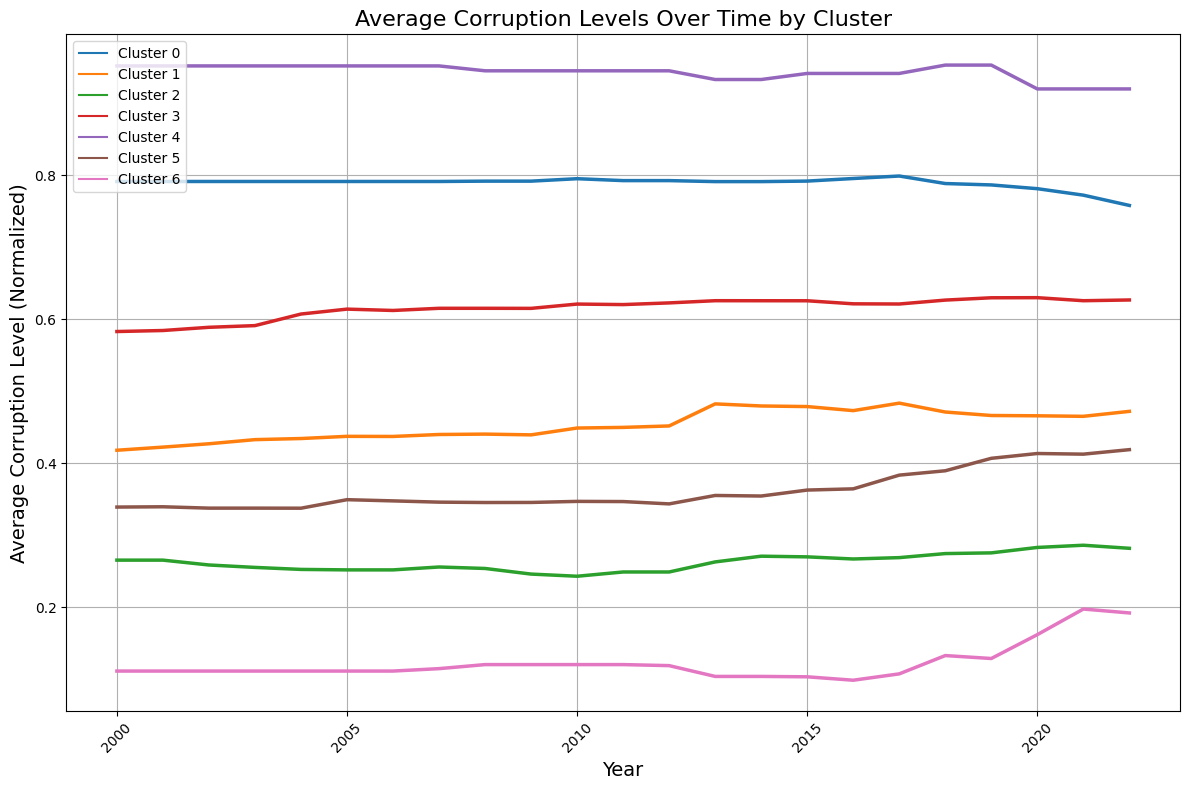

In [585]:
mean_corruption_by_cluster_ju = pivot_df_ju.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ju.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ju.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ju[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels_ju = [f'Cluster {i}' for i in mean_corruption_by_cluster_ju.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels_ju[i]) for i in range(len(legend_labels_ju))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [586]:
cluster_assignments_ju= pivot_df_ju.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ju = cluster_assignments_ju.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ju.rename(columns={'countries': 'countries_list'}, inplace=True)

In [587]:
for index, row in clustered_countries_ju.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Australia, Austria, Belgium, Botswana, Chile, Estonia, Finland, France, Germany, Ireland, Israel, Japan, Poland, Portugal, Singapore, Spain, Switzerland, United Arab Emirates, United Kingdom, United States of America, Uruguay
Cluster 1: Argentina, Bosnia and Herzegovina, Bulgaria, Guyana, India, Kenya, Lesotho, Malawi, Montenegro, Mozambique, Panama, Romania, Russia, Rwanda, Senegal, Thailand, The Gambia, Türkiye, Zambia, Zimbabwe
Cluster 2: Bolivia, Burundi, Cambodia, Chad, Equatorial Guinea, Ethiopia, Gabon, Ghana, Kazakhstan, Madagascar, Nicaragua, Nigeria, Republic of the Congo, Togo, Tunisia, Ukraine, Uzbekistan, Vietnam
Cluster 3: Barbados, Belarus, Brazil, Cape Verde, Colombia, Costa Rica, Croatia, Cyprus, Czechia, Eswatini, Georgia, Greece, Hungary, Italy, Jamaica, Kuwait, Latvia, Lithuania, Luxembourg, Malaysia, Malta, Mauritius, Namibia, Oman, Saudi Arabia, Seychelles, Slovakia, Slovenia, Solomon Islands, South Africa, South Korea, Sri Lanka, Suriname, Trinidad and

### Kmeans dtw

In [588]:
# Set a seed for reproducibility
seed = 82
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ju_2= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]




# Step 1: Extract the time series data and normalize it
time_series_ju_2 = cluster_data_ju_2.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ju_2 = cluster_data_ju_2.pivot(index='country', columns='year', values='v2lgcrrpt')


# Step 2:
time_series_ju_2 = pivot_df_ju_2.values

# Step 3: Compute DTW and Cluster
model_ju_2 = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
labels_ju_2 = model_ju_2.fit_predict(time_series_ju_2)

# Assign clusters back to the original DataFrame
pivot_df_ju_2['cluster'] = labels_ju_2

# Display or save your clustered data
print(pivot_df_ju_2['cluster'].reset_index())



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

0.085 --> 0.042 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.040 --> 0.040 --> 0.040 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


0.039 --> 0.039 --> 0.039 --> 

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.038 --> 0.038 --> 
        country  cluster
0       Albania        1
1       Algeria        4
2        Angola        4
3     Argentina        3
4       Armenia        1
..          ...      ...
128  Uzbekistan        4
129     Vanuatu        4
130     Vietnam        3
131      Zambia        0
132    Zimbabwe        5

[133 rows x 2 columns]


[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    0.0s


In [589]:
# Count the number of countries in each cluster
countries_per_cluster_ju_2 = pivot_df_ju_2['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ju_2)

cluster
0    20
1    30
2     8
3    26
4    26
5    10
6    13
Name: count, dtype: int64


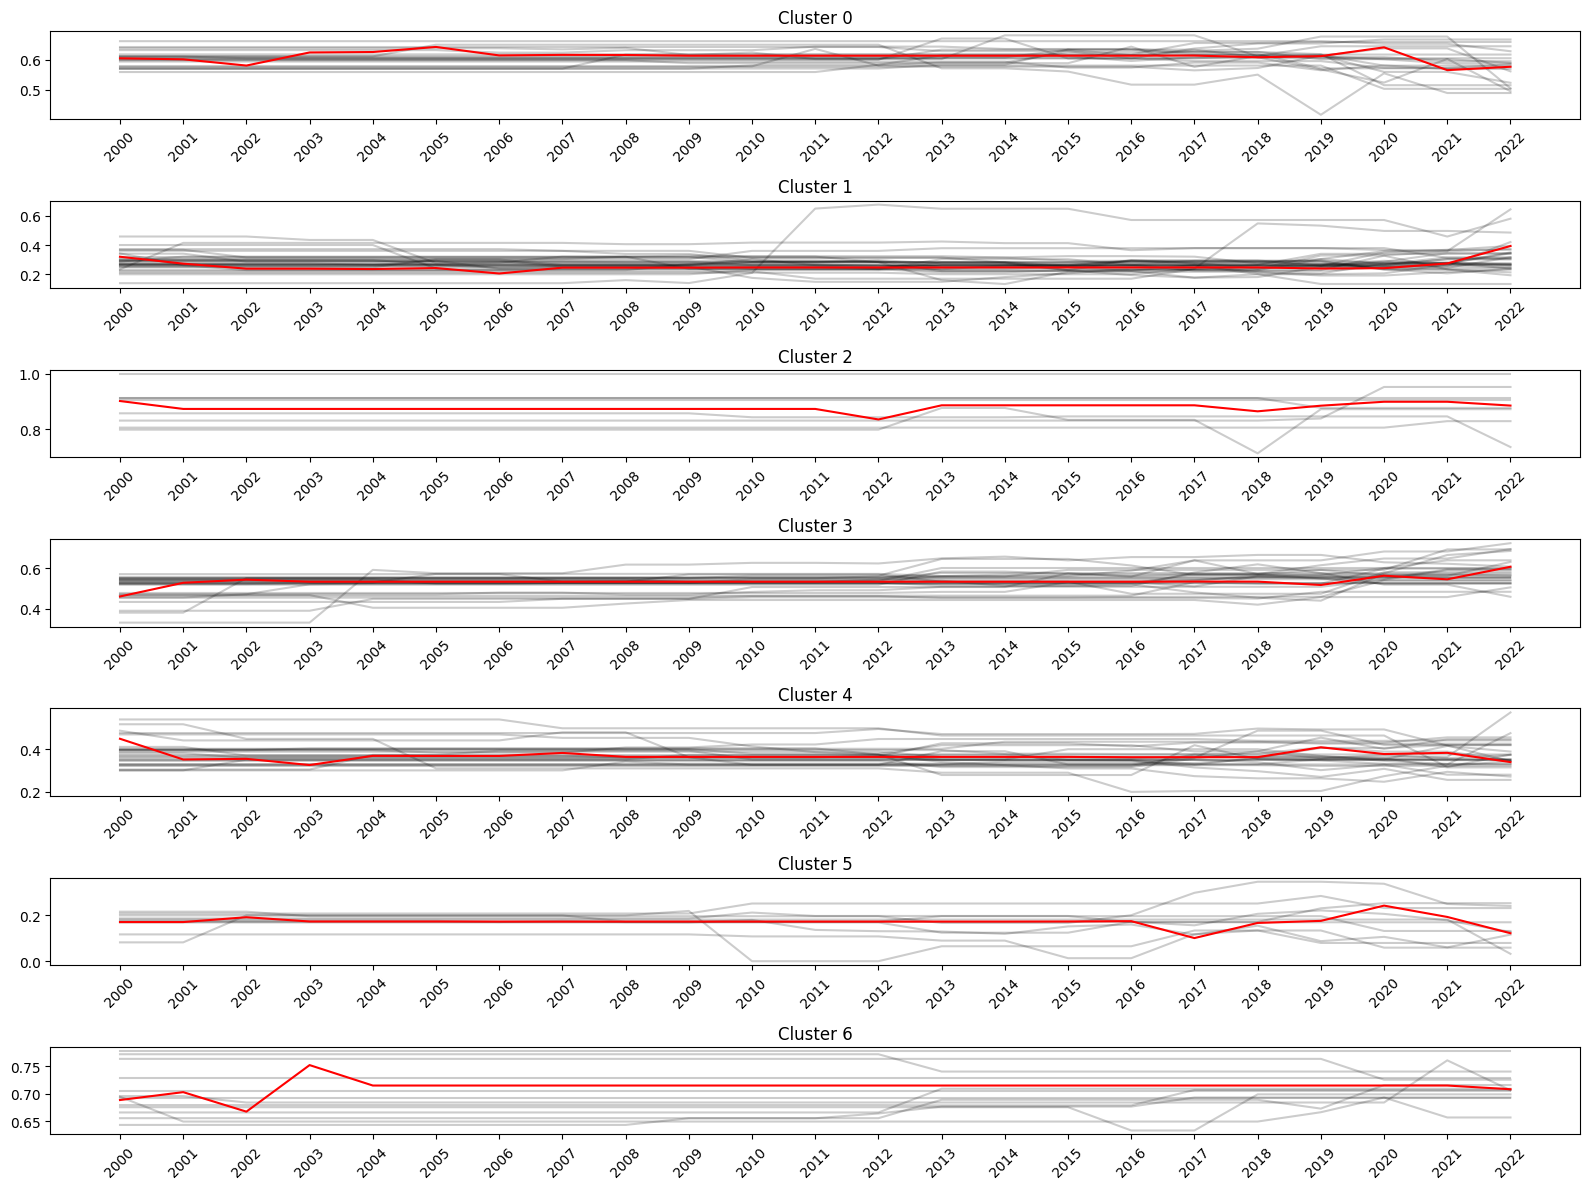

In [591]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ju_2[labels_ju_2 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ju_2.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi ))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)  # Set x-ticks here

plt.tight_layout()
plt.show()

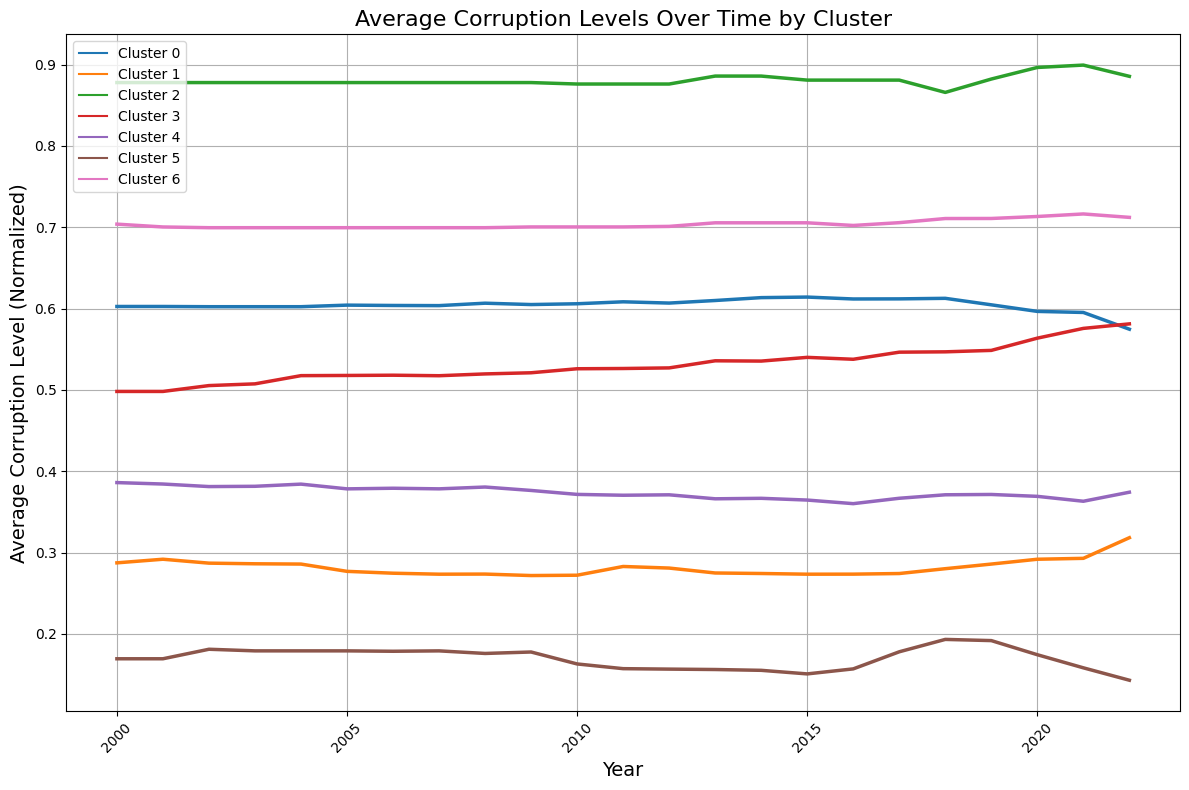

In [592]:
mean_corruption_by_cluster_ju_2 = pivot_df_ju_2.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ju_2.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ju_2.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ju_2[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ju_2.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [593]:
cluster_assignments_ju_2 = pivot_df_ju_2.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ju_2 = cluster_assignments_ju_2.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ju_2.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ju_2.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Austria, Botswana, Burkina Faso, Cape Verde, Chile, Cyprus, Greece, Hong Kong, Israel, Mozambique, Namibia, Poland, Portugal, Saudi Arabia, Senegal, Slovenia, Spain, Trinidad and Tobago, United States of America, Zambia
Cluster 1: Albania, Armenia, Brazil, Cameroon, Ecuador, El Salvador, Gabon, Honduras, India, Iran, Kazakhstan, Kenya, Laos, Maldives, Mexico, Moldova, Nicaragua, Paraguay, Peru, Republic of the Congo, Russia, Serbia, Solomon Islands, Sri Lanka, Tajikistan, Thailand, Tunisia, Türkiye, Uganda, Ukraine
Cluster 2: Denmark, Finland, Luxembourg, New Zealand, Norway, Singapore, Sweden, Uruguay
Cluster 3: Argentina, Belarus, Benin, China, Costa Rica, Croatia, Czechia, Ethiopia, Georgia, Ghana, Guyana, Italy, Jamaica, Japan, Latvia, Lithuania, Malta, Oman, Seychelles, Slovakia, South Africa, South Korea, Suriname, Tanzania, The Gambia, Vietnam
Cluster 4: Algeria, Angola, Bolivia, Bosnia and Herzegovina, Bulgaria, Burundi, Cambodia, Colombia, Equatorial Guinea, Eswatin

### Kmeans softdw

In [594]:
# Set a seed for reproducibility
seed = 82
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ju_3= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]


# Step 1: Extract the time series data and normalize it
time_series_ju_3= cluster_data_ju_3.drop(['country', 'ISO'], axis=1).values  

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ju_3 = cluster_data_ju_3.pivot(index='country', columns='year', values='v2jucorrdc')


# Step 2:
time_series_ju_3 = pivot_df_ju_3.values

# Step 3: Compute DTW and Cluster
model_ju_3 = TimeSeriesKMeans(n_clusters=n_clusters, metric='softdtw', verbose=True)
labels_ju_3= model_ju_3.fit_predict(time_series_ju_3)

# Assign clusters back to the original DataFrame
pivot_df_ju_3['cluster'] = labels_ju_3

# Display or save your clustered data
print(pivot_df_ju_3['cluster'].reset_index())



1332.649 --> 1335.011 --> 1335.840 --> 1336.201 --> 1336.442 --> 1336.508 --> 1336.508 --> 1336.508 --> 1336.508 --> 
        country  cluster
0       Albania        3
1       Algeria        3
2        Angola        3
3     Argentina        3
4       Armenia        4
..          ...      ...
128  Uzbekistan        4
129     Vanuatu        2
130     Vietnam        4
131      Zambia        2
132    Zimbabwe        3

[133 rows x 2 columns]


In [595]:
# Count the number of countries in each cluster
countries_per_cluster_ju_3 = pivot_df_ju_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ju_3)

cluster
0     3
1     8
2    22
3    35
4    28
5    17
6    20
Name: count, dtype: int64


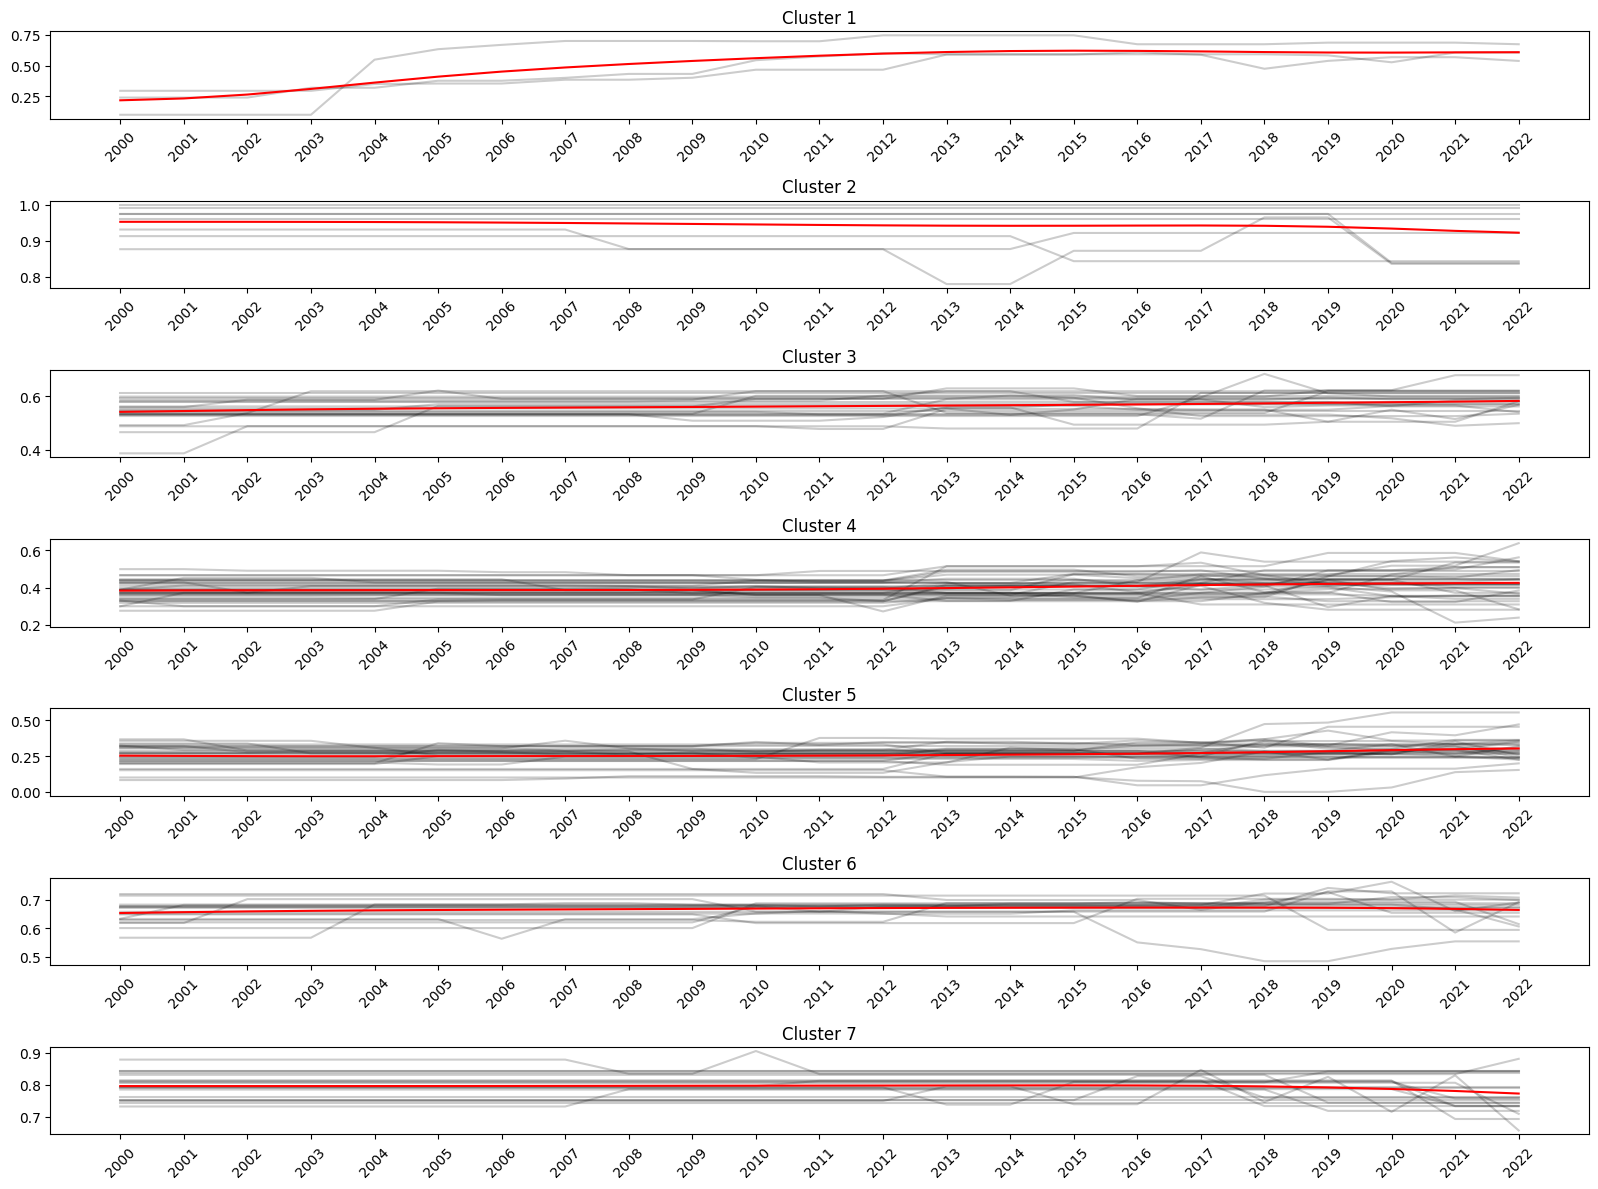

In [596]:
plt.figure(figsize=(16, 12))
years = [str(year) for year in range(2000, 2022 + 1)]  

for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    for xx in time_series_ju_3[labels_ju_3 == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(model_ju_3.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45) 

plt.tight_layout()
plt.show()

In [597]:
# Count the number of countries in each cluster
countries_per_cluster_ju_3 = pivot_df_ju_3['cluster'].value_counts().sort_index()

# Display the count
print(countries_per_cluster_ju_3)

cluster
0     3
1     8
2    22
3    35
4    28
5    17
6    20
Name: count, dtype: int64


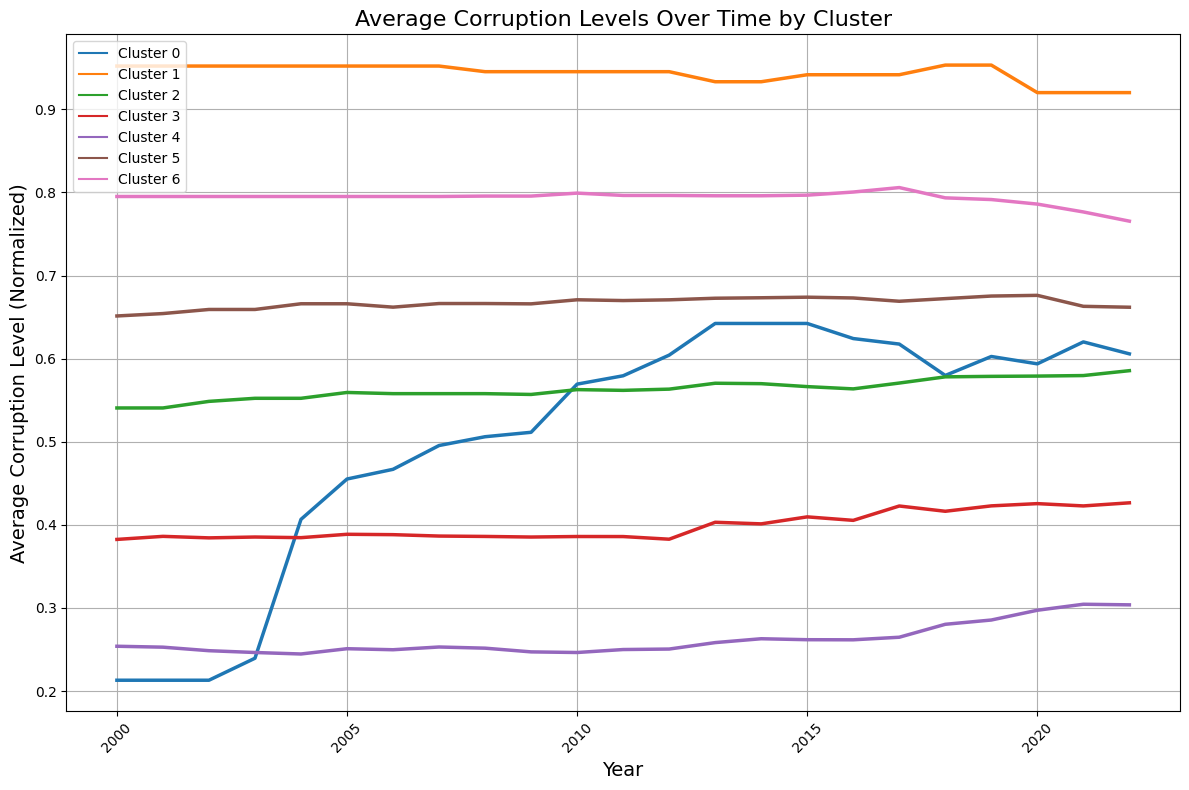

In [598]:
mean_corruption_by_cluster_ju_3 = pivot_df_ju_3.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ju_3.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ju_3.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ju_3[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Average Corruption Levels Over Time by Cluster', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Corruption Level (Normalized)', fontsize=14)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ju_3.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show ()

In [599]:
cluster_assignments_ju_3 = pivot_df_ju_3.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ju_3 = cluster_assignments_ju_3.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ju_3.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ju_3.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 0: Georgia, Kenya, Romania
Cluster 1: Canada, Denmark, Hong Kong, Iceland, Netherlands, New Zealand, Norway, Sweden
Cluster 2: Belarus, Brazil, Bulgaria, Cape Verde, Colombia, Croatia, Eswatini, Greece, India, Italy, Kuwait, Lithuania, Malaysia, Mauritius, Saudi Arabia, Seychelles, Slovakia, Solomon Islands, Sri Lanka, The Gambia, Vanuatu, Zambia
Cluster 3: Albania, Algeria, Angola, Argentina, Benin, Bosnia and Herzegovina, Burkina Faso, China, Dominican Republic, Ecuador, El Salvador, Guatemala, Guyana, Indonesia, Iran, Laos, Lesotho, Malawi, Mexico, Moldova, Mongolia, Montenegro, Morocco, Mozambique, North Macedonia, Panama, Peru, Russia, Rwanda, Senegal, Serbia, Tanzania, Thailand, Türkiye, Zimbabwe
Cluster 4: Armenia, Azerbaijan, Bolivia, Burundi, Cambodia, Cameroon, Chad, Equatorial Guinea, Ethiopia, Gabon, Ghana, Honduras, Kazakhstan, Kyrgyzstan, Madagascar, Maldives, Nicaragua, Nigeria, Paraguay, Philippines, Republic of the Congo, Tajikistan, Togo, Tunisia, Uganda, Ukra

### Kernel Kmeans

In [600]:
# Set a seed for reproducibility

seed = 82
np.random.seed(seed)

#number of clusters 
n_clusters=7

# Selecting columns by names
cluster_data_ju_4= data_4_subset[['country', 'ISO', 'year', 'v2x_freexp_altinf','v2cltrnslw', 'v2clacjust', 'v2clacjstm','v2clacjstw','v2peedueq','v2pehealth','v2x_execorr_2','v2jucorrdc','v2lgcrrpt']]


# Step 1: Extract the time series data and normalize it
time_series_ju_4 = cluster_data_ju_4.drop(['country', 'ISO'], axis=1).values  # Assuming 'country' and 'ISO' columns are present

# Pivot the DataFrame to get years as columns and countries as rows
pivot_df_ju_4 = cluster_data_ju_4.pivot(index='country', columns='year', values='v2jucorrdc')


# Step 2:
time_series_ju_4 = pivot_df_ju_4.values

# Step 3: Compute DTW and Cluster
model_ju_4 = KernelKMeans(n_clusters=n_clusters, kernel="gak") #max_iter=5, n_init=2)
labels_ju_4 = model_ju_4.fit_predict(time_series_ju_4)

# Assign clusters back to the original DataFrame
pivot_df_ju_4['cluster'] = labels_ju_4

# Display or save your clustered data
print(pivot_df_ju_4['cluster'].reset_index())



c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


        country  cluster
0       Albania        2
1       Algeria        2
2        Angola        2
3     Argentina        2
4       Armenia        5
..          ...      ...
128  Uzbekistan        5
129     Vanuatu        4
130     Vietnam        5
131      Zambia        4
132    Zimbabwe        2

[133 rows x 2 columns]


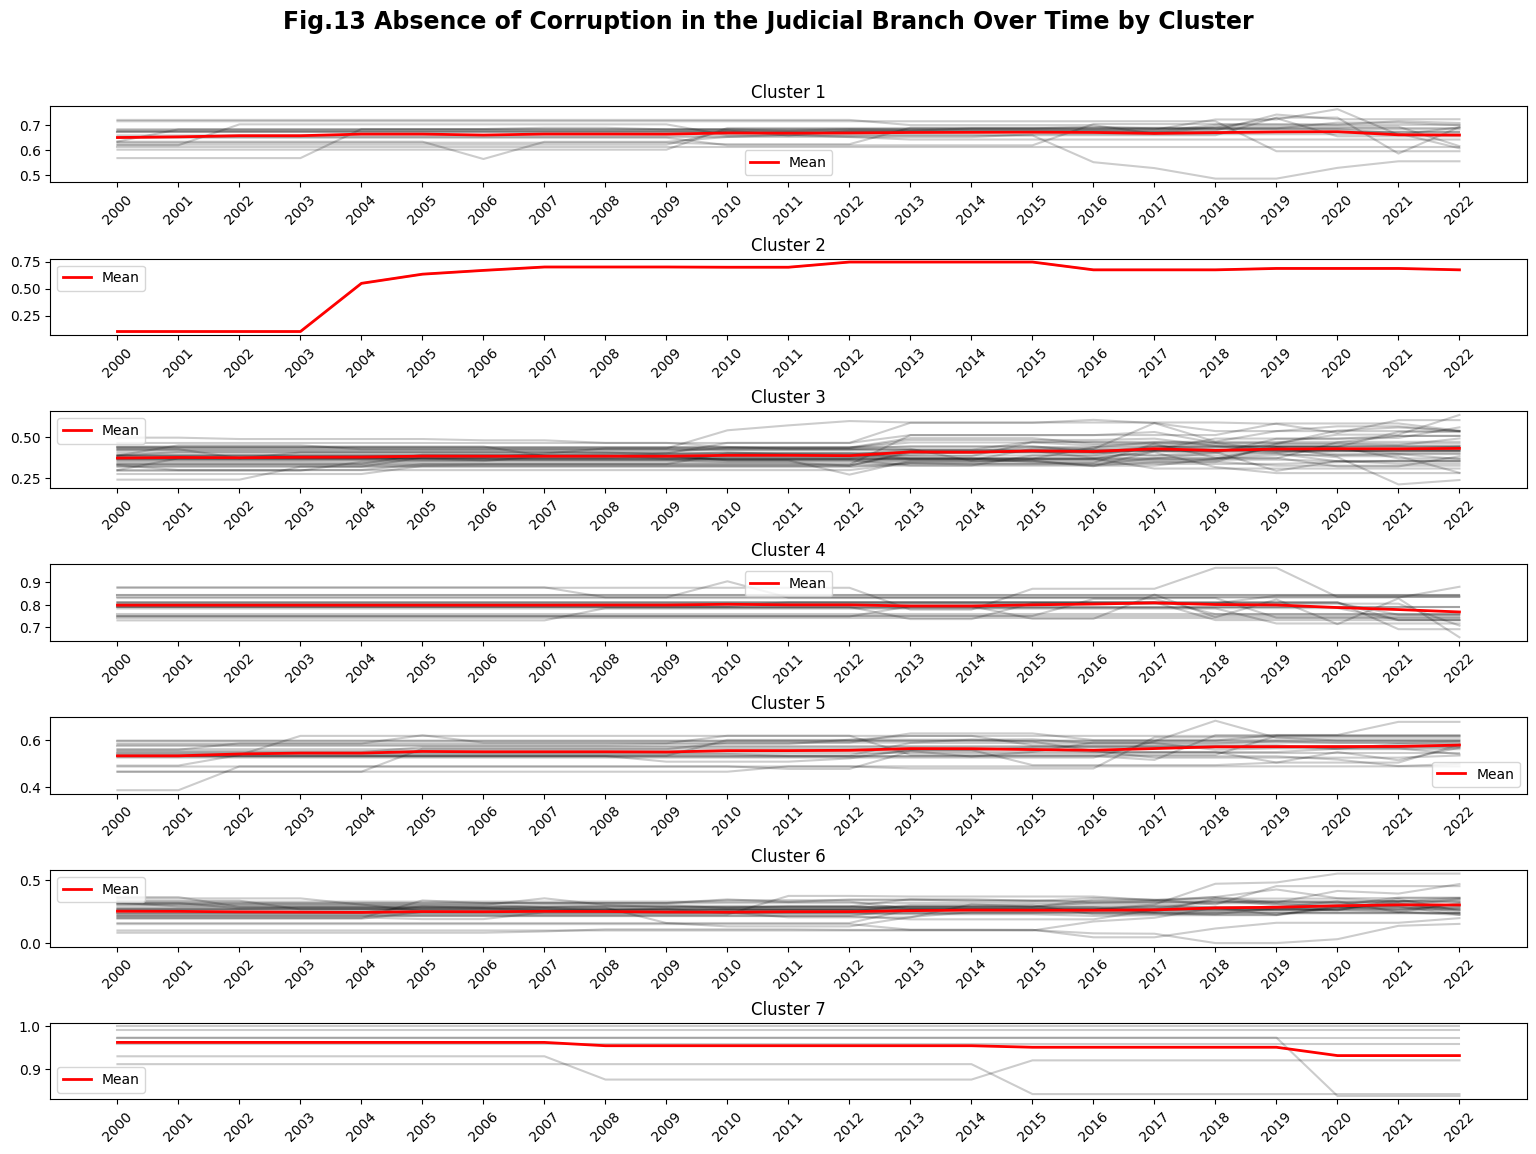

In [601]:

# Assuming years, time_series_3, and labels_3 are defined as in your initial example
years = [str(year) for year in range(2000, 2022 + 1)]
plt.figure(figsize=(16, 12))



for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, 1 + yi)
    # Filter the time series for the current cluster
    cluster_time_series = time_series_ju_4[labels_ju_4 == yi]
    
    # Plot each time series in the cluster
    for xx in cluster_time_series:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    
    # Calculate and plot the mean of the cluster
    mean_time_series = np.mean(cluster_time_series, axis=0)
    plt.plot(mean_time_series, "r-", linewidth=2, label='Mean')
    
    # Set title and adjust x-ticks to show years, add legend
    plt.title(f"Cluster {yi + 1}")
    plt.xticks(ticks=range(len(years)), labels=years, rotation=45)
    plt.legend() 

# Adjust the layout to prevent the subplots from squeezing too tight
plt.tight_layout(pad=3.0, h_pad=1.0)  # Added padding between subplots

# Increase the space for the main title
plt.subplots_adjust(top=0.9)  # Adjust the top padding
plt.suptitle('Fig.13 Absence of Corruption in the Judicial Branch Over Time by Cluster',  fontsize=17, fontweight='bold')
plt.savefig("figures/clusters_4.png")
plt.show()


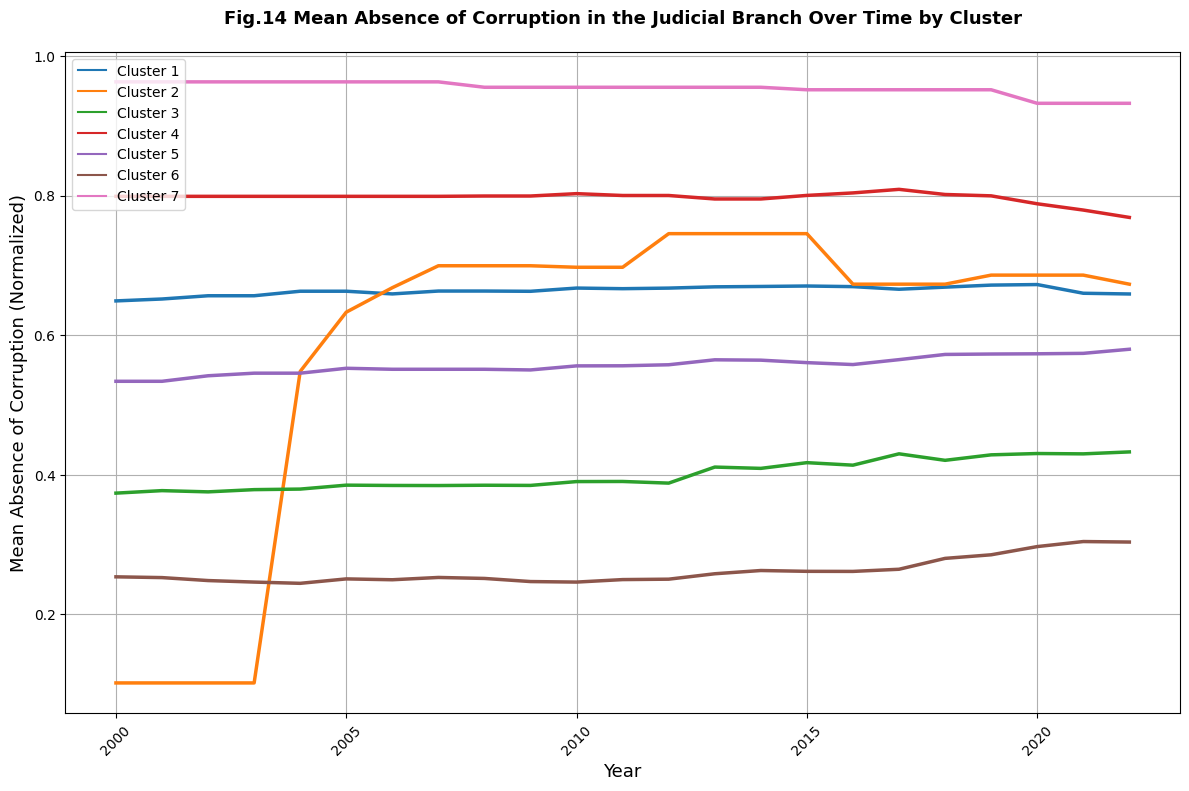

In [602]:
pivot_df_ju_4['cluster'] += 1 
mean_corruption_by_cluster_ju_4 = pivot_df_ju_4.groupby('cluster').mean().T
cluster_colors = sns.color_palette("tab10", n_colors=len(mean_corruption_by_cluster_ju_4.columns))

plt.figure(figsize=(12, 8))
# Plot the average corruption levels for each cluster over time
for i, col in enumerate(mean_corruption_by_cluster_ju_4.columns):
    sns.lineplot(data=mean_corruption_by_cluster_ju_4[col], color=cluster_colors[i], linewidth=2.5)

plt.title('Fig.14 Mean Absence of Corruption in the Judicial Branch Over Time by Cluster', fontsize=13, fontweight='bold', y=1.03)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Mean Absence of Corruption (Normalized)', fontsize=13)

# Add legend with matching colors
legend_labels = [f'Cluster {i}' for i in mean_corruption_by_cluster_ju_4.columns]

plt.legend(handles=[plt.Line2D([], [], color=cluster_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))], loc='upper left')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/clusters_average_4.png")
plt.show()

In [603]:
cluster_assignments_ju_4 = pivot_df_ju_4.groupby('country')['cluster'].apply(lambda x: ', '.join(map(str, x))).reset_index()
clustered_countries_ju_4 = cluster_assignments_ju_4.groupby('cluster')['country'].apply(list).reset_index()

# Optionally, you might want to rename the 'countries' column to something like 'countries_list'
clustered_countries_ju_4.rename(columns={'countries': 'countries_list'}, inplace=True)

for index, row in clustered_countries_ju_4.iterrows():
    print(f"Cluster {row['cluster']}: {', '.join(row['country'])}")

Cluster 1: Barbados, Cape Verde, Costa Rica, Cyprus, Czechia, Hungary, Jamaica, Latvia, Luxembourg, Malta, Namibia, Oman, Portugal, Slovenia, South Africa, South Korea, Suriname, Trinidad and Tobago
Cluster 2: Georgia
Cluster 3: Albania, Algeria, Angola, Argentina, Benin, Bosnia and Herzegovina, Burkina Faso, China, Dominican Republic, Ecuador, El Salvador, Guatemala, Guyana, Indonesia, Iran, Kenya, Laos, Lesotho, Malawi, Mexico, Moldova, Mongolia, Morocco, Mozambique, North Macedonia, Panama, Peru, Romania, Russia, Rwanda, Senegal, Serbia, Tanzania, Thailand, Türkiye, Zimbabwe
Cluster 4: Australia, Austria, Belgium, Botswana, Chile, Estonia, Finland, France, Germany, Ireland, Israel, Japan, Netherlands, Poland, Singapore, Spain, Switzerland, United Arab Emirates, United Kingdom, United States of America, Uruguay
Cluster 5: Belarus, Brazil, Bulgaria, Colombia, Croatia, Eswatini, Greece, India, Italy, Kuwait, Lithuania, Malaysia, Mauritius, Montenegro, Saudi Arabia, Seychelles, Slovakia

### Evaluation metrics

In [604]:
import numpy as np
from tslearn.clustering import TimeSeriesKMeans, KernelKMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# Set a seed for reproducibility
#82, 
#1234
seed = 82
#np.random.seed(seed)

# Define the range of clusters
cluster_range = range(6, 10)

# Define clustering algorithms with a placeholder for n_clusters
def get_clustering_algorithms(n_clusters):
    return {
        "Kmeans euclidean": TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", random_state=seed),
        "Kmeans dtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=seed),
        "Kmeans softdtw": TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", random_state=seed),
        "KernalKmeans gak": KernelKMeans(n_clusters=n_clusters, kernel="gak", random_state=seed),
    }



# Prepare to collect results
results = []

# Evaluate each algorithm across the cluster range and metrics
for n_clusters in cluster_range:
    algorithms = get_clustering_algorithms(n_clusters)
    for algo_name, algorithm in algorithms.items():
        y_pred = algorithm.fit_predict(time_series_ju_4)
        silhouette = silhouette_score(time_series_ju_4, y_pred)
        davis = davies_bouldin_score(time_series_ju_4, y_pred)
        
        results.append({
            "Algorithm": algo_name,
            "Clusters": n_clusters,
            "Silhouette": silhouette,
            "Davies-Bouldin": davis
        })

# Convert results to a DataFrame for better visualization

results_df = pd.DataFrame(results)
print(results_df)


c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(
c:\Users\FernandaOrtega\AppData\Local\Programs\Python\Python312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 133 1-dimensional timeseries
  warnings.warn(


           Algorithm  Clusters  Silhouette  Davies-Bouldin
0   Kmeans euclidean         6    0.372260        0.831614
1         Kmeans dtw         6    0.340172        0.766334
2     Kmeans softdtw         6    0.427214        0.779549
3   KernalKmeans gak         6    0.413041        0.714883
4   Kmeans euclidean         7    0.374673        0.803799
5         Kmeans dtw         7    0.372457        0.724870
6     Kmeans softdtw         7    0.455830        0.721843
7   KernalKmeans gak         7    0.449791        0.598796
8   Kmeans euclidean         8    0.387611        0.848474
9         Kmeans dtw         8    0.362612        0.940231
10    Kmeans softdtw         8    0.370614        0.905065
11  KernalKmeans gak         8    0.368882        0.828662
12  Kmeans euclidean         9    0.364839        0.871198
13        Kmeans dtw         9    0.353356        0.887477
14    Kmeans softdtw         9    0.343769        0.957672
15  KernalKmeans gak         9    0.219088        0.8035

## Sociopolitical and economic variables correlations with respect to Judicial Corruption

In [605]:
# Ensure 'country' in model_data is set as the index if not already
model_data_ju = data_4_subset.set_index('country')
model_data_ju['cluster'] = pivot_df_ju_4['cluster']

# Reset index to make 'country' a column again if needed later
model_data_ju.reset_index(inplace=True)

In [606]:
model_data_ju

country  ISO  year  v2x_freexp_altinf  v2cltrnslw  v2clacjust  \
0       Angola  AGO  2000           0.251806    0.242203    0.229872   
1       Angola  AGO  2001           0.254902    0.242203    0.229872   
2       Angola  AGO  2002           0.312693    0.242203    0.229872   
3       Angola  AGO  2003           0.406605    0.294434    0.000000   
4       Angola  AGO  2004           0.399381    0.294434    0.000000   
...        ...  ...   ...                ...         ...         ...   
3054  Zimbabwe  ZWE  2018           0.461300    0.243098    0.585792   
3055  Zimbabwe  ZWE  2019           0.431373    0.243098    0.569399   
3056  Zimbabwe  ZWE  2020           0.448916    0.259961    0.665027   
3057  Zimbabwe  ZWE  2021           0.461300    0.244441    0.606740   
3058  Zimbabwe  ZWE  2022           0.430341    0.244441    0.606740   

      v2clacjstm  v2clacjstw  v2cldiscm  v2cldiscw  ...  v2cacamps  v2caviol  \
0        0.31632    0.273060   0.254983   0.312174  ...   0.693798  0.867793   
1        0.31632    0.273060   0.254983   0.356946  ...   0.693798  0.867793   
2        0.50224    0.452764   0.246615   0.413370  ...   0.693798  0.665185   
3        0.34912    0.404493   0.321010   0.434683  ...   0.460336  0.453535   
4        0.34912    0.404493   0.321010   0.434683  ...   0.460336  0.453535   
...          ...         ...        ...        ...  ...        ...       ...   
3054     0.55504    0.558706   0.316750   0.335173  ...   0.835788  0.791908   
3055     0.55504    0.558706   0.308687   0.329807  ...   0.880233  0.717208   
3056     0.55328    0.556795   0.286475   0.317847  ...   0.880233  0.600415   
3057     0.52640    0.536403   0.295755   0.329193  ...   0.826357  0.622499   
3058     0.52640    0.536403   0.273543   0.305274  ...   0.751034  0.567956   

      v2csreprss  gdp_growth  v2x_corr_2  v2x_execorr_2  v2cacamps_2  \
0       0.498998    0.373496    0.164071       0.096608     0.306202   
1       0.498998    0.385454    0.164071       0.096608     0.306202   
2       0.398150    0.483697    0.131880       0.096608     0.306202   
3       0.398150    0.372825    0.104881       0.042138     0.539664   
4       0.398150    0.455493    0.104881       0.042138     0.539664   
...          ...         ...         ...            ...          ...   
3054    0.387201    0.393802    0.211838       0.210689     0.164212   
3055    0.326754    0.276007    0.211838       0.197328     0.119767   
3056    0.326754    0.260590    0.178609       0.213772     0.119767   
3057    0.303315    0.429717    0.144341       0.252826     0.173643   
3058    0.303315    0.409510    0.163032       0.219938     0.248966   

      v2caviol_2  gdp_percapita  cluster  
0       0.132207    3285.953416        3  
1       0.132207    3388.148688        3  
2       0.334815    3782.892225        3  
3       0.546465    3839.572827        3  
4       0.546465    4223.637787        3  
...          ...            ...      ...  
3054    0.208092    2457.309859        3  
3055    0.282792    2296.845429        3  
3056    0.399585    2101.804597        3  
3057    0.377501    2333.973632        3  
3058    0.432044    2607.927678        3  

[3059 rows x 36 columns]

In [607]:
# Calculate the mean of socioeconomic variables by cluster
cluster_profiles_ju= model_data_ju.groupby('cluster')[['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']].mean()

print(cluster_profiles_ju)


         v2x_freexp_altinf  v2cltrnslw  v2clacjstm  v2clacjstw  v2pehealth  \
cluster                                                                      
1                 0.862306    0.653092    0.720011    0.704474    0.694415   
2                 0.790595    0.526210    0.483694    0.492218    0.639322   
3                 0.662297    0.477771    0.482612    0.481322    0.414437   
4                 0.881637    0.798261    0.782254    0.755335    0.761849   
5                 0.680027    0.524331    0.574146    0.551993    0.572197   
6                 0.541720    0.370810    0.388818    0.402244    0.326891   
7                 0.941869    0.830393    0.857967    0.818532    0.853820   

         gdp_percapita  
cluster                 
1         26493.662848  
2          9545.487980  
3          9268.854518  
4         41545.496744  
5         18794.671807  
6          6734.870235  
7         45961.328347  


### Mean trajectories

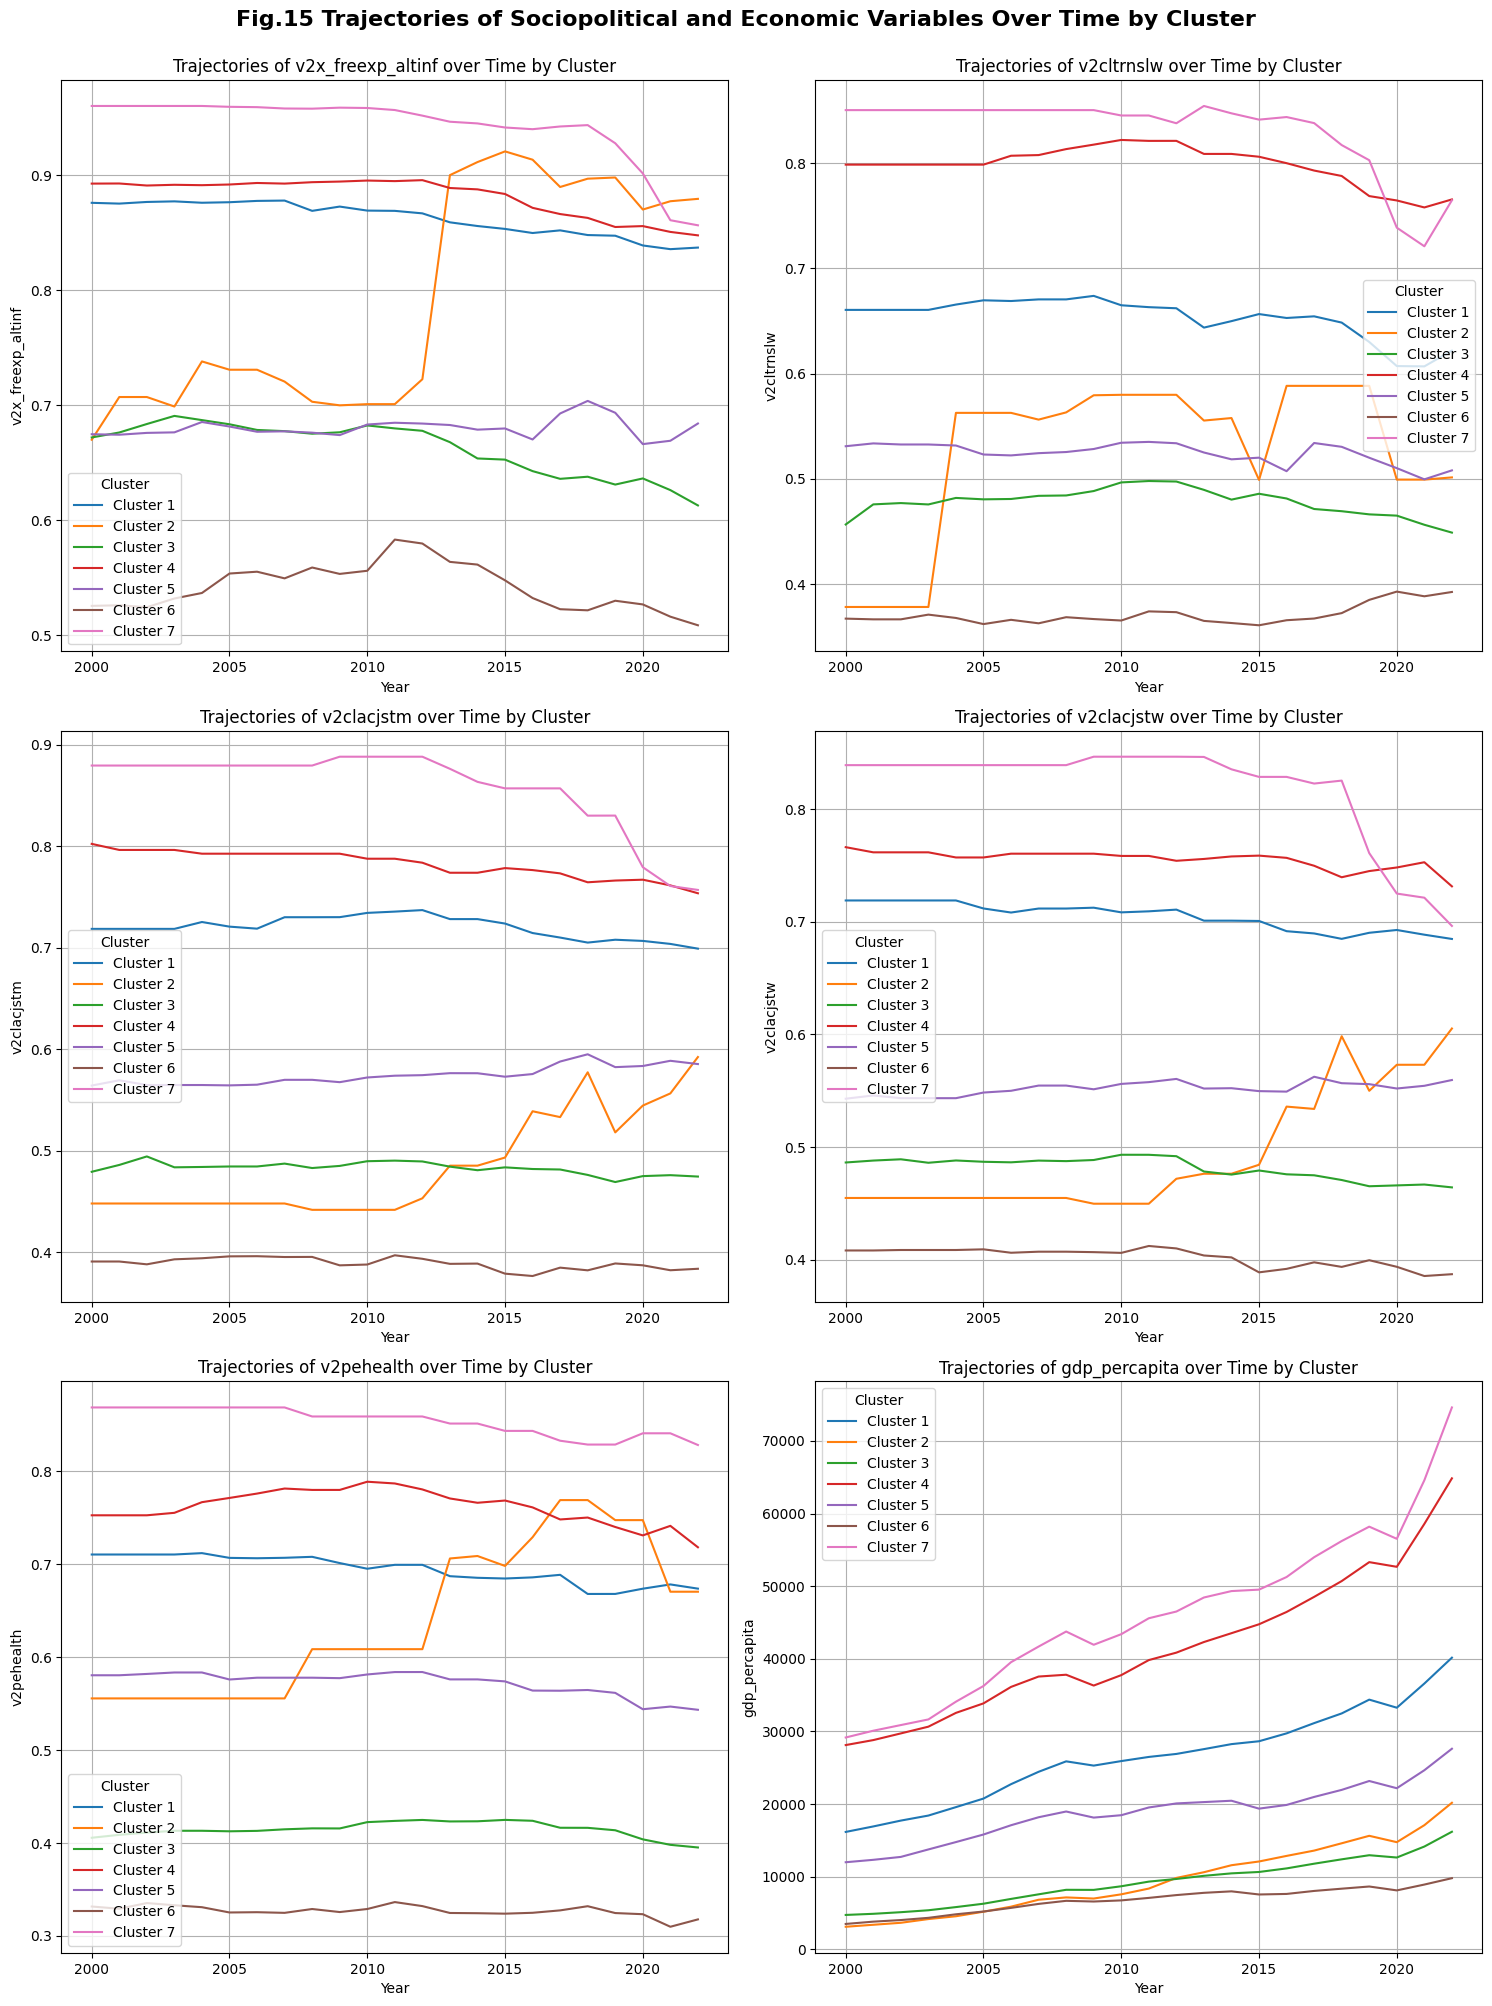

In [610]:


 # List of socioeconomic variables you want to analyze
socioeconomic_vars = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth','gdp_percapita']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for idx, var in enumerate(socioeconomic_vars):
    # Pivot the data for each variable to create a time series indexed by country and cluster
    pivot_df = model_data_ju.pivot_table(index=['cluster', 'country'], columns='year', values=var)

    # Calculate the mean trajectory per cluster
    mean_trajectories = pivot_df.groupby(level=0).mean()

    # Plotting on the respective subplot
    ax = axes[idx]
    for cluster_id in mean_trajectories.index:
        ax.plot(mean_trajectories.columns, mean_trajectories.loc[cluster_id], label=f'Cluster {cluster_id}')
    
    ax.set_title(f'Trajectories of {var} over Time by Cluster')
    ax.set_xlabel('Year')
    ax.set_ylabel(var)
    ax.legend(title='Cluster')
    ax.grid(True)

# Adjust layout to prevent overlap

plt.suptitle('Fig.15 Trajectories of Sociopolitical and Economic Variables Over Time by Cluster', fontsize=16, y=1,fontweight='bold')
#plt.tight_layout()
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/socio_eco_4.png")
plt.show()


### Correlations

In [612]:
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']


# Initialize a dictionary to hold the correlation coefficients for each cluster
correlation_by_cluster = {}

# Get unique clusters
clusters = model_data_ju['cluster'].unique()

# Calculate the correlation for each cluster
for cluster in clusters:
    cluster_data = model_data_ju[model_data_ju['cluster'] == cluster]
    correlation_by_cluster[cluster] = {}
    for var in variables:
        correlation_by_cluster[cluster][var] = cluster_data['v2jucorrdc'].corr(cluster_data[var])

correlation_by_cluster

{3: {'v2x_freexp_altinf': 0.1615217208115844,
  'v2cltrnslw': 0.1039440801439584,
  'v2clacjstm': 0.14799016832684994,
  'v2clacjstw': 0.16331381922479404,
  'v2pehealth': 0.09872579763455311,
  'gdp_percapita': 0.1270374588524213},
 4: {'v2x_freexp_altinf': 0.08586935298683535,
  'v2cltrnslw': 0.38964144362573755,
  'v2clacjstm': 0.33114641019848967,
  'v2clacjstw': 0.3035631349137052,
  'v2pehealth': 0.3989228988093486,
  'gdp_percapita': 0.07332217289925724},
 6: {'v2x_freexp_altinf': 0.3058859087840949,
  'v2cltrnslw': 0.37048572925427903,
  'v2clacjstm': 0.3400495395058679,
  'v2clacjstw': 0.3008070562420514,
  'v2pehealth': 0.14906759975472872,
  'gdp_percapita': 0.06702490172603771},
 5: {'v2x_freexp_altinf': 0.14053434479236707,
  'v2cltrnslw': 0.15550502687278964,
  'v2clacjstm': 0.1765289073729935,
  'v2clacjstw': 0.17877141219424006,
  'v2pehealth': 0.1453887269730398,
  'gdp_percapita': 0.2009398609922203},
 1: {'v2x_freexp_altinf': -0.10286560471362066,
  'v2cltrnslw': 0.0

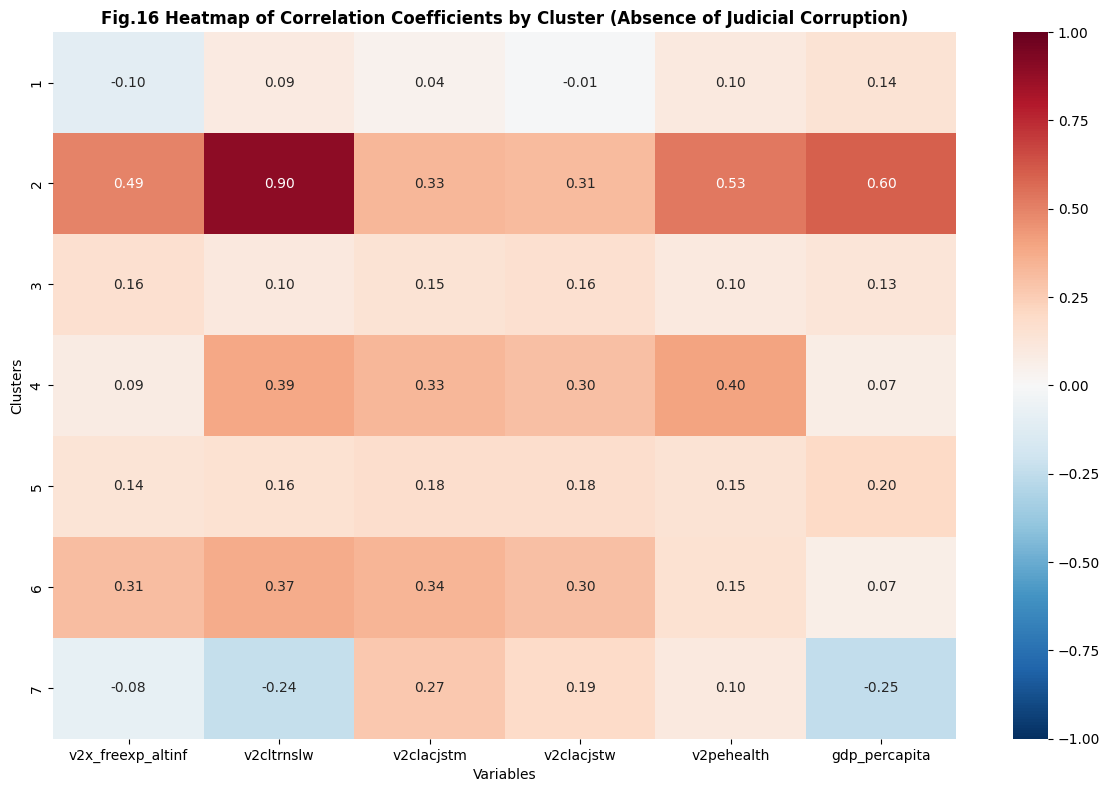

In [613]:
# Convert the dictionary to a DataFrame for easier plotting
cluster_labels = list(correlation_by_cluster.keys())
variables = ['v2x_freexp_altinf', 'v2cltrnslw', 'v2clacjstm', 'v2clacjstw', 'v2pehealth', 'gdp_percapita']

# Create an empty DataFrame
correlation_matrix = pd.DataFrame(index=cluster_labels, columns=variables)

# Fill the DataFrame with correlation values
for cluster in correlation_by_cluster:
    for var in variables:
        correlation_matrix.loc[cluster, var] = correlation_by_cluster[cluster][var]

# Convert all entries to numeric type (if necessary)
correlation_matrix = correlation_matrix.apply(pd.to_numeric)

# Sort the index (clusters) numerically if they are labeled by numbers
correlation_matrix.sort_index(inplace=True, key=lambda x: x.astype(int))

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Fig.16 Heatmap of Correlation Coefficients by Cluster (Absence of Judicial Corruption)', fontsize=12, fontweight='bold')
plt.xlabel('Variables')
plt.ylabel('Clusters')
plt.tight_layout(pad=1.0, h_pad=1.0) 
plt.savefig("figures/coefficients_4.png")
plt.show()